# Understanding the Factors Influencing Mental Healthcare Utilization among Adults with Mental Health Problems

This research aims to explore and understand the factors influencing mental healthcare utilization among adults with mental health problems, using the National Survey of Drug Use and Health (NSDUH) dataset. By applying logistic regression analysis, we seek to gain insights into the determinants of healthcare utilization among individuals with mental health issues.

## Dataset: National Survey of Drug Use and Health (NSDUH)

The National Survey of Drug Use and Health (NSDUH) is a comprehensive dataset that provides a wealth of information on the use of tobacco, alcohol, and drugs; substance use disorders; receipt of substance use treatment; mental health issues; and the use of mental health services among the civilian, noninstitutionalized population aged 12 or older in the United States. It encompasses a broad range of demographic, health-related, and behavioral factors collected through interviews, physical examinations, and laboratory tests.

For this research, we specifically focus on adults with mental health problems, as indicated by self-reported diagnoses or symptoms related to mental health conditions. By leveraging the NSDUH dataset, we can gain valuable insights into the factors influencing the utilization of mental healthcare services among this population.

## Methodology
## Logistic Regression Analysis

To understand the factors influencing mental healthcare utilization, we employ logistic regression analysis. Logistic regression is a statistical modeling technique that allows us to examine the relationship between a binary dependent variable (in this case, healthcare utilization) and a set of independent variables (such as demographic, socioeconomic, and health-related factors). By analyzing the coefficients and significance of these independent variables, we can identify which factors have a significant impact on mental healthcare utilization among adults with mental health problems.

## Significance and Expected Outcomes

By conducting this research, we aim to contribute to the understanding of the factors influencing mental healthcare utilization among adults with mental health problems. The findings from this study can potentially inform policymakers, healthcare providers, and mental health professionals in developing targeted interventions and improving healthcare delivery for this vulnerable population. Additionally, the methodology employed in this research can serve as a foundation for future studies exploring similar topics in mental health research.

Through the logistic regression analysis, we anticipate gaining valuable insights into the factors that influence mental healthcare utilization among adults with mental health problems. These insights can help identify barriers, disparities, and potential areas for intervention, ultimately leading to improved mental health outcomes and better allocation of healthcare resources.


In [7]:
# Importing the necessary library
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('NSDUH_2019_Tab.txt', delimiter='\t')
data

C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\2218916817.py:6: DtypeWarning: Columns (2575) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('NSDUH_2019_Tab.txt', delimiter='\t')


QUESTID2    FILEDATE  CIGEVER  CIGOFRSM  CIGWILYR  CIGTRY  CIGYFU   
0      43295143  10/09/2020        1        99        99      13    9999  \
1      65095143  10/09/2020        2        99        99     991    9991   
2      49405143  10/09/2020        1        99        99      22    9999   
3      51015143  10/09/2020        2        99        99     991    9991   
4      31825143  10/09/2020        2        99        99     991    9991   
...         ...         ...      ...       ...       ...     ...     ...   
56131  29424730  10/09/2020        1        99        99      17    9999   
56132  71744730  10/09/2020        2        99        99     991    9991   
56133  38044730  10/09/2020        2         4         4     991    9991   
56134  43164730  10/09/2020        2         3         4     991    9991   
56135  92074730  10/09/2020        2         4         4     991    9991   

       CIGMFU  CIGREC  CIG30USE  ...  POVERTY3  TOOLONG  TROUBUND  PDEN10   
0          99       4        93  ...       3.0        2         2       2  \
1          91      91        91  ...       3.0        2         2       2   
2          99       4        93  ...       3.0        2         2       2   
3          91      91        91  ...       1.0        2         2       2   
4          91      91        91  ...       3.0        2         2       2   
...       ...     ...       ...  ...       ...      ...       ...     ...   
56131      99       4        93  ...       3.0        2         2       3   
56132      91      91        91  ...       3.0        2         2       2   
56133      91      91        91  ...       3.0        2         2       1   
56134      91      91        91  ...       2.0        2         2       1   
56135      91      91        91  ...       2.0        2         2       1   

       COUTYP4  MAIIN102  AIIND102     ANALWT_C  VESTR  VEREP  
0            2         2         2  6613.865847  40004      2  
1            2         2         2  6321.580570  40003      1  
2            2         2         2  5045.607492  40008      1  
3            2         2         2  2419.558820  40031      1  
4            2         2         2   575.225454  40010      2  
...        ...       ...       ...          ...    ...    ...  
56131        3         2         2  2292.155935  40043      2  
56132        2         2         2   564.527589  40023      1  
56133        1         2         2  2717.640610  40009      1  
56134        1         2         2  1853.439383  40046      1  
56135        1         2         2   842.165187  40028      1  

[56136 rows x 2741 columns]

In [8]:
# Filter the dataset to include only rows where 'WSPDSC2' > 1
# 'WSPDSC2' is a specific column in the dataset related to serious mental illness degree.
filtered_data = data[data['WSPDSC2'] >= 1]
filtered_data

QUESTID2    FILEDATE  CIGEVER  CIGOFRSM  CIGWILYR  CIGTRY  CIGYFU   
0      43295143  10/09/2020        1        99        99      13    9999  \
4      31825143  10/09/2020        2        99        99     991    9991   
5      87035143  10/09/2020        1        99        99      21    9999   
9      75996143  10/09/2020        2        99        99     991    9991   
13     79876143  10/09/2020        1        99        99       9    9999   
...         ...         ...      ...       ...       ...     ...     ...   
56118  63313730  10/09/2020        1        99        99      21    9999   
56119  49713730  10/09/2020        2        99        99     991    9991   
56127  21894730  10/09/2020        1        99        99      18    2018   
56129  61414730  10/09/2020        1        99        99      18    9999   
56132  71744730  10/09/2020        2        99        99     991    9991   

       CIGMFU  CIGREC  CIG30USE  ...  POVERTY3  TOOLONG  TROUBUND  PDEN10   
0          99       4        93  ...       3.0        2         2       2  \
4          91      91        91  ...       3.0        2         2       2   
5          99       1        30  ...       2.0        2         2       1   
9          91      91        91  ...       2.0        1         2       1   
13         99       1        30  ...       1.0        2         2       2   
...       ...     ...       ...  ...       ...      ...       ...     ...   
56118      99       4        93  ...       3.0        2         1       1   
56119      91      91        91  ...       3.0        2         2       2   
56127      94       3        93  ...       2.0        2         2       1   
56129      99       3        93  ...       3.0        2         2       2   
56132      91      91        91  ...       3.0        2         2       2   

       COUTYP4  MAIIN102  AIIND102      ANALWT_C  VESTR  VEREP  
0            2         2         2   6613.865847  40004      2  
4            2         2         2    575.225454  40010      2  
5            1         2         2   6422.094204  40028      1  
9            1         2         2   6364.070710  40020      1  
13           3         2         2   5456.383858  40039      1  
...        ...       ...       ...           ...    ...    ...  
56118        1         2         2  10801.757050  40030      2  
56119        2         2         2   1606.926017  40034      2  
56127        1         2         2   3157.862765  40007      1  
56129        2         2         2   4430.429622  40021      2  
56132        2         2         2    564.527589  40023      1  

[14326 rows x 2741 columns]

# Data Preparation
In this step, we are preparing our data for analysis. We are selecting specific columns from our dataset that we are interested in. The columns are grouped into different categories such as demographics, insurance, income, health, social environment, mental health, and mental service utilization.

## Demographics
These are the basic demographic variables such as age, health status, sexual attraction, sexual identity, English speaking ability, hearing difficulty, vision difficulty, cognitive difficulty, walking difficulty, dressing difficulty, errand running difficulty, marital status, highest education level, sex and age, race, population density, county type, marital status, and job status.

## Insurance
These variables represent different aspects of health insurance.

## Income
These variables represent different aspects of income and work status.

## Health
These variables represent different aspects of physical health.

## Social Environment
These variables represent different aspects of the social environment.

## Mental Health
These variables represent different aspects of mental health.

## Mental Service Utilization
These variables represent different aspects of mental service utilization.

After selecting the columns, we create two new DataFrames: `features` and `targets`. The `features` DataFrame contains the independent variables (X) which are the predictors, and the `targets` DataFrame contains the dependent variables (Y) which are the target variables we want to predict.

In [9]:
# Define the feature groups
demograph = ['AGE2', 'HEALTH', 'IRSEX', 'SEXIDENT', 'IRMARIT', 
             'EDUHIGHCAT', 'NEWRACE2', 'PDEN10', 
             'WRKSTATWK2'] # Demographic features

insurance = ['ANYHLTI2'] # Insurance features

income = ['INCOME'] # Income features

health = ['HRTCONDEV', 'DIABETEVR', 'COPDEVER', 'CIRROSEVR', 'HEPBCEVER',
           'KIDNYDSEV', 'ASTHMAEVR', 'HIVAIDSEV', 'CANCEREVR','HIGHBPEVR', 'TXEVRRCVD2'] # Health features

soc_env = ['SNRLDCSN'] # Social Environment features

ment_health = ['WSPDSC2', 'ATXMDEYR'] # Mental Health features

ment_util = ['AMHINP2', 'AMHTXND2', 'AMHOUTP3', 'AMHTXRC3', 'AMHRX2'] # Mental Service Utilization features

# Combine all features
all_features = health + demograph + insurance + income + ment_health + soc_env + ment_util
# Select the relevant features from the filtered data
selected_data = filtered_data[all_features]

# Define the features (X) and target (Y)
# The features are the predictors, and the target is what we want to predict.
features = selected_data[health + demograph + insurance + income + ment_health + soc_env]
targets = selected_data[ment_util]

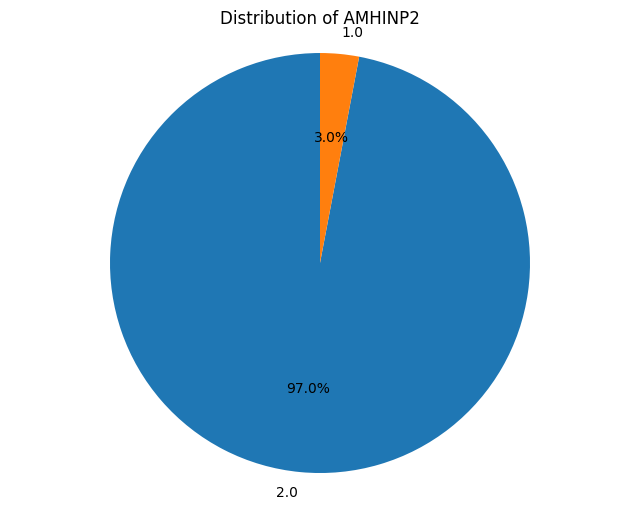

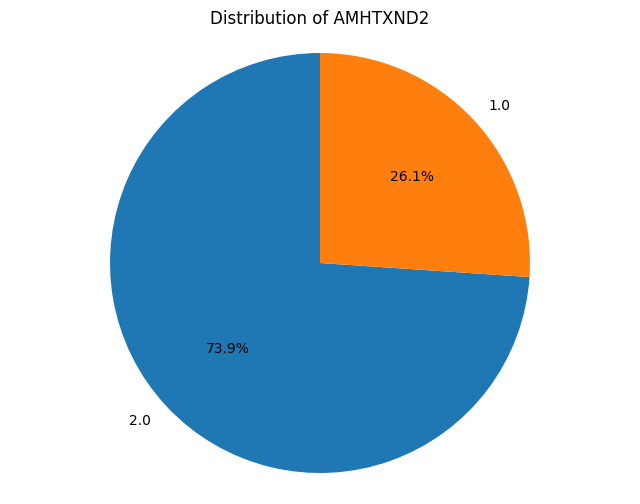

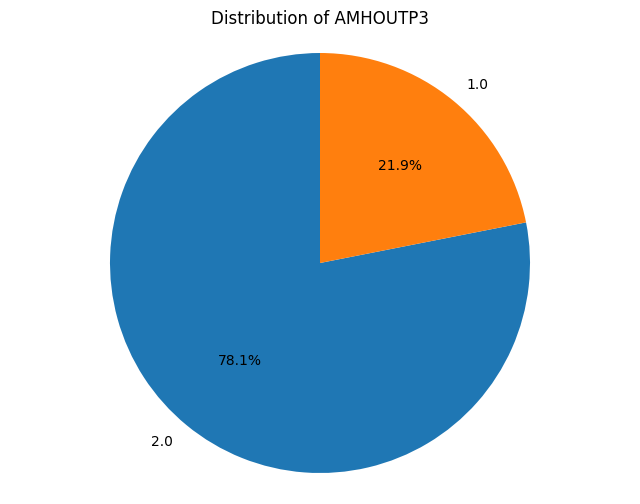

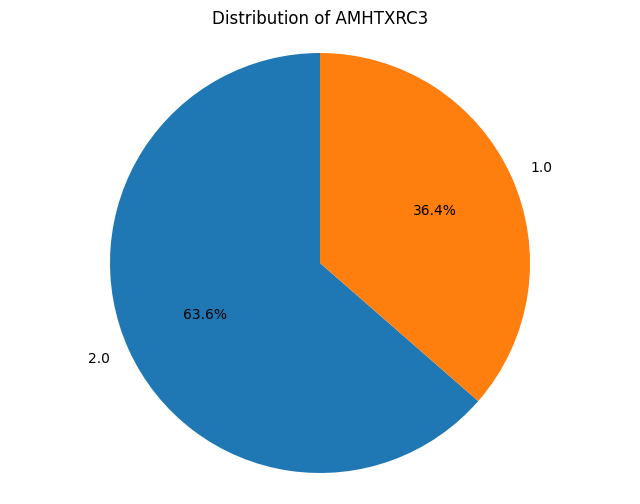

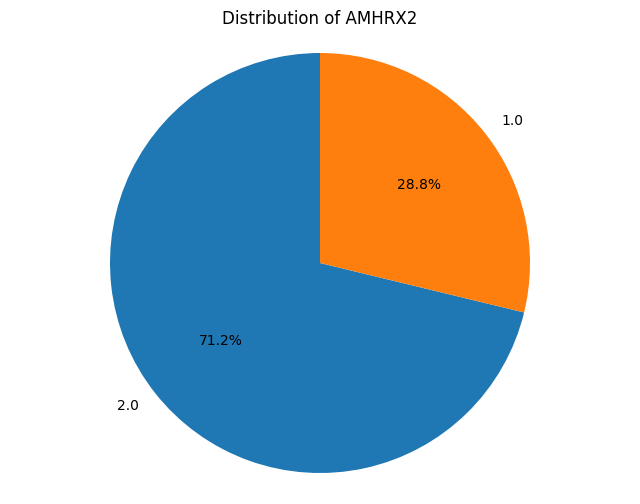

In [10]:
import matplotlib.pyplot as plt

# Function to plot pie chart for a given column
def plot_pie(column):
    counts = targets[column].value_counts()
    labels = counts.index.tolist()
    sizes = counts.values.tolist()
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Distribution of {column}')
    plt.show()

# Iterate over each column in the dataframe
for column in targets.columns:
    plot_pie(column)


# EDA (Exploratory Data Analysis)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Inspect the data
print(selected_data.head())

    HRTCONDEV  DIABETEVR  COPDEVER  CIRROSEVR  HEPBCEVER  KIDNYDSEV   
0           2          2         2          2          2          2  \
4          99         99        99         99         99         99   
5          99         99        99         99         99         99   
9          97         97        97         97         97         97   
13         99         99        99         99         99         99   

    ASTHMAEVR  HIVAIDSEV  CANCEREVR  HIGHBPEVR  ...  ANYHLTI2  INCOME   
0           2          2          2          1  ...         1       4  \
4          99         99         99         99  ...         1       4   
5          99         99         99         99  ...         2       1   
9          97         97         97         97  ...         1       2   
13         99         99         99         99  ...         1       1   

    WSPDSC2  ATXMDEYR  SNRLDCSN  AMHINP2  AMHTXND2  AMHOUTP3  AMHTXRC3  AMHRX2  
0       6.0       1.0         2      2.0       1.0   

In [12]:
# Summary statistics
print(selected_data.describe())

          HRTCONDEV     DIABETEVR      COPDEVER     CIRROSEVR     HEPBCEVER   
count  14326.000000  14326.000000  14326.000000  14326.000000  14326.000000  \
mean      66.398227     66.396831     66.425101     66.460212     66.451138   
std       45.861684     45.861879     45.823628     45.773837     45.786713   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%       99.000000     99.000000     99.000000     99.000000     99.000000   
75%       99.000000     99.000000     99.000000     99.000000     99.000000   
max       99.000000     99.000000     99.000000     99.000000     99.000000   

          KIDNYDSEV     ASTHMAEVR     HIVAIDSEV     CANCEREVR     HIGHBPEVR   
count  14326.000000  14326.000000  14326.000000  14326.000000  14326.000000  \
mean      66.448066     66.309786     66.460212     66.435781     66.355856   
std       45.791070     45.986588     45.773837    

In [13]:
# Check for missing values
print(selected_data.isnull().sum())

HRTCONDEV        0
DIABETEVR        0
COPDEVER         0
CIRROSEVR        0
HEPBCEVER        0
KIDNYDSEV        0
ASTHMAEVR        0
HIVAIDSEV        0
CANCEREVR        0
HIGHBPEVR        0
TXEVRRCVD2       0
AGE2             0
HEALTH           0
IRSEX            0
SEXIDENT         0
IRMARIT          0
EDUHIGHCAT       0
NEWRACE2         0
PDEN10           0
WRKSTATWK2       0
ANYHLTI2         0
INCOME           0
WSPDSC2          0
ATXMDEYR      8237
SNRLDCSN         0
AMHINP2         25
AMHTXND2        55
AMHOUTP3        76
AMHTXRC3        54
AMHRX2          34
dtype: int64


C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\1031803487.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


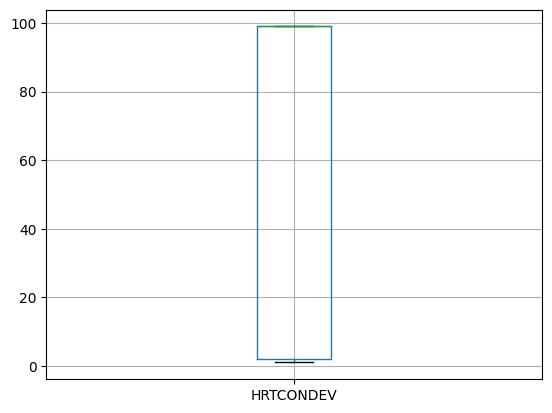

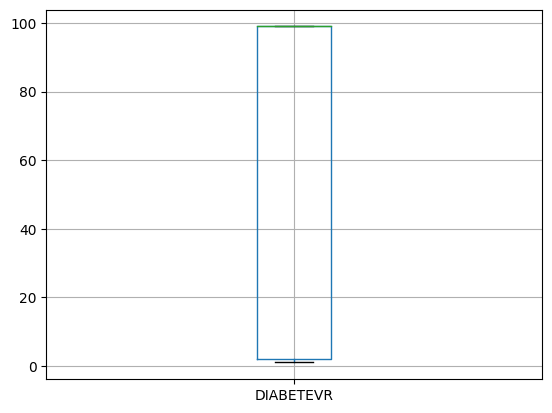

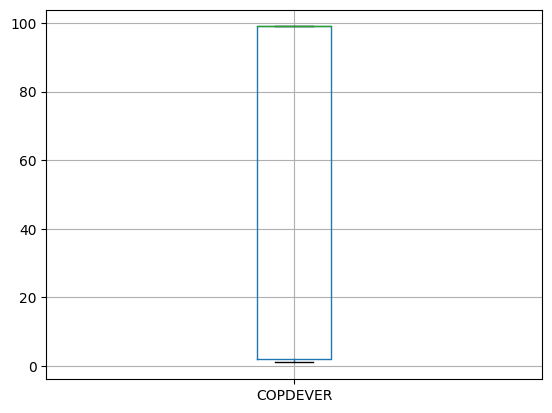

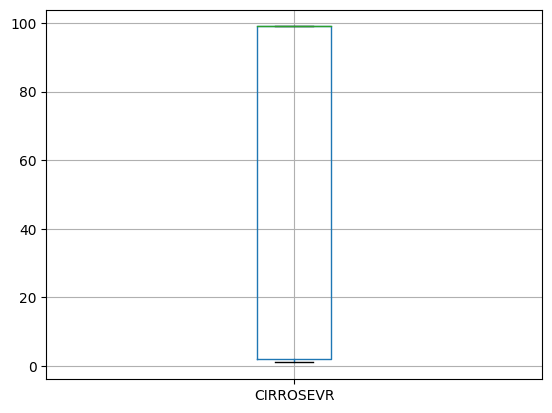

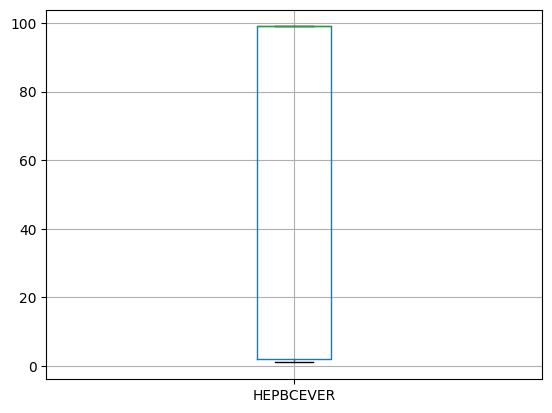

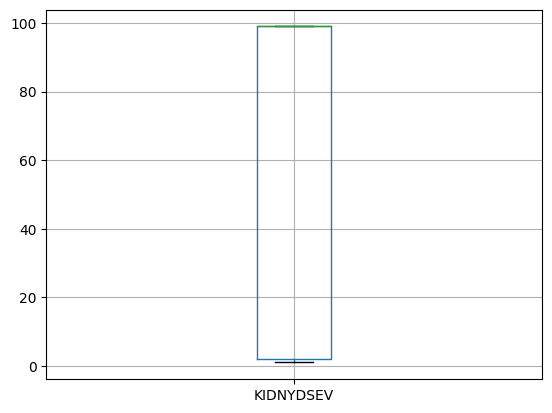

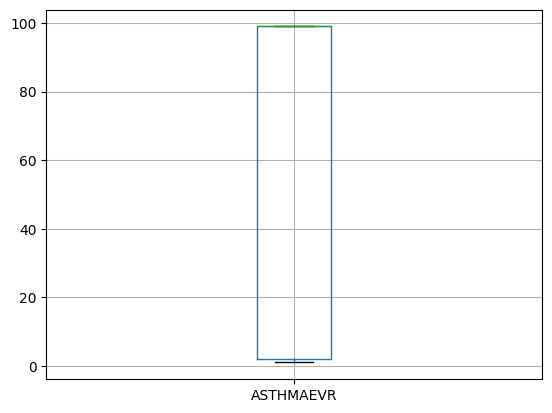

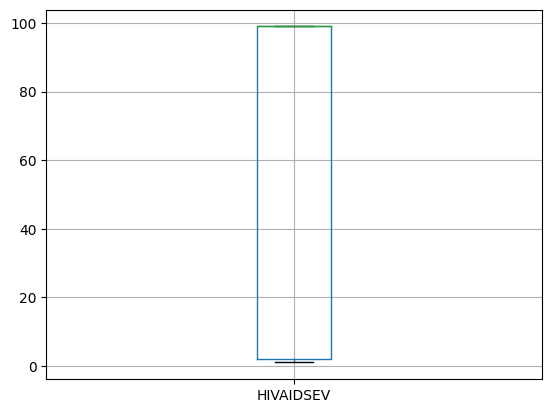

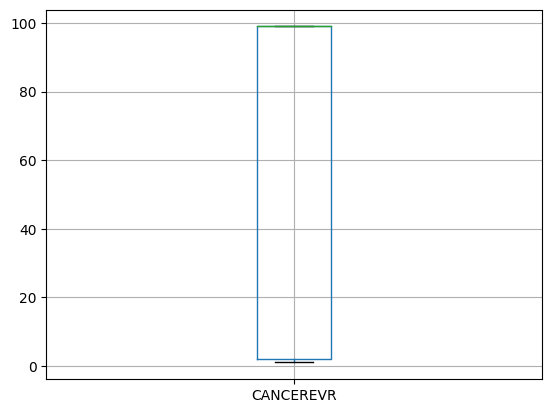

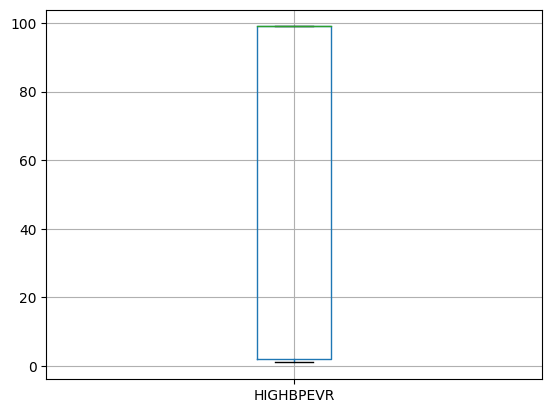

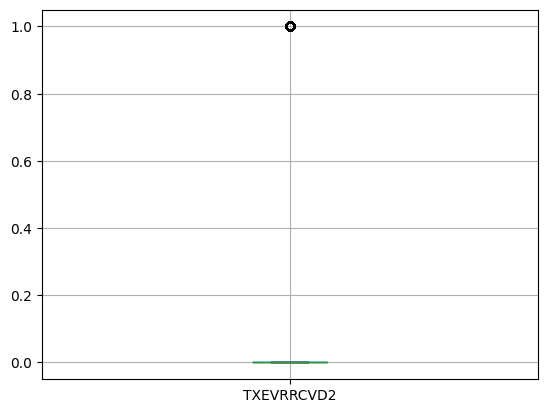

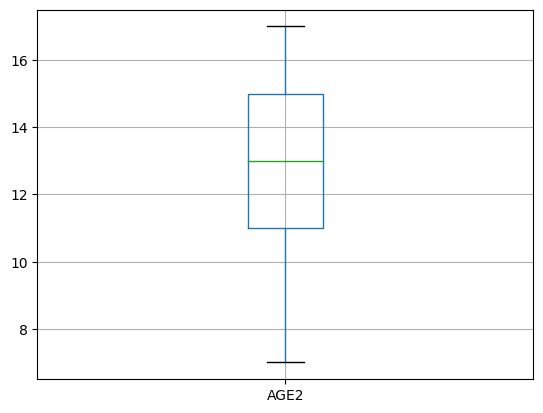

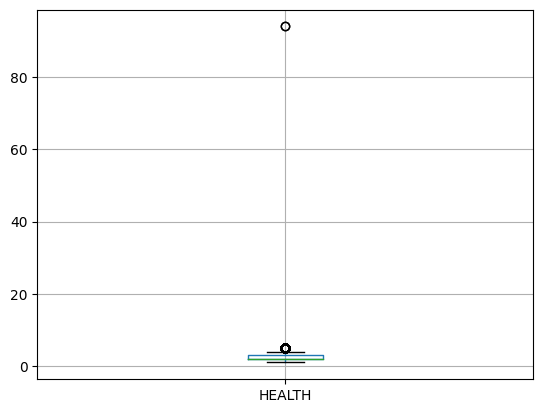

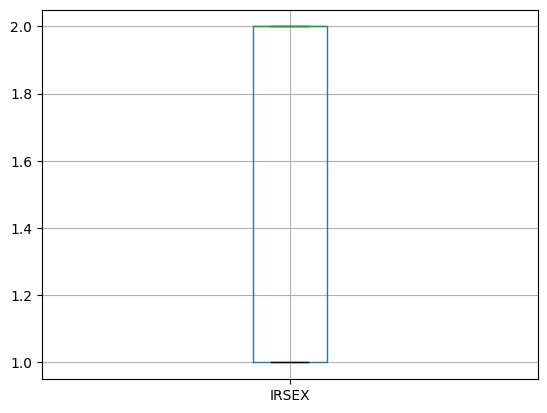

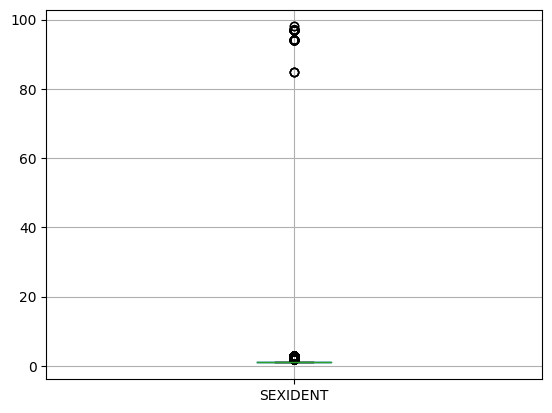

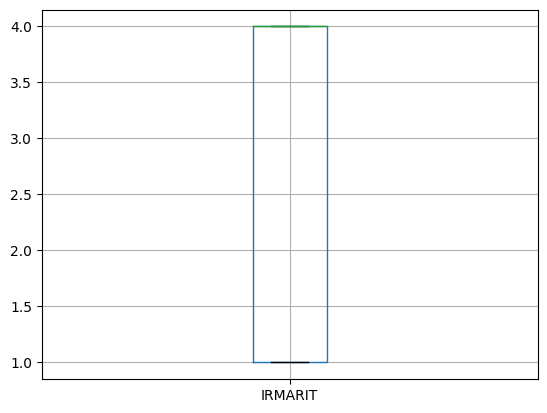

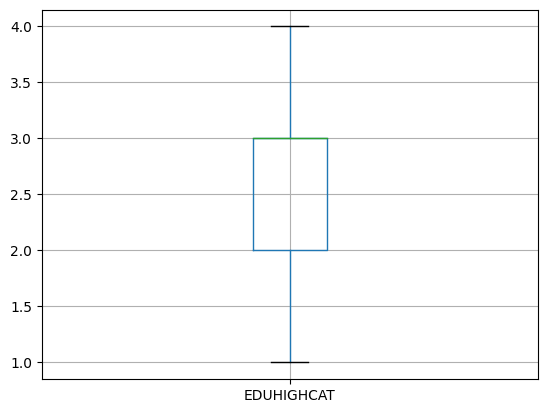

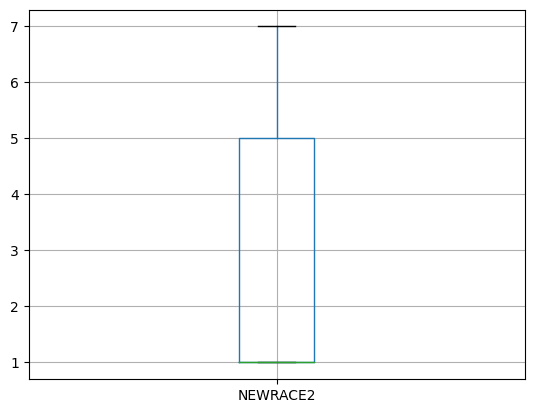

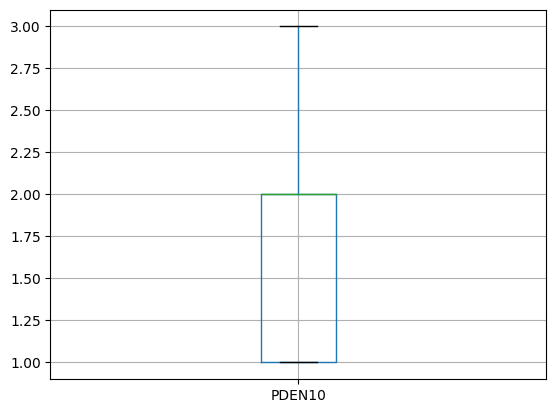

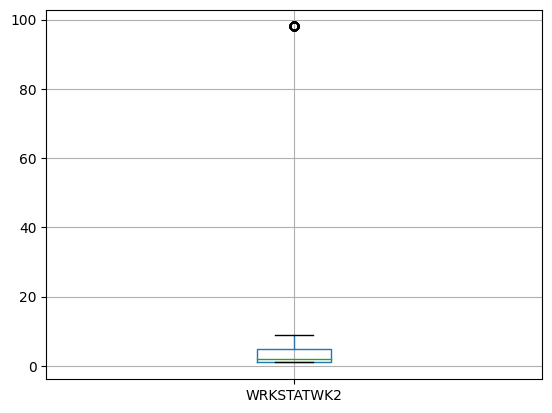

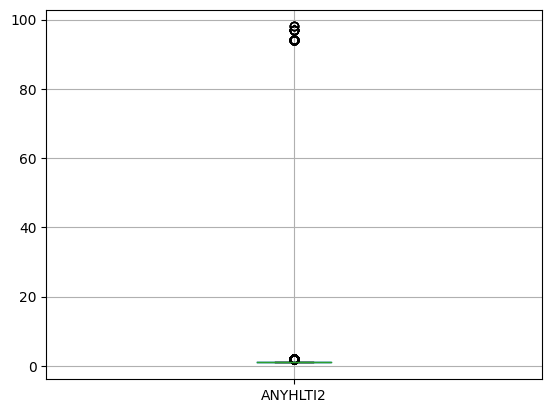

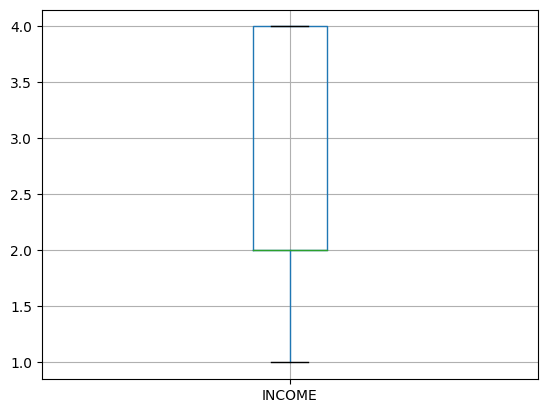

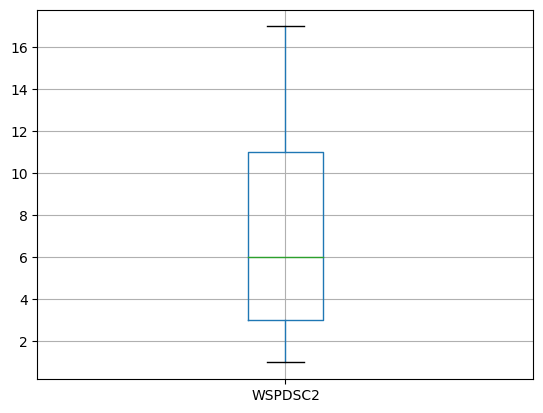

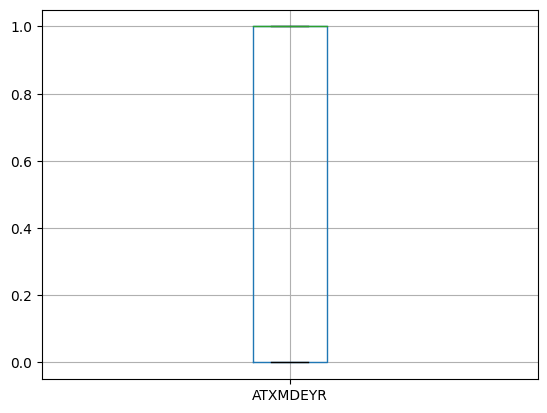

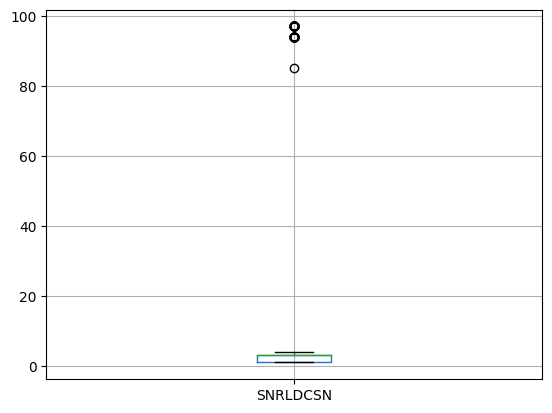

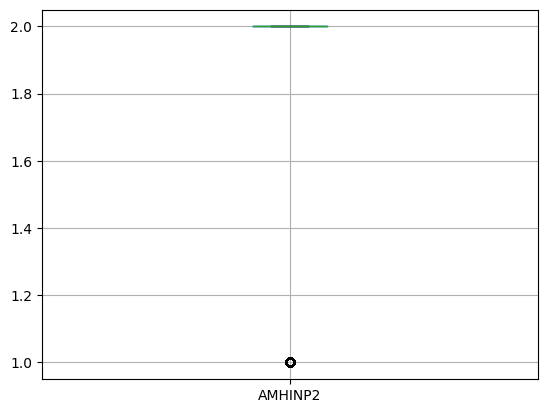

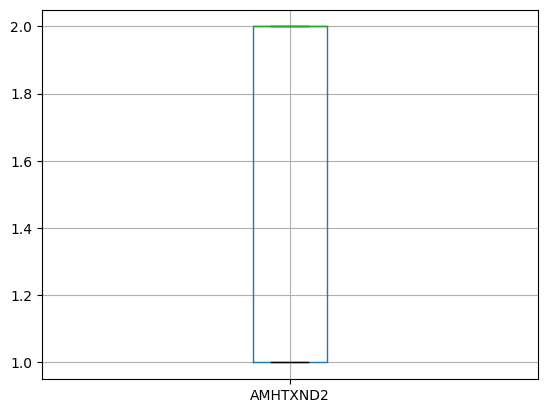

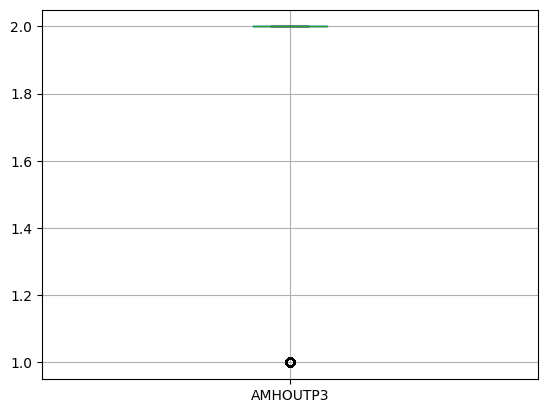

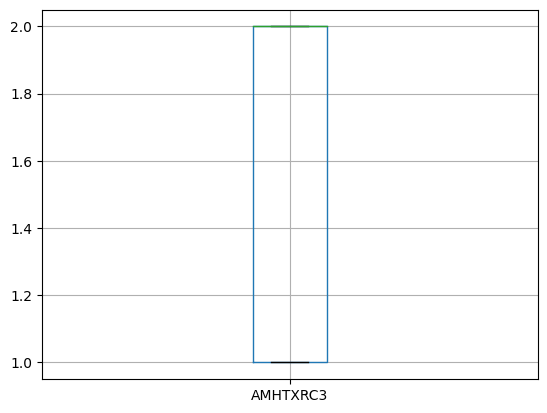

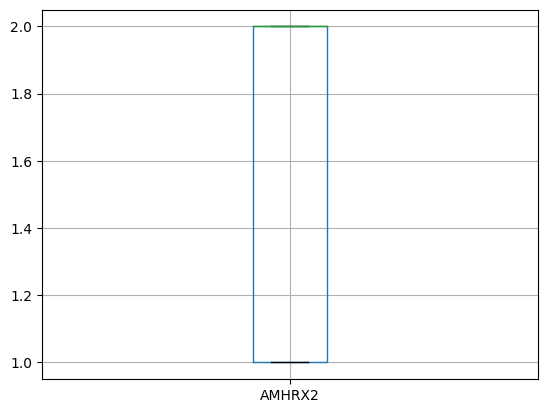

In [14]:
# Check for outliers using boxplots
for column in selected_data.select_dtypes(include=[np.number]).columns:
    plt.figure()
    selected_data.boxplot([column])

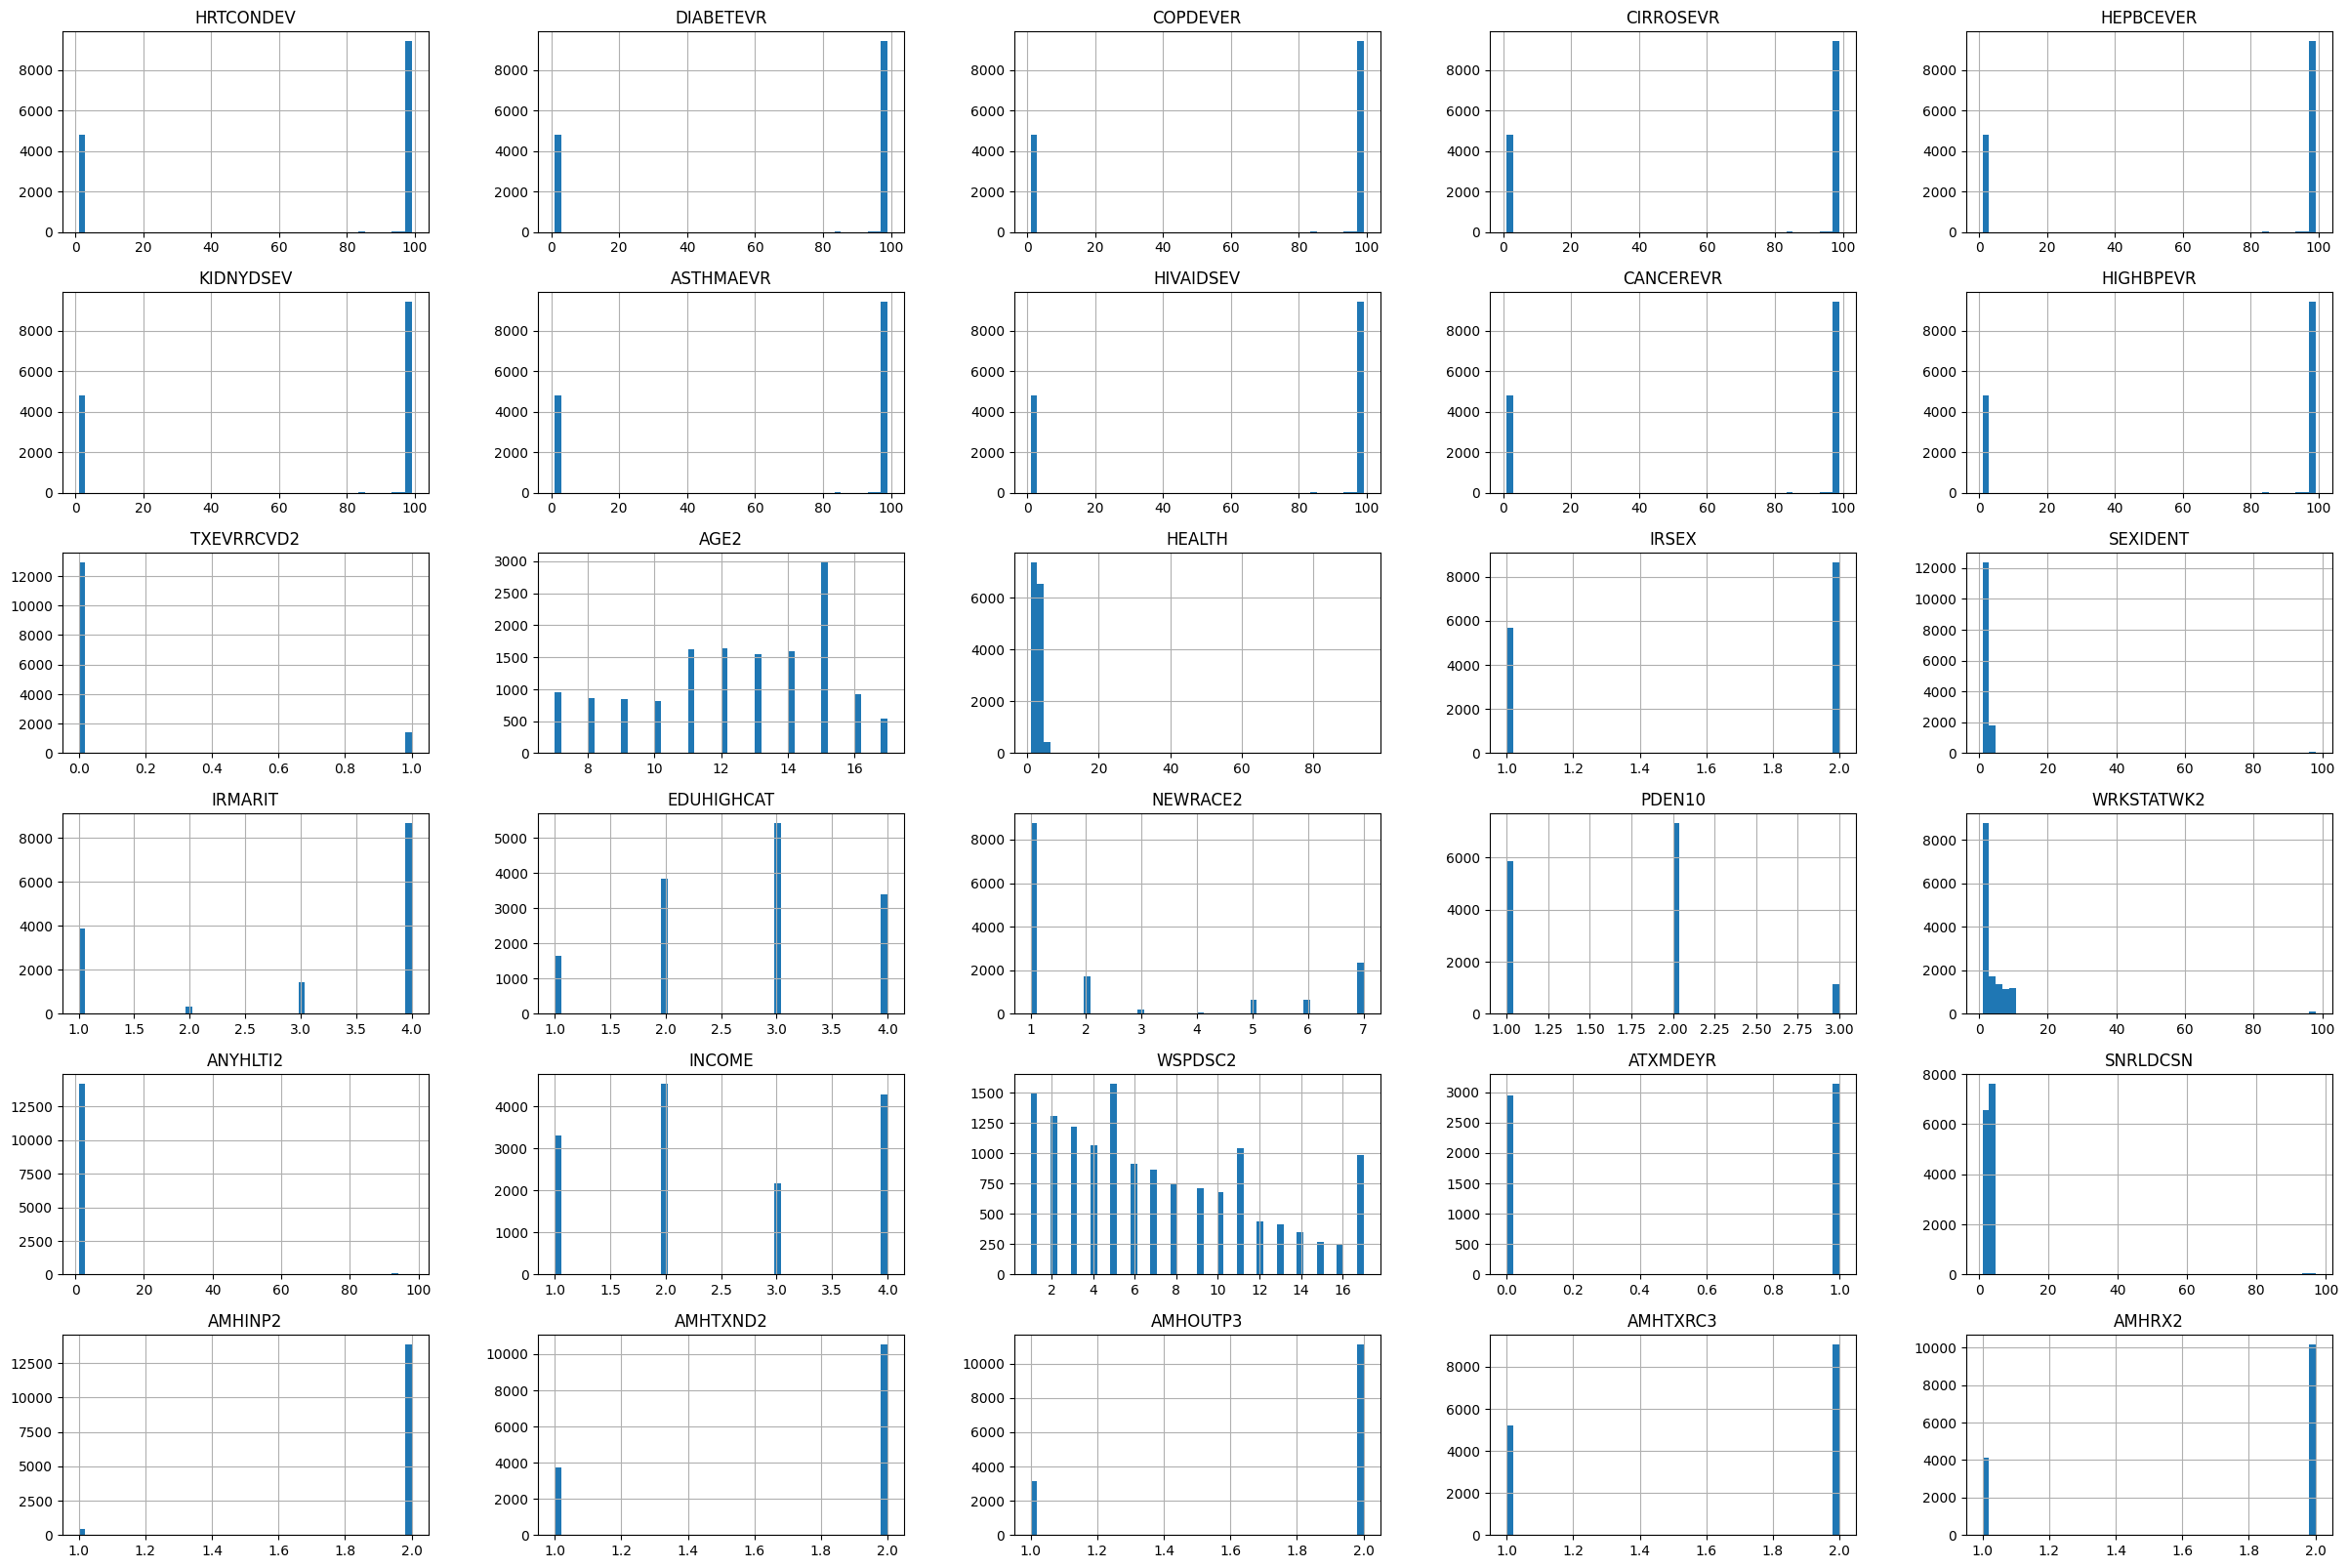

In [15]:
# Histograms for numerical variables
selected_data.hist(bins=50, figsize=(30, 20))
plt.show()

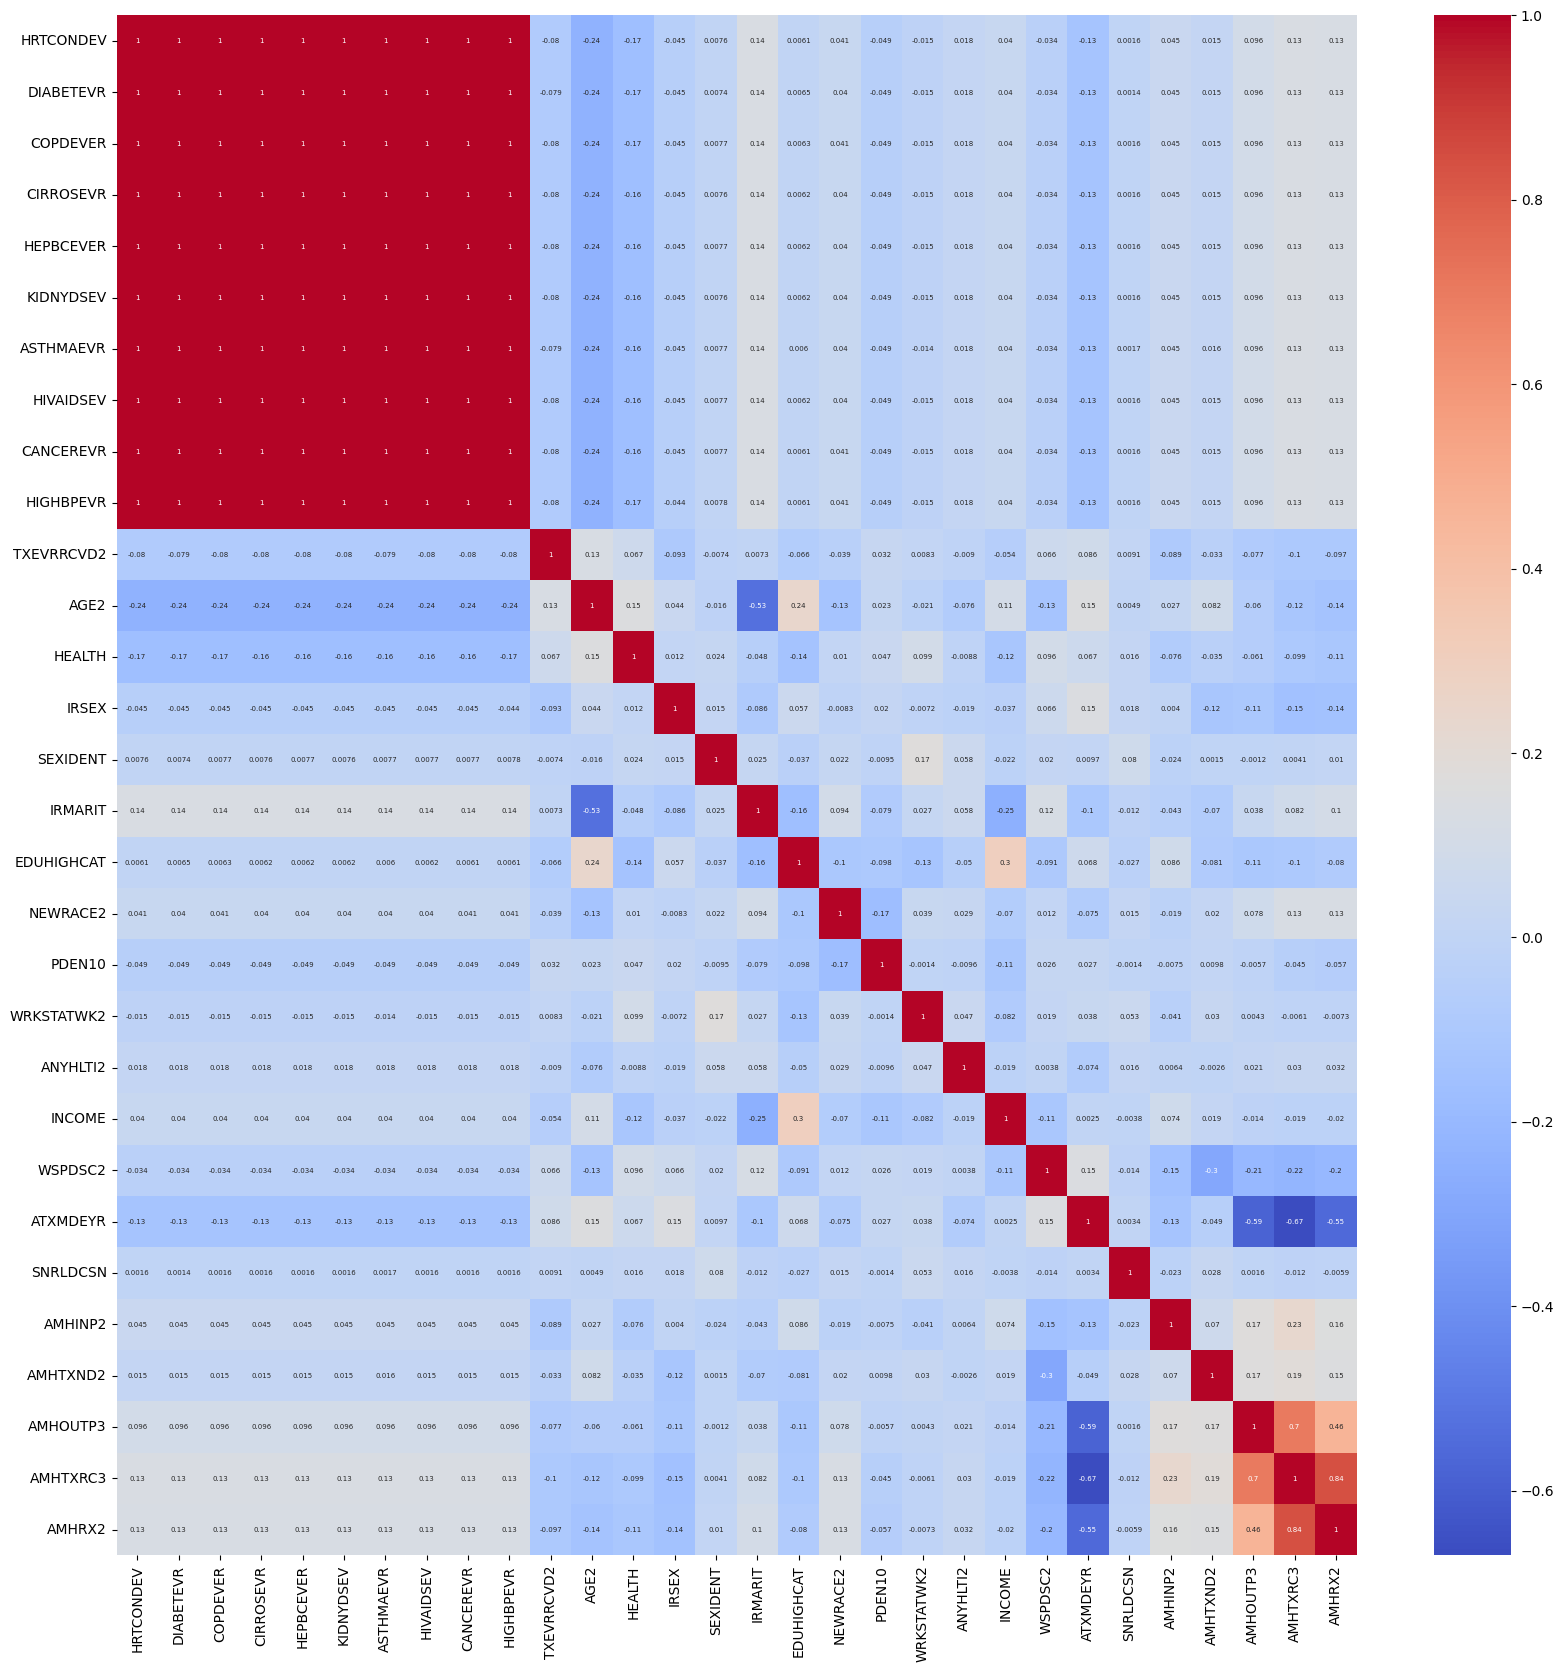

In [16]:
# Compute correlation matrix
corr_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 5}, cmap="coolwarm")
plt.show()

# Feature Engineering

 - To address the issue of multicollinearity and improve interpretability, we will perform feature engineering by grouping highly correlated variables together. This helps mitigate the confounding effects of correlated variables and allows us to gain a clearer understanding of their individual contributions. By reducing multicollinearity, we can enhance the accuracy and interpretability of our analysis.

 - Furthermore, we want to simplify our features by getting rid of unnessesary information and transforming our features into binary variables, it allows model to focus on the presence or absence of a specific characteristic rather than considering the magnitude or level of a variable.

In [17]:
def get_status(row):
    if 1 in row.values:
        return 1  # Yes
    else:
        return 0  # No

# Specify the input columns for feature engineering
input_columns = ['HRTCONDEV', 'DIABETEVR', 'COPDEVER', 'CIRROSEVR', 'HEPBCEVER', 
                 'KIDNYDSEV', 'ASTHMAEVR', 'HIVAIDSEV', 'CANCEREVR', 'HIGHBPEVR']

# Create a new column based on the input columns
features['Chronic_Dis'] = features[input_columns].apply(get_status, axis=1)

# Drop the original input columns
features.drop(input_columns, axis=1, inplace=True)

# Print the updated dataframe with the new feature column
features['Chronic_Dis']


C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\2075138414.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Chronic_Dis'] = features[input_columns].apply(get_status, axis=1)
C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\2075138414.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(input_columns, axis=1, inplace=True)


0        1
4        0
5        0
9        0
13       0
        ..
56118    0
56119    1
56127    0
56129    0
56132    0
Name: Chronic_Dis, Length: 14326, dtype: int64

In [18]:

def get_status(row):
    if row['ANYHLTI2'] in [1]:
        return 1  # Yes
    else:
        return 0  # No

# Specify the input columns for feature engineering
input_columns = ['ANYHLTI2']

# Create a new column based on the input columns
features['ANYHLTI2_FEATURE'] = features[input_columns].apply(get_status, axis=1)

# Drop the original input columns
features.drop(input_columns, axis=1, inplace=True)

# Print the updated dataframe with the new feature column
features['ANYHLTI2_FEATURE']

C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\3625888367.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['ANYHLTI2_FEATURE'] = features[input_columns].apply(get_status, axis=1)
C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\3625888367.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(input_columns, axis=1, inplace=True)


0        1
4        1
5        0
9        1
13       1
        ..
56118    1
56119    1
56127    1
56129    1
56132    0
Name: ANYHLTI2_FEATURE, Length: 14326, dtype: int64

In [19]:
def get_status(row):
    if row['HEALTH'] in [1, 2, 3]:
        return 1  # Good
    else:
        return 0  # Poor

# Specify the input columns for feature engineering
input_columns = ['HEALTH']

# Create a new column based on the input columns
features['HEALTH_FEATURE'] = features[input_columns].apply(get_status, axis=1)

# Drop the original input columns
features.drop(input_columns, axis=1, inplace=True)

# Print the updated dataframe with the new feature column
features['HEALTH_FEATURE']

C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\373518628.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['HEALTH_FEATURE'] = features[input_columns].apply(get_status, axis=1)
C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\373518628.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(input_columns, axis=1, inplace=True)


0        1
4        1
5        0
9        1
13       1
        ..
56118    1
56119    0
56127    1
56129    1
56132    1
Name: HEALTH_FEATURE, Length: 14326, dtype: int64

In [20]:
def get_status(row):
    if row['SEXIDENT'] in [2, 3]:
        return 0  
    else:
        return 1

# Specify the input columns for feature engineering
input_columns = ['SEXIDENT']

# Create a new column based on the input columns
features['SEXIDENT_FEATURES'] = features[input_columns].apply(get_status, axis=1)

# Drop the original input columns
features.drop(input_columns, axis=1, inplace=True)

# Print the updated dataframe with the new feature column
features['SEXIDENT_FEATURES']

C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\2379907471.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['SEXIDENT_FEATURES'] = features[input_columns].apply(get_status, axis=1)
C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\2379907471.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(input_columns, axis=1, inplace=True)


0        1
4        1
5        1
9        1
13       1
        ..
56118    1
56119    1
56127    1
56129    1
56132    0
Name: SEXIDENT_FEATURES, Length: 14326, dtype: int64

In [21]:
def get_status(row):
    if row['IRMARIT'] in [1]:
        return 1
    else:
        return 0

# Specify the input columns for feature engineering
input_columns = ['IRMARIT']

# Create a new column based on the input columns
features['IRMARIT_FEATURES'] = features[input_columns].apply(get_status, axis=1)

# Drop the original input columns
features.drop(input_columns, axis=1, inplace=True)

# Print the updated dataframe with the new feature column
features['IRMARIT_FEATURES']

C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\2955152435.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['IRMARIT_FEATURES'] = features[input_columns].apply(get_status, axis=1)
C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\2955152435.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(input_columns, axis=1, inplace=True)


0        1
4        0
5        0
9        1
13       0
        ..
56118    1
56119    1
56127    0
56129    1
56132    0
Name: IRMARIT_FEATURES, Length: 14326, dtype: int64

In [22]:
def get_status(row):
    if row['NEWRACE2'] in [1]:
        return 1
    else:
        return 0

# Specify the input columns for feature engineering
input_columns = ['NEWRACE2']

# Create a new column based on the input columns
features['NEWRACE2_FEATURES'] = features[input_columns].apply(get_status, axis=1)

# Drop the original input columns
features.drop(input_columns, axis=1, inplace=True)

# Print the updated dataframe with the new feature column
features['NEWRACE2_FEATURES']

C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\649280764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['NEWRACE2_FEATURES'] = features[input_columns].apply(get_status, axis=1)
C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\649280764.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(input_columns, axis=1, inplace=True)


0        1
4        1
5        0
9        0
13       1
        ..
56118    1
56119    0
56127    0
56129    1
56132    0
Name: NEWRACE2_FEATURES, Length: 14326, dtype: int64

In [23]:
def get_status(row):
    if row['PDEN10'] in [1]:
        return 1
    else:
        return 0

# Specify the input columns for feature engineering
input_columns = ['PDEN10']

# Create a new column based on the input columns
features['PDEN10_FEATURES'] = features[input_columns].apply(get_status, axis=1)

# Drop the original input columns
features.drop(input_columns, axis=1, inplace=True)

# Print the updated dataframe with the new feature column
features['PDEN10_FEATURES']

C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\4165398446.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['PDEN10_FEATURES'] = features[input_columns].apply(get_status, axis=1)
C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\4165398446.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(input_columns, axis=1, inplace=True)


0        0
4        0
5        1
9        1
13       0
        ..
56118    1
56119    0
56127    1
56129    0
56132    0
Name: PDEN10_FEATURES, Length: 14326, dtype: int64

In [24]:


def get_status(row):
    if row['WRKSTATWK2'] in [1, 2, 3]:
        return 1
    else:
        return 0

# Specify the input columns for feature engineering
input_columns = ['WRKSTATWK2']

# Create a new column based on the input columns
features['WRKSTATWK2_FEATURES'] = features[input_columns].apply(get_status, axis=1)

# Drop the original input columns
features.drop(input_columns, axis=1, inplace=True)

# Print the updated dataframe with the new feature column
features['WRKSTATWK2_FEATURES']

C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\2187809273.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['WRKSTATWK2_FEATURES'] = features[input_columns].apply(get_status, axis=1)
C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\2187809273.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(input_columns, axis=1, inplace=True)


0        1
4        0
5        1
9        0
13       0
        ..
56118    1
56119    1
56127    0
56129    1
56132    1
Name: WRKSTATWK2_FEATURES, Length: 14326, dtype: int64

In [25]:
def get_status(row):
    if row['SNRLDCSN'] in [3,4]:
        return 1
    else:
        return 0

# Specify the input columns for feature engineering
input_columns = ['SNRLDCSN']

# Create a new column based on the input columns
features['SNRLDCSN_FEATURES'] = features[input_columns].apply(get_status, axis=1)

# Drop the original input columns
features.drop(input_columns, axis=1, inplace=True)

# Print the updated dataframe with the new feature column
features['SNRLDCSN_FEATURES']

C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\3226162461.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['SNRLDCSN_FEATURES'] = features[input_columns].apply(get_status, axis=1)
C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\3226162461.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(input_columns, axis=1, inplace=True)


0        0
4        1
5        1
9        1
13       1
        ..
56118    1
56119    1
56127    1
56129    1
56132    1
Name: SNRLDCSN_FEATURES, Length: 14326, dtype: int64

In [26]:
def recode_age(row):
    if row['AGE2'] in range(1, 10):
        return '20s'
    elif row['AGE2'] in [11, 13]:
        return '20s'
    elif row['AGE2'] in [13, 14]:
        return '30s,40s'
    elif row['AGE2'] == 16:
        return '50s,60s'
    elif row['AGE2'] == 17:
        return '60+'
    else:
        return 'BASELINE'

# Specify the input columns for feature engineering
input_columns = ['AGE2']

# Create a new column based on the input columns
features['AGE2_FEATURES'] = features[input_columns].apply(recode_age, axis=1)

# Drop the original input columns
features.drop(input_columns, axis=1, inplace=True)

# Print the updated dataframe with the new feature column
print(features['AGE2_FEATURES'])


0        BASELINE
4             20s
5         50s,60s
9        BASELINE
13            20s
           ...   
56118    BASELINE
56119    BASELINE
56127         20s
56129         20s
56132         20s
Name: AGE2_FEATURES, Length: 14326, dtype: object


C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\4226662767.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['AGE2_FEATURES'] = features[input_columns].apply(recode_age, axis=1)
C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\4226662767.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(input_columns, axis=1, inplace=True)


In [27]:
def recode_wind_speed(row):
    if row['WSPDSC2'] in range(0, 6):
        return 'Low Level'
    elif row['WSPDSC2'] in range(6, 12):
        return 'Moderate Level'
    elif row['WSPDSC2'] in range(12, 16):
        return 'High Level'
    else:
        return 'BASELINE'

# Specify the input columns for feature engineering
input_columns = ['WSPDSC2']

# Create a new column based on the input columns
features['WSPDSC2_FEATURES'] = features[input_columns].apply(recode_wind_speed, axis=1)

# Drop the original input columns
features.drop(input_columns, axis=1, inplace=True)

# Print the updated dataframe with the new feature column
print(features['WSPDSC2_FEATURES'])


0        Moderate Level
4             Low Level
5        Moderate Level
9        Moderate Level
13             BASELINE
              ...      
56118    Moderate Level
56119    Moderate Level
56127    Moderate Level
56129    Moderate Level
56132         Low Level
Name: WSPDSC2_FEATURES, Length: 14326, dtype: object


C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\1392577088.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['WSPDSC2_FEATURES'] = features[input_columns].apply(recode_wind_speed, axis=1)
C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\1392577088.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(input_columns, axis=1, inplace=True)


# Handling Missing values and Encoding categorical variables 
Based on the analysis of the document "NSDUH Methods for Handling Missing Item Values 2018", several
methods are suggested for handling missing values in our dataset:

1. Weighted Sequential Hot Deck (WSHD) Imputation: This method involves the formation of imputation cells, the sorting of item respondents and nonrespondents within imputation cells, and the assignment of a donor to each item nonrespondent. The imputation cells are defined by the cross-classification of gender and race/ethnicity, and the sorting variable within each cell is age. This method is simple and straightforward, and it has been used in previous regression analyses of NSDUH data (Page 33).

2. Complex Tree-Based Hot Deck (CTBHD) Imputation: This method selects distinct cells using regression trees and cycles two times through the variables with missing item values to capture more information from item respondents given a complex missingness pattern. WSHD would be used to select donors within cells. This method is more data-driven and can capture more information from item respondents given a complex missingness pattern (Page 33).

3. Maximum-Likelihood Estimation (MLE): MLE appears to have many virtues based on the literature review, but commonly used statistical software packages like SAS and Stata did not fully support MLE for complex survey data at the time the analysis described in this report was undertaken. The ideal software would offer the ability to perform MLE on categorical or continuous data, with some missing values, from complex survey samples that include unequal weights, clustering, and stratification (Page 33).

4. Listwise Deletion (LD) and Reweighting (REWT): These methods are simple and their properties are not affected when the probability of a record being deleted is a function of the covariate values that are missing, so long as the regression model being analyzed is correct in the population of interest (Page 67).

5. Predictive Mean Neighborhood (PMN) and Modified Predictive Mean Neighborhood (modPMN): These methods have been used to impute missing values in the survey since 1999 and is a combination of model-assisted and nearest neighbor hot-deck imputation methods. The modPMN procedure uses the model-assisted imputation methodology of the PMN approach while also permitting the user to cycle through a set of related variables multiple times (Page 29).

However, most of those methods are very specific and requires manual implementation in Python, as in the document, these methods were implemented using statistic specialized software. Nevertheless, last method of PMN can be approximated using IterativeImputer with RandomForestRegressor.
```python
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

imp = IterativeImputer(estimator=RandomForestRegressor(), initial_strategy='mode', max_iter=10, random_state=0)
features = imp.fit_transform(features)
```

This method is very computationally expensive for such large dataset but gives no significant difference in our case, so its usage absolutely volunteer.

For categorical variables which consists of important categories which cannot be transformed into binary variables without significant information loss, we have used dummy encoding.

In [28]:
import pandas as pd

# Replace NaN values with mode
features = features.fillna(features.mode().iloc[0])

# Perform dummy encoding
dummy_columns = ['AGE2_FEATURES', 'EDUHIGHCAT', 'INCOME', 'WSPDSC2_FEATURES']
df = pd.get_dummies(features, columns=dummy_columns)
df.drop(['AGE2_FEATURES_BASELINE','WSPDSC2_FEATURES_BASELINE','EDUHIGHCAT_3', 'INCOME_3'], axis=1, inplace=True)

# Replace boolean values with 1 and 0
df = df.replace({True: 1, False: 0})

# Print the updated dataframe
df

TXEVRRCVD2  IRSEX  ATXMDEYR  Chronic_Dis  ANYHLTI2_FEATURE   
0               0      1       1.0            1                 1  \
4               0      1       1.0            0                 1   
5               0      1       0.0            0                 0   
9               0      2       1.0            0                 1   
13              0      2       0.0            0                 1   
...           ...    ...       ...          ...               ...   
56118           0      1       0.0            0                 1   
56119           0      2       1.0            1                 1   
56127           0      2       1.0            0                 1   
56129           0      2       1.0            0                 1   
56132           0      2       1.0            0                 0   

       HEALTH_FEATURE  SEXIDENT_FEATURES  IRMARIT_FEATURES  NEWRACE2_FEATURES   
0                   1                  1                 1                  1  \
4                   1                  1                 0                  1   
5                   0                  1                 0                  0   
9                   1                  1                 1                  0   
13                  1                  1                 0                  1   
...               ...                ...               ...                ...   
56118               1                  1                 1                  1   
56119               0                  1                 1                  0   
56127               1                  1                 0                  0   
56129               1                  1                 1                  1   
56132               1                  0                 0                  0   

       PDEN10_FEATURES  ...  AGE2_FEATURES_60+  EDUHIGHCAT_1  EDUHIGHCAT_2   
0                    0  ...                  0             0             0  \
4                    0  ...                  0             1             0   
5                    1  ...                  0             0             0   
9                    1  ...                  0             0             0   
13                   0  ...                  0             0             0   
...                ...  ...                ...           ...           ...   
56118                1  ...                  0             0             0   
56119                0  ...                  0             0             0   
56127                1  ...                  0             0             1   
56129                0  ...                  0             0             0   
56132                0  ...                  0             0             0   

       EDUHIGHCAT_4  INCOME_1  INCOME_2  INCOME_4   
0                 1         0         0         1  \
4                 0         0         0         1   
5                 0         1         0         0   
9                 1         0         1         0   
13                0         1         0         0   
...             ...       ...       ...       ...   
56118             1         0         0         0   
56119             0         0         0         1   
56127             0         0         1         0   
56129             1         0         0         1   
56132             1         0         1         0   

       WSPDSC2_FEATURES_High Level  WSPDSC2_FEATURES_Low Level   
0                                0                           0  \
4                                0                           1   
5                                0                           0   
9                                0                           0   
13                               0                           0   
...                            ...                         ...   
56118                            0                           0   
56119                            0                           0   
56127                            0   

To ensure that all variables are binary encoded into 1 and 0 and nothing else, we additionally apply binary encoding over whole dataset.

In [29]:
# Define a function to perform the encoding
def binary_encoding(value):
    if value == 1 or value == 1.0:
        return 1
    else:
        return 0

# Apply the encoding function to all columns in the DataFrame
df = df.applymap(binary_encoding)

# Print the encoded DataFrame
df

TXEVRRCVD2  IRSEX  ATXMDEYR  Chronic_Dis  ANYHLTI2_FEATURE   
0               0      1         1            1                 1  \
4               0      1         1            0                 1   
5               0      1         0            0                 0   
9               0      0         1            0                 1   
13              0      0         0            0                 1   
...           ...    ...       ...          ...               ...   
56118           0      1         0            0                 1   
56119           0      0         1            1                 1   
56127           0      0         1            0                 1   
56129           0      0         1            0                 1   
56132           0      0         1            0                 0   

       HEALTH_FEATURE  SEXIDENT_FEATURES  IRMARIT_FEATURES  NEWRACE2_FEATURES   
0                   1                  1                 1                  1  \
4                   1                  1                 0                  1   
5                   0                  1                 0                  0   
9                   1                  1                 1                  0   
13                  1                  1                 0                  1   
...               ...                ...               ...                ...   
56118               1                  1                 1                  1   
56119               0                  1                 1                  0   
56127               1                  1                 0                  0   
56129               1                  1                 1                  1   
56132               1                  0                 0                  0   

       PDEN10_FEATURES  ...  AGE2_FEATURES_60+  EDUHIGHCAT_1  EDUHIGHCAT_2   
0                    0  ...                  0             0             0  \
4                    0  ...                  0             1             0   
5                    1  ...                  0             0             0   
9                    1  ...                  0             0             0   
13                   0  ...                  0             0             0   
...                ...  ...                ...           ...           ...   
56118                1  ...                  0             0             0   
56119                0  ...                  0             0             0   
56127                1  ...                  0             0             1   
56129                0  ...                  0             0             0   
56132                0  ...                  0             0             0   

       EDUHIGHCAT_4  INCOME_1  INCOME_2  INCOME_4   
0                 1         0         0         1  \
4                 0         0         0         1   
5                 0         1         0         0   
9                 1         0         1         0   
13                0         1         0         0   
...             ...       ...       ...       ...   
56118             1         0         0         0   
56119             0         0         0         1   
56127             0         0         1         0   
56129             1         0         0         1   
56132             1         0         1         0   

       WSPDSC2_FEATURES_High Level  WSPDSC2_FEATURES_Low Level   
0                                0                           0  \
4                                0                           1   
5                                0                           0   
9                                0                           0   
13                               0                           0   
...                            ...                         ...   
56118                            0                           0   
56119                            0                           0   
56127                            0   

Now we can check that all variables has only values of 1 and 0

In [30]:
import pandas as pd

df
# Get the list of column names
columns = df.columns

# Iterate over each column
for column in columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("-----------------------")


Column: TXEVRRCVD2
Unique values: [0 1]
-----------------------
Column: IRSEX
Unique values: [1 0]
-----------------------
Column: ATXMDEYR
Unique values: [1 0]
-----------------------
Column: Chronic_Dis
Unique values: [1 0]
-----------------------
Column: ANYHLTI2_FEATURE
Unique values: [1 0]
-----------------------
Column: HEALTH_FEATURE
Unique values: [1 0]
-----------------------
Column: SEXIDENT_FEATURES
Unique values: [1 0]
-----------------------
Column: IRMARIT_FEATURES
Unique values: [1 0]
-----------------------
Column: NEWRACE2_FEATURES
Unique values: [1 0]
-----------------------
Column: PDEN10_FEATURES
Unique values: [0 1]
-----------------------
Column: WRKSTATWK2_FEATURES
Unique values: [1 0]
-----------------------
Column: SNRLDCSN_FEATURES
Unique values: [0 1]
-----------------------
Column: AGE2_FEATURES_20s
Unique values: [0 1]
-----------------------
Column: AGE2_FEATURES_30s,40s
Unique values: [0 1]
-----------------------
Column: AGE2_FEATURES_50s,60s
Unique valu

Checking heatmap of resulted to ensure that we have no multicolinearity

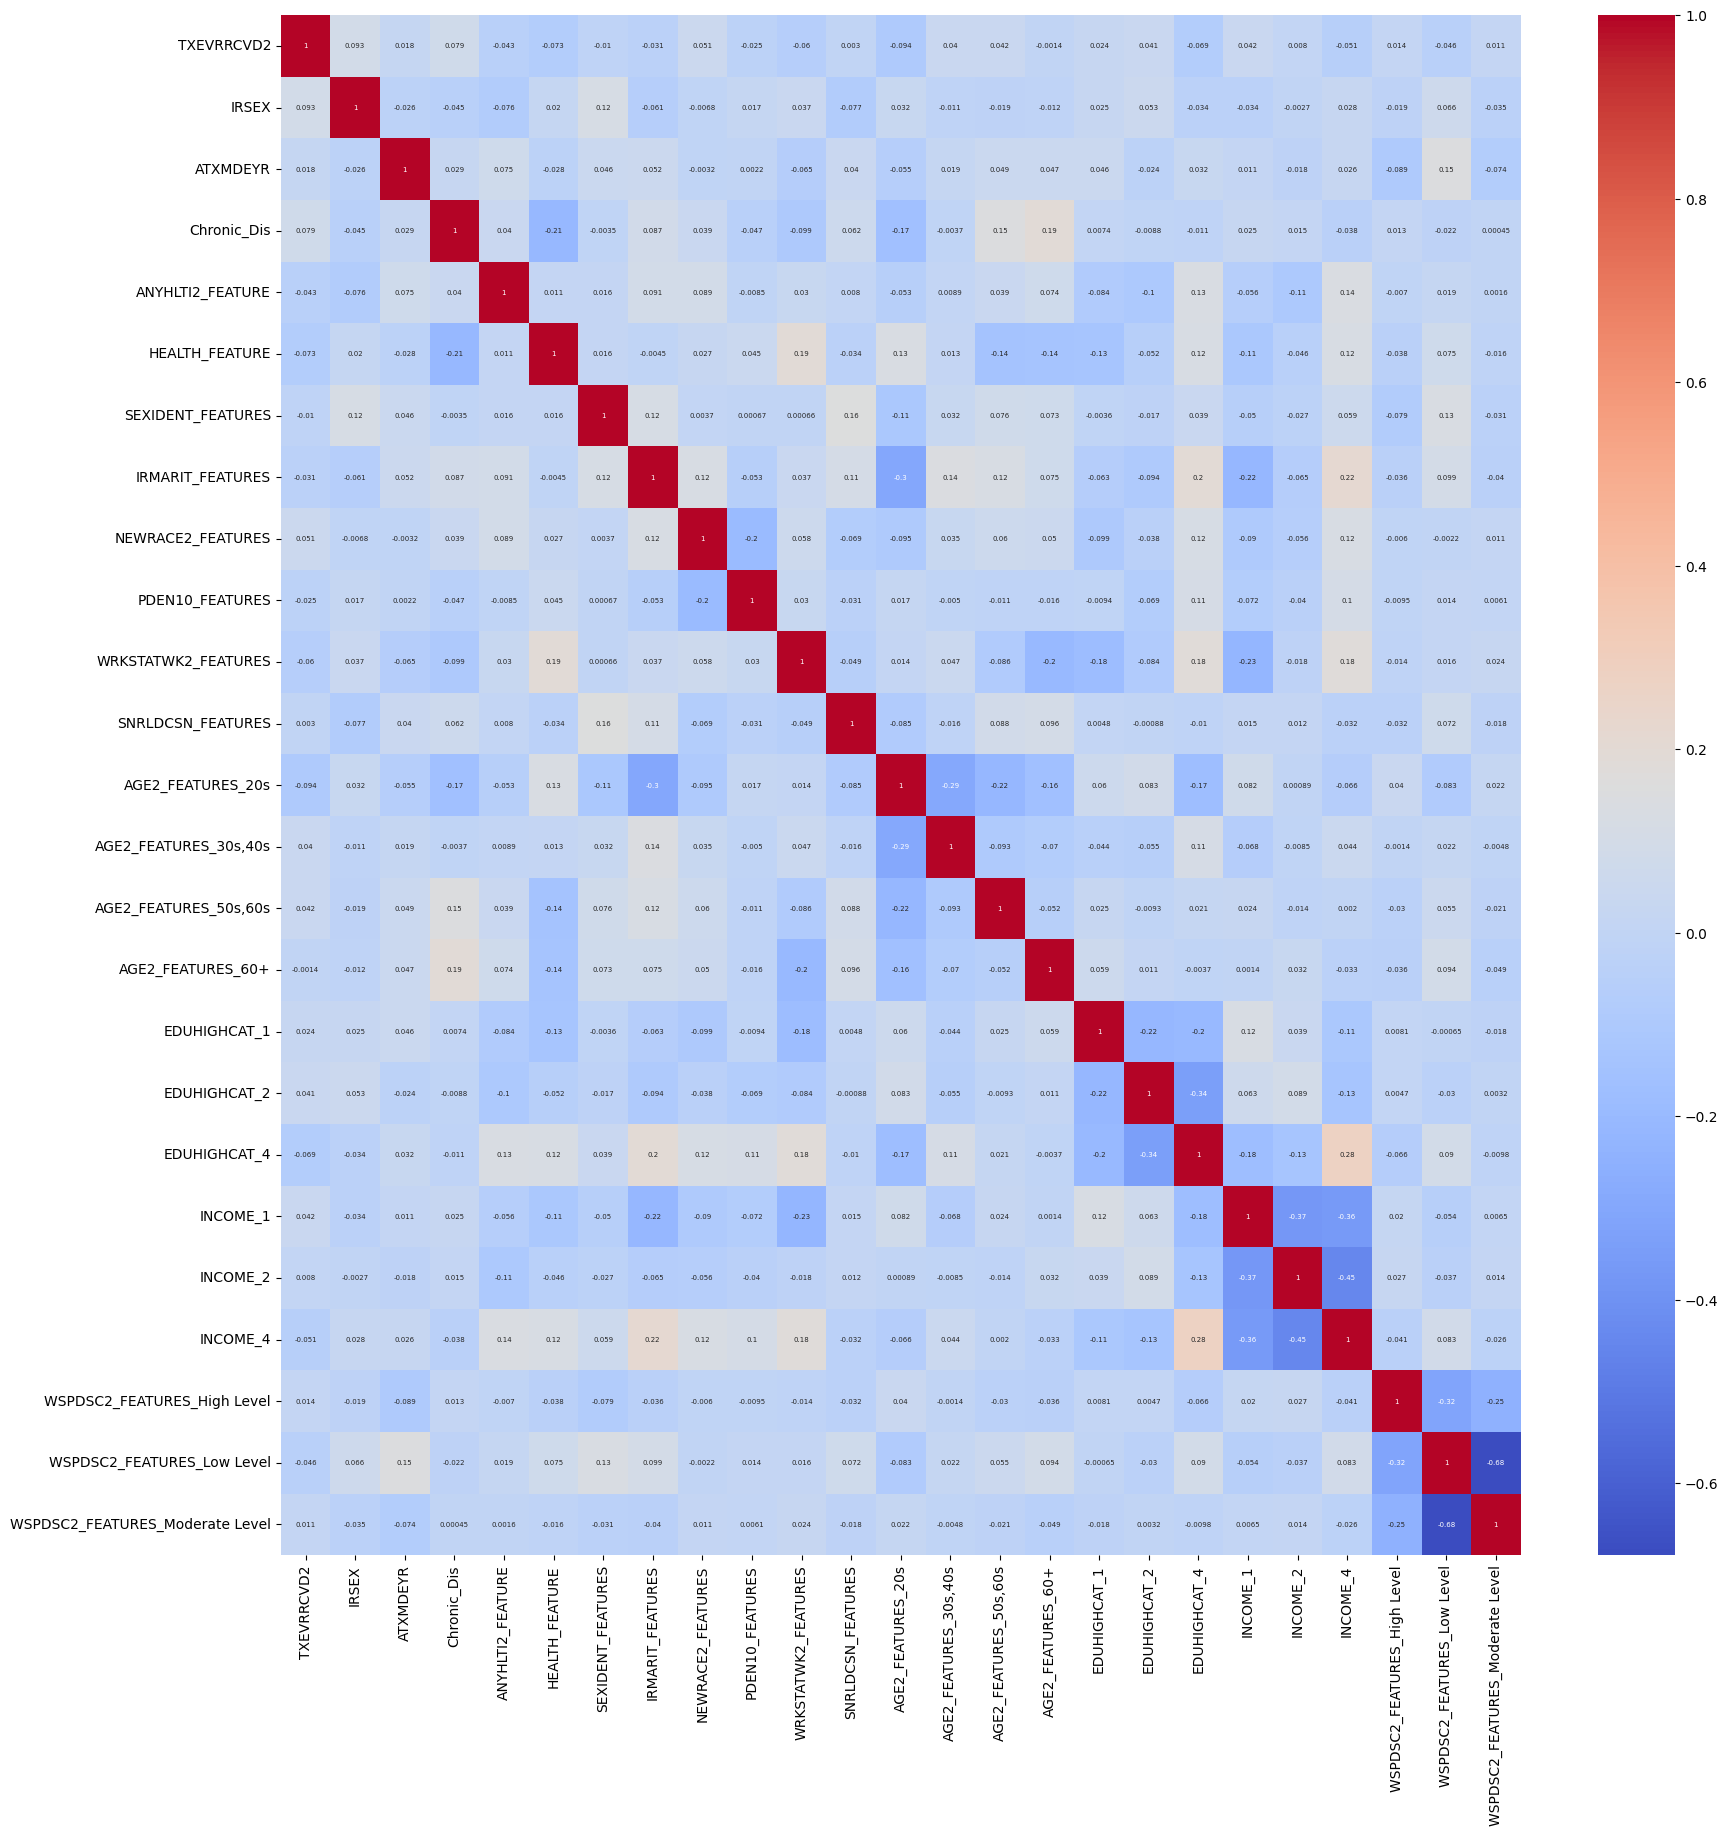

In [31]:
# Compute correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 5}, cmap="coolwarm")
plt.show()

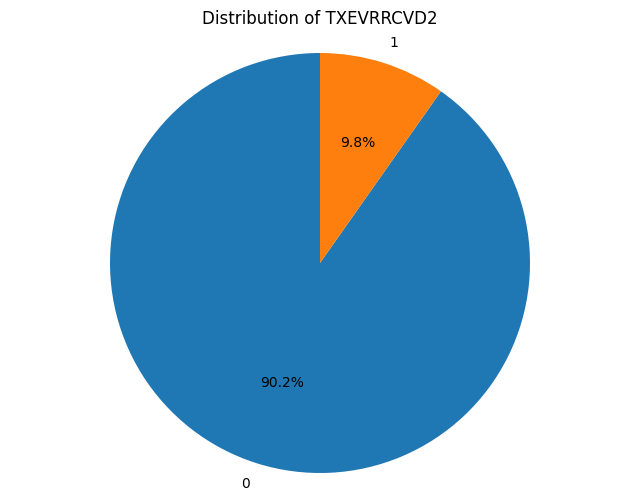

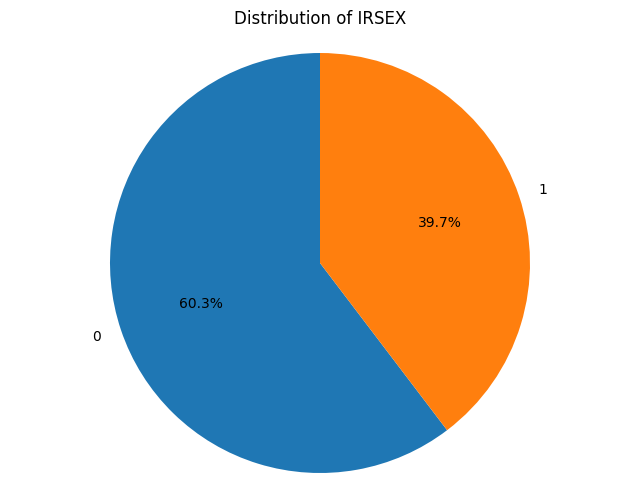

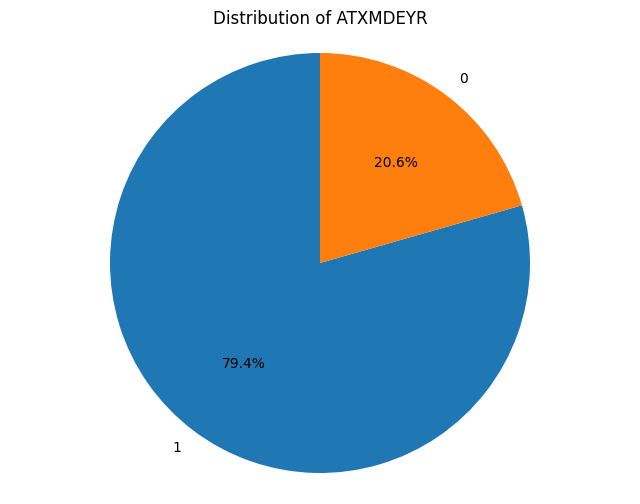

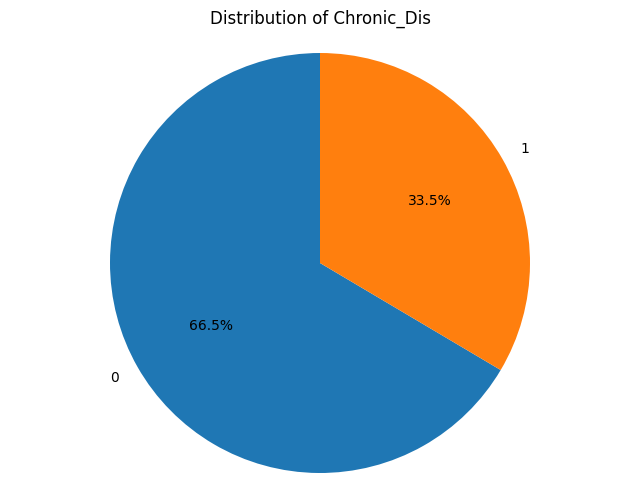

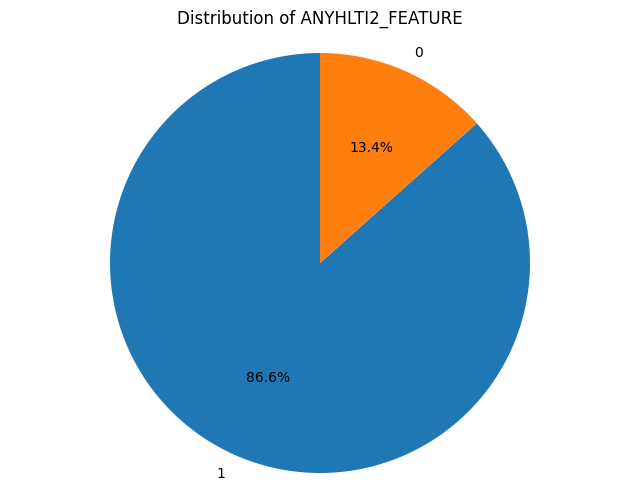

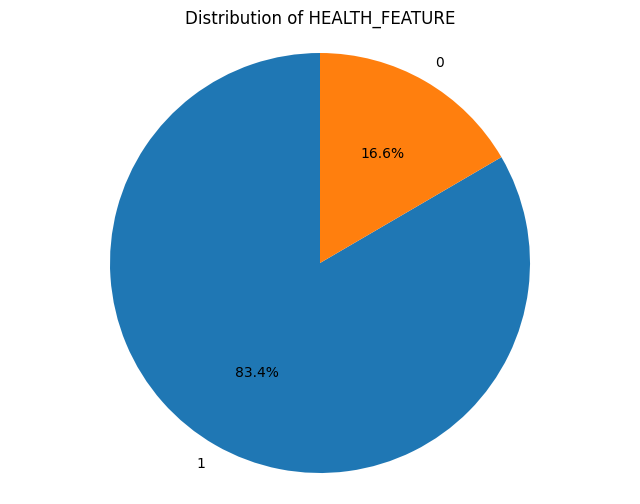

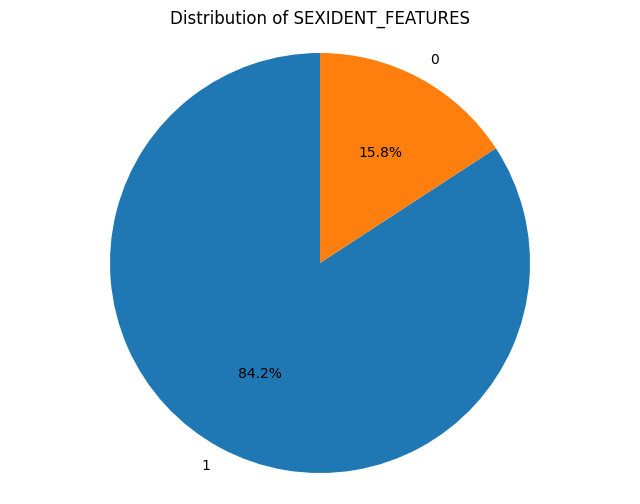

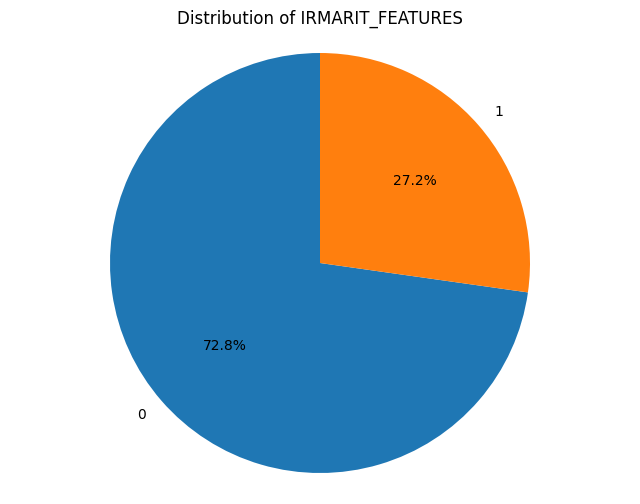

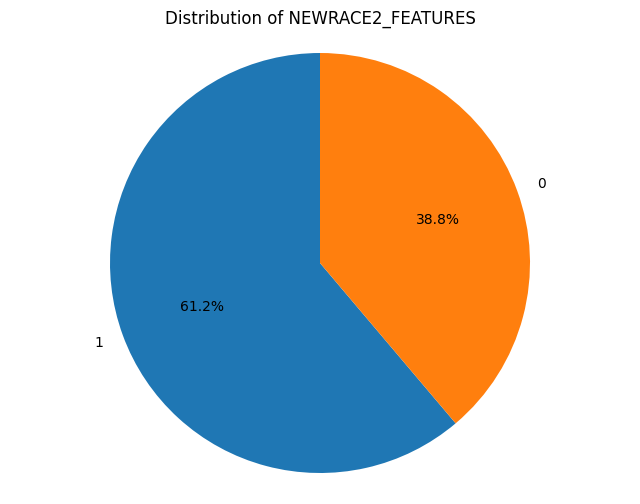

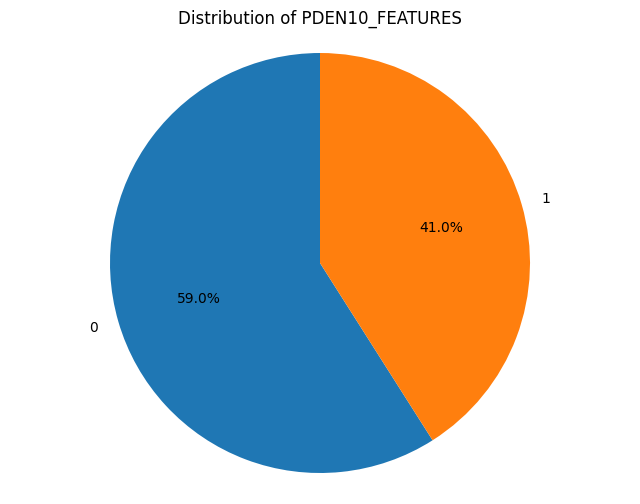

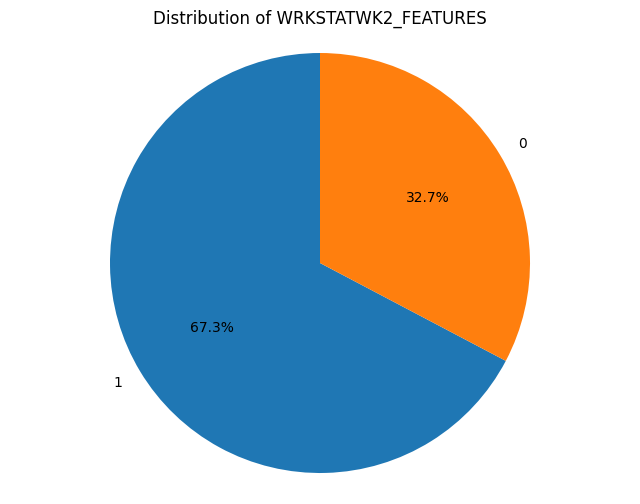

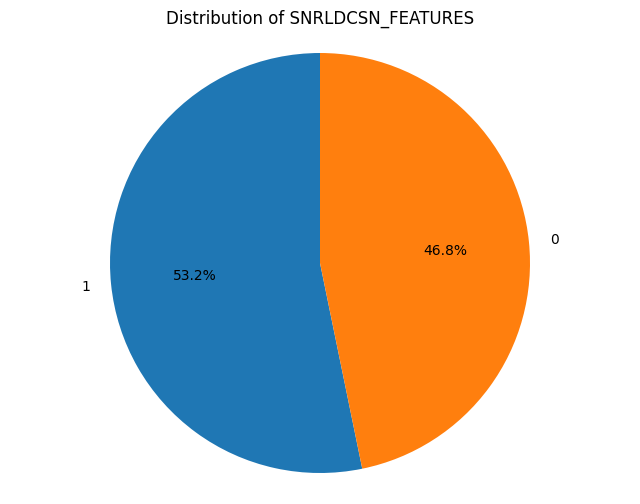

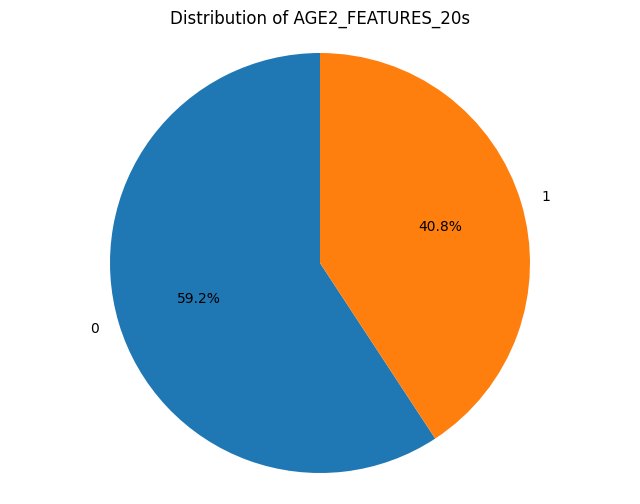

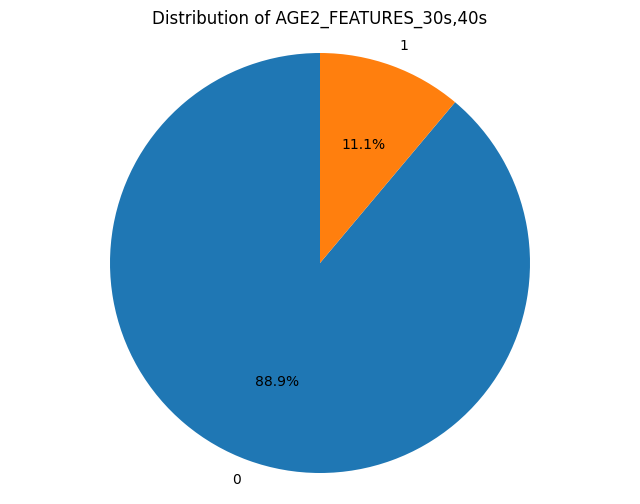

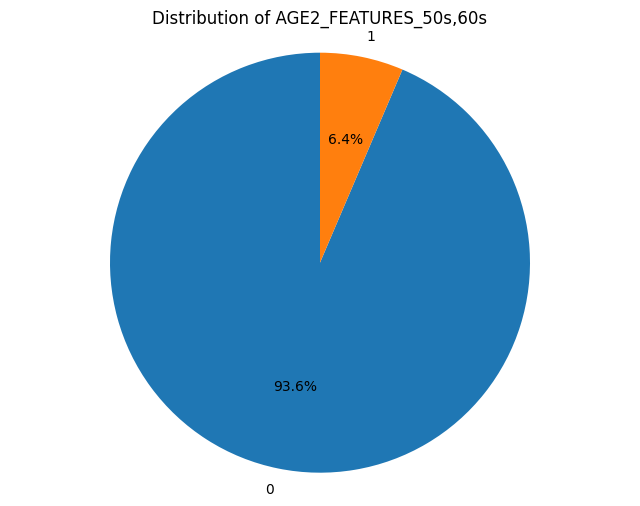

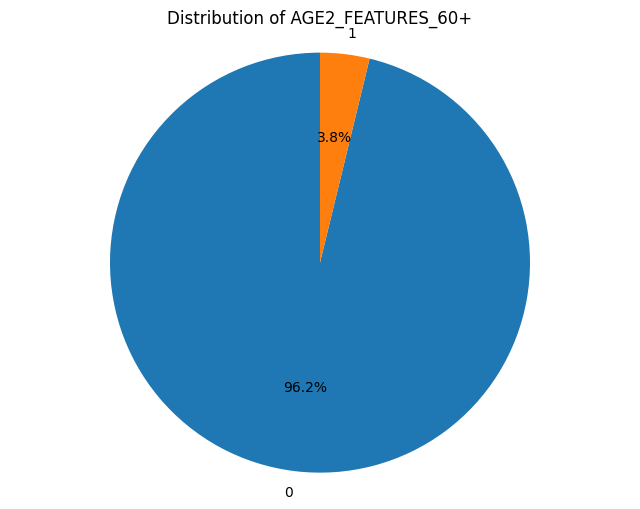

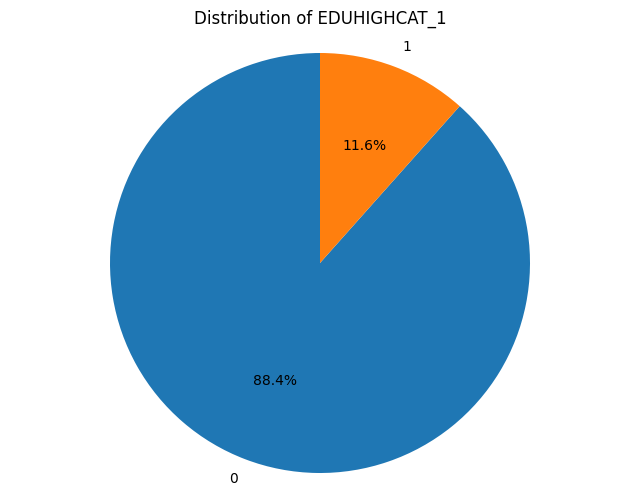

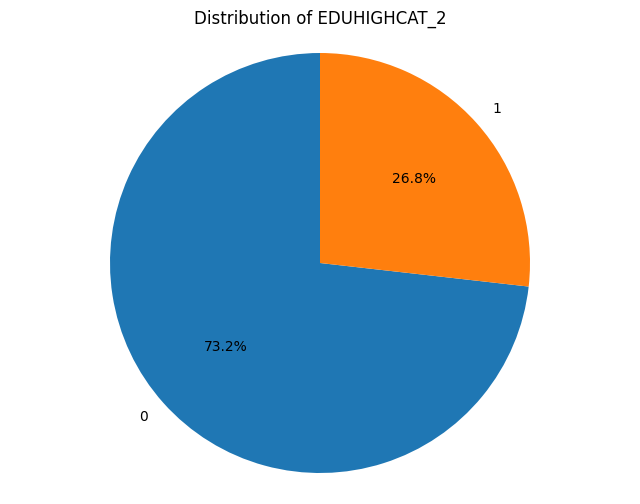

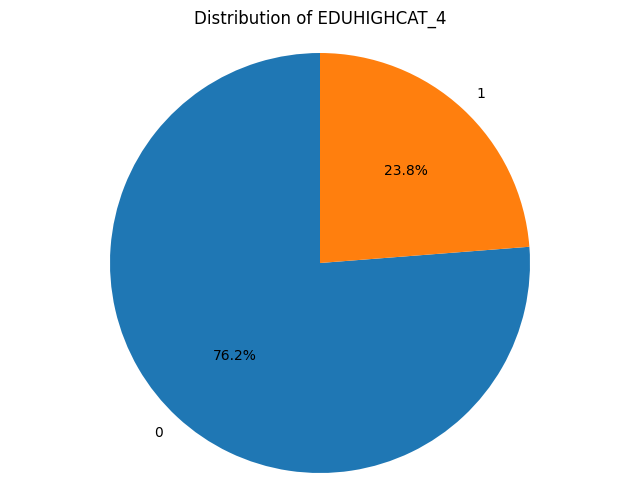

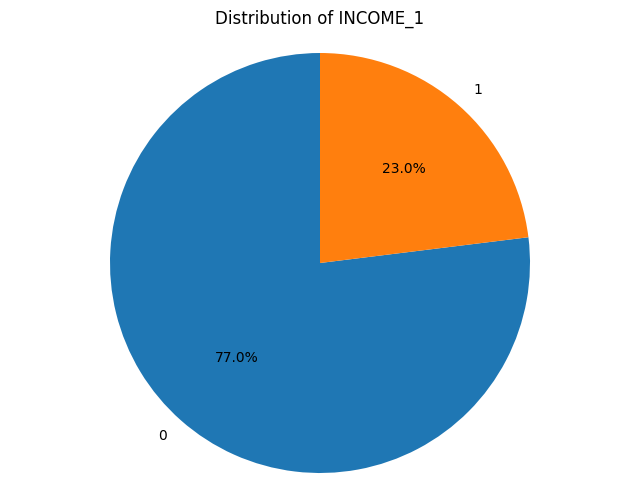

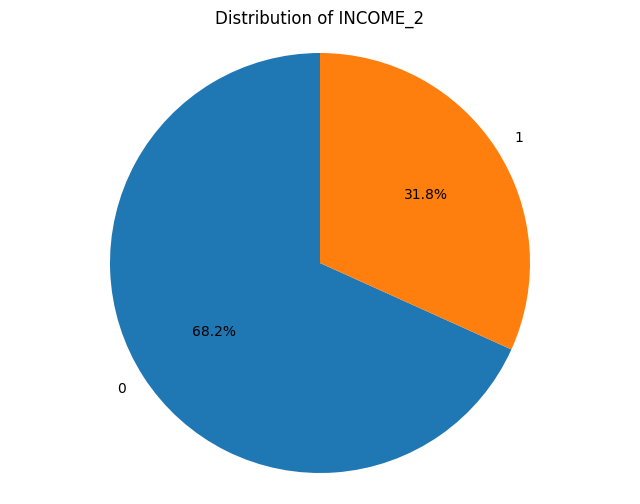

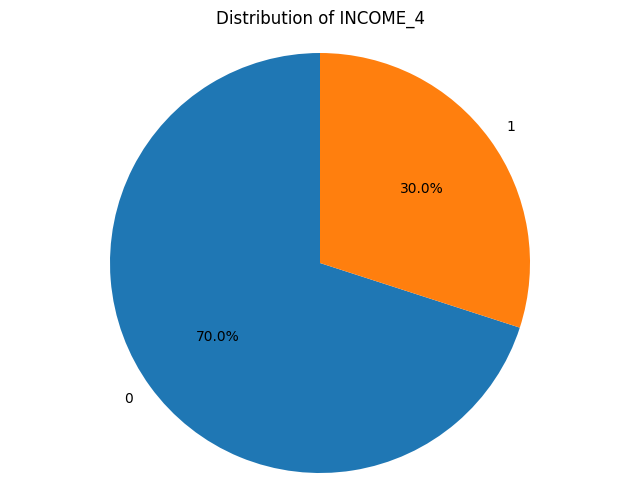

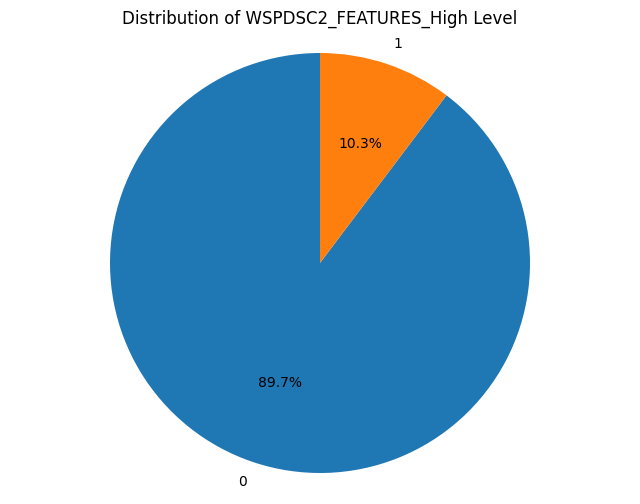

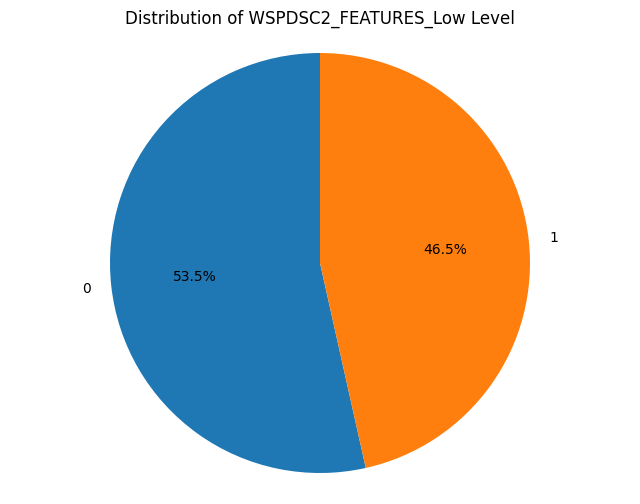

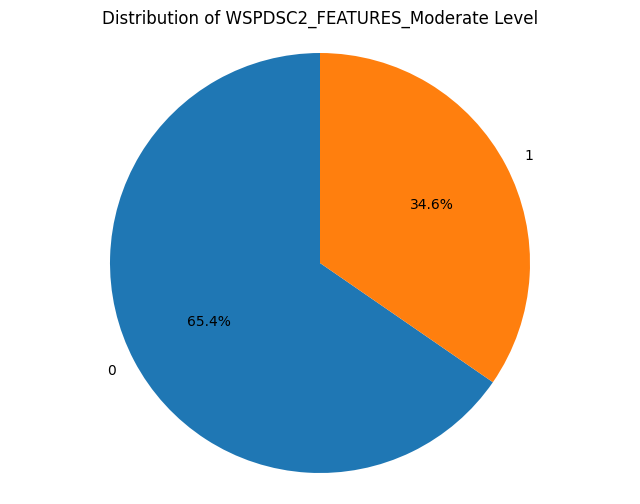

In [32]:
import matplotlib.pyplot as plt

# Function to plot pie chart for a given column
def plot_pie(column):
    counts = df[column].value_counts()
    labels = counts.index.tolist()
    sizes = counts.values.tolist()
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Distribution of {column}')
    plt.show()

# Iterate over each column in the dataframe
for column in df.columns:
    plot_pie(column)


## Check for zero variance
As we are using only subset from the dataset, some of the variables may have zero variance due to class imbalance in the original dataset. Variables with zero variance do not provide any useful information for modeling or analysis. Since all the values are the same, they do not contribute to understanding the relationships between variables or explaining the target variable. Keeping such variables would only add redundancy to the dataset without any benefit. Therefore, we need to clean our data.
Therefore, we need to check for zero variacne in our dataset

In [33]:
# Function to get zero variance columns
def get_zero_variance_columns(data):
    zero_variance_columns = []
    for column in data.columns:
        if data[column].var() == 0:
            zero_variance_columns.append(column)
    return zero_variance_columns

# Get and print zero variance columns
zero_variance_cols = get_zero_variance_columns(df)

if len(zero_variance_cols) > 0:
    print("Columns with zero variance:")
    for column in zero_variance_cols:
        print(column)
else:
    print("No columns with zero variance found.")

No columns with zero variance found.


# Models comparison
To ensure our methodology is using the most efficient model, we will compare perfomance of several machine learning algorithms.

In [34]:
import copy
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Classifier algorithms
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Deep learning model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

import copy
X_or = copy.deepcopy(df)
X_or

targets = selected_data[ment_util]
targets = targets.fillna(targets.mode().iloc[0])
targets

# Iterate over each target variable in targets
best_models = {}
for target_col in targets.columns:
    print(f"\nTarget variable: {target_col}")

    X = copy.deepcopy(X_or)
    Y = targets[target_col] - 1  # Subtract 1 to make it 0 and 1

    # Standard scaler
    sc = StandardScaler()
    
    # Results of each classifier
    results = []
    
    # Define the undersampling method
    undersampler = RandomUnderSampler(replacement = False, sampling_strategy = 'majority')
    
    # Loop through each target column
    y = Y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize features
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Apply SMOTE
    X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)
    
    # Try each classifier
    for name, classifier in classifiers.items():
        classifier.fit(X_train_res, y_train_res)
    
        # Score the model
        score = classifier.score(X_test, y_test)
        results.append((name, score))
    
    # Try deep learning model
    model = KerasClassifier(build_fn=create_model, verbose=0)
    model.fit(X_train_res, y_train_res, epochs=50, batch_size=10)
    
    # Score the model
    score = accuracy_score(y_test, model.predict(X_test))
    results.append(('NN', score))
    
    # Results data frame
    results_df = pd.DataFrame(results, columns=['Model', 'Score'])
    print(results_df)

    # Get the best model for this target
    best_model = results_df.loc[results_df['Score'].idxmax(), 'Model']
    best_models[target_col] = best_model

# Print the best models for each target
print('--------------------------------')
for target, model in best_models.items():
    print(f"Best model for {target} is {model}")

C:\Users\BlownSugar\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Target variable: AMHINP2


C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\951143522.py:79: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


90/90 [==============================] - 0s 504us/step
                Model     Score
0        RandomForest  0.681089
1  LogisticRegression  0.745639
2                 SVC  0.692952
3                 XGB  0.666434
4                  NN  0.707606

Target variable: AMHTXND2


C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\951143522.py:79: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


90/90 [==============================] - 0s 493us/step
                Model     Score
0        RandomForest  0.620028
1  LogisticRegression  0.660154
2                 SVC  0.654920
3                 XGB  0.634682
4                  NN  0.644103

Target variable: AMHOUTP3


C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\951143522.py:79: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


90/90 [==============================] - 0s 471us/step
                Model     Score
0        RandomForest  0.663643
1  LogisticRegression  0.682135
2                 SVC  0.680042
3                 XGB  0.667481
4                  NN  0.671319

Target variable: AMHTXRC3


C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\951143522.py:79: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


90/90 [==============================] - 0s 471us/step
                Model     Score
0        RandomForest  0.672017
1  LogisticRegression  0.700628
2                 SVC  0.694696
3                 XGB  0.674110
4                  NN  0.691207

Target variable: AMHRX2


C:\Users\BlownSugar\AppData\Local\Temp\ipykernel_10412\951143522.py:79: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


90/90 [==============================] - 0s 468us/step
                Model     Score
0        RandomForest  0.644452
1  LogisticRegression  0.682135
2                 SVC  0.659456
3                 XGB  0.642010
4                  NN  0.654920
--------------------------------
Best model for AMHINP2 is LogisticRegression
Best model for AMHTXND2 is LogisticRegression
Best model for AMHOUTP3 is LogisticRegression
Best model for AMHTXRC3 is LogisticRegression
Best model for AMHRX2 is LogisticRegression


# Logistic Regression

In this research, we employ logistic regression analysis to explore and understand the factors influencing mental healthcare utilization among adults with mental health problems. Logistic regression is a statistical modeling technique specifically designed for binary classification problems, making it suitable for our research objective of examining the determinants of healthcare utilization.

## Assumptions Checks in Logistic Regression
Logistic regression relies on certain assumptions to ensure the validity and reliability of the model. The code snippet includes several checks to verify these assumptions. Let's go through each check:

1. **Check if the dependent variable is binary/ordinal**: Logistic regression is suitable for binary or ordinal dependent variables. This check ensures that the dependent variable is binary; otherwise, it suggests examining whether it is ordinal.

2. **Check independence of observations using Durbin-Watson test**: The Durbin-Watson test assesses the presence of autocorrelation in the model residuals. Autocorrelation indicates a relationship between the residuals, violating the assumption of independent observations. A Durbin-Watson value around 2 suggests no autocorrelation, while values closer to 0 or 4 indicate positive or negative autocorrelation, respectively.

3. **Check for multicollinearity using Variance Inflation Factor (VIF)**: Multicollinearity occurs when independent variables in the model are highly correlated with each other. High multicollinearity can lead to unstable parameter estimates and inflated standard errors. The VIF measures the extent of multicollinearity for each explanatory variable. A VIF greater than 5 suggests high collinearity.

4. **Check linearity of independent variables and log odds**: Although logistic regression does not assume a linear relationship between independent and dependent variables, it requires that the independent variables are linearly related to the log odds. Nonlinearity may result in a poor model fit and inaccurate predictions. This check involves fitting a logistic regression model with squared features to assess the linearity assumption.

5. **Check for outliers**: Outliers can significantly influence the logistic regression model, potentially leading to biased parameter estimates. This check uses the standardized residuals and a histogram plot to visualize and identify potential outliers. Leverage, such as Cook's distance, can be utilized to detect influential cases that have a substantial impact on the model.

6. **Assess goodness of fit using the Hosmer-Lemeshow test**: The Hosmer-Lemeshow test evaluates the goodness of fit of the logistic regression model. It assesses whether the observed and predicted probabilities of the dependent variable are similar across different groups or bins. A significant result suggests a lack of fit between the model and the data.


Target variable: AMHINP2
Optimization terminated successfully.
         Current function value: 0.109943
         Iterations 9
Durbin-Watson: 1.96986697703869
                          Variables       VIF
0                        TXEVRRCVD2  1.152458
1                             IRSEX  1.740634
2                          ATXMDEYR  4.789061
3                       Chronic_Dis  1.633959
4                  ANYHLTI2_FEATURE  6.898733
5                    HEALTH_FEATURE  6.262905
6                 SEXIDENT_FEATURES  6.355914
7                  IRMARIT_FEATURES  1.699416
8                 NEWRACE2_FEATURES  2.754880
9                   PDEN10_FEATURES  1.782043
10              WRKSTATWK2_FEATURES  3.450551
11                SNRLDCSN_FEATURES  2.266732
12                AGE2_FEATURES_20s  2.199990
13            AGE2_FEATURES_30s,40s  1.294854
14            AGE2_FEATURES_50s,60s  1.240055
15                AGE2_FEATURES_60+  1.230092
16                     EDUHIGHCAT_1  1.347601
17          

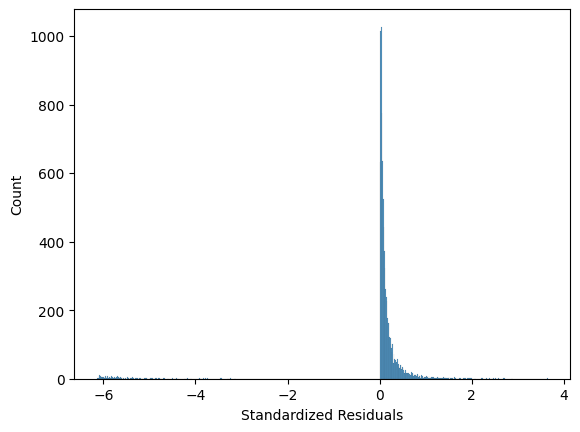

Hosmer-Lemeshow test statistic: -0.00022874921643461878
Hosmer-Lemeshow test p-value: 1.0
----------------------------------------------------

Target variable: AMHTXND2
Optimization terminated successfully.
         Current function value: 0.496694
         Iterations 7
Durbin-Watson: 1.9868437923986795
                          Variables       VIF
0                        TXEVRRCVD2  1.152458
1                             IRSEX  1.740634
2                          ATXMDEYR  4.789061
3                       Chronic_Dis  1.633959
4                  ANYHLTI2_FEATURE  6.898733
5                    HEALTH_FEATURE  6.262905
6                 SEXIDENT_FEATURES  6.355914
7                  IRMARIT_FEATURES  1.699416
8                 NEWRACE2_FEATURES  2.754880
9                   PDEN10_FEATURES  1.782043
10              WRKSTATWK2_FEATURES  3.450551
11                SNRLDCSN_FEATURES  2.266732
12                AGE2_FEATURES_20s  2.199990
13            AGE2_FEATURES_30s,40s  1.294854
14  

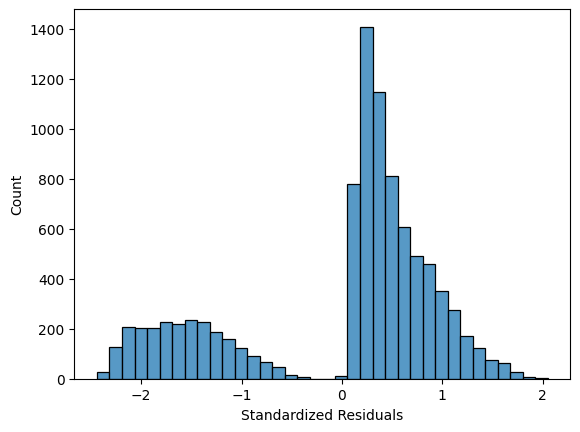

Hosmer-Lemeshow test statistic: -0.0019520876568873415
Hosmer-Lemeshow test p-value: 1.0
----------------------------------------------------

Target variable: AMHOUTP3
Optimization terminated successfully.
         Current function value: 0.439241
         Iterations 7
Durbin-Watson: 1.974730638658772
                          Variables       VIF
0                        TXEVRRCVD2  1.152458
1                             IRSEX  1.740634
2                          ATXMDEYR  4.789061
3                       Chronic_Dis  1.633959
4                  ANYHLTI2_FEATURE  6.898733
5                    HEALTH_FEATURE  6.262905
6                 SEXIDENT_FEATURES  6.355914
7                  IRMARIT_FEATURES  1.699416
8                 NEWRACE2_FEATURES  2.754880
9                   PDEN10_FEATURES  1.782043
10              WRKSTATWK2_FEATURES  3.450551
11                SNRLDCSN_FEATURES  2.266732
12                AGE2_FEATURES_20s  2.199990
13            AGE2_FEATURES_30s,40s  1.294854
14    

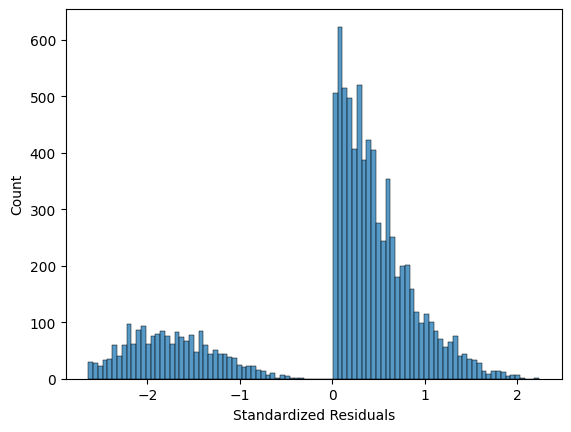

Hosmer-Lemeshow test statistic: -0.004737157172601218
Hosmer-Lemeshow test p-value: 1.0
----------------------------------------------------

Target variable: AMHTXRC3
Optimization terminated successfully.
         Current function value: 0.545466
         Iterations 6
Durbin-Watson: 1.9804121971753035
                          Variables       VIF
0                        TXEVRRCVD2  1.152458
1                             IRSEX  1.740634
2                          ATXMDEYR  4.789061
3                       Chronic_Dis  1.633959
4                  ANYHLTI2_FEATURE  6.898733
5                    HEALTH_FEATURE  6.262905
6                 SEXIDENT_FEATURES  6.355914
7                  IRMARIT_FEATURES  1.699416
8                 NEWRACE2_FEATURES  2.754880
9                   PDEN10_FEATURES  1.782043
10              WRKSTATWK2_FEATURES  3.450551
11                SNRLDCSN_FEATURES  2.266732
12                AGE2_FEATURES_20s  2.199990
13            AGE2_FEATURES_30s,40s  1.294854
14    

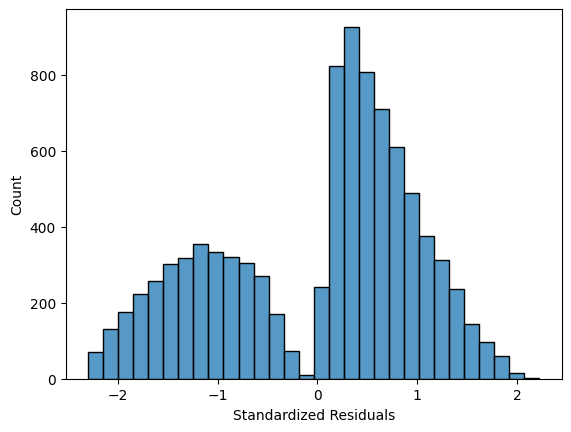

Hosmer-Lemeshow test statistic: -0.022270905083449578
Hosmer-Lemeshow test p-value: 1.0
----------------------------------------------------

Target variable: AMHRX2
Optimization terminated successfully.
         Current function value: 0.502873
         Iterations 6
Durbin-Watson: 1.9982225479792612
                          Variables       VIF
0                        TXEVRRCVD2  1.152458
1                             IRSEX  1.740634
2                          ATXMDEYR  4.789061
3                       Chronic_Dis  1.633959
4                  ANYHLTI2_FEATURE  6.898733
5                    HEALTH_FEATURE  6.262905
6                 SEXIDENT_FEATURES  6.355914
7                  IRMARIT_FEATURES  1.699416
8                 NEWRACE2_FEATURES  2.754880
9                   PDEN10_FEATURES  1.782043
10              WRKSTATWK2_FEATURES  3.450551
11                SNRLDCSN_FEATURES  2.266732
12                AGE2_FEATURES_20s  2.199990
13            AGE2_FEATURES_30s,40s  1.294854
14      

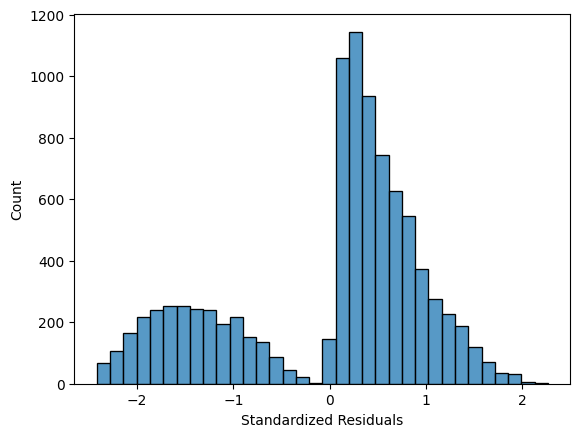

Hosmer-Lemeshow test statistic: -0.0066500676113547055
Hosmer-Lemeshow test p-value: 1.0
----------------------------------------------------


In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from sklearn.model_selection import train_test_split
import copy
X_or = copy.deepcopy(df)
X_or

targets = selected_data[ment_util]
targets = targets.fillna(targets.mode().iloc[0])
targets

# Iterate over each target variable in targets
for target_col in targets.columns:
    print(f"\nTarget variable: {target_col}")

    X = copy.deepcopy(X_or)
    y = targets[target_col] - 1 
    X = X_or
    
    # assuming you have a pandas DataFrame df, with your independent variables and dependent variable
    # where y is your dependent variable and x1, x2, x3, x4 are your independent variables
    
    # Probability values
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=312)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=312, stratify=y_train)
    
    # add a constant to the independent variables
    x_train = sm.add_constant(x_train)
    x_valid = sm.add_constant(x_valid)
    x_test = sm.add_constant(x_test)
    
    # fit the logistic regression model
    model = sm.Logit(y_train, x_train)
    result = model.fit()
    
    # 1. Check if dependent variable is binary/ordinal
    if len(y.unique()) > 2:
        print('Dependent variable is not binary, check if it is ordinal')
        
    # 2. Check independence of observations using Durbin-Watson test
    # Durbin-Watson test values range from 0 to 4. If the value of Durbin-Watson is around 2, 
    # it indicates no autocorrelation whereas a value towards 0 indicates positive autocorrelation, 
    # and towards 4 indicates negative autocorrelation.
    
    durbinWatson = sm.stats.stattools.durbin_watson(result.resid_response)
    print(f'Durbin-Watson: {durbinWatson}')
    
    # 3. Check for multicollinearity using Variance Inflation Factor (VIF)
    # If VIF > 5, then the explanatory variable is highly collinear with the other explanatory variables, 
    # and the parameter estimates will have large standard errors because of this.
    
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif)
    
    # 4. Check linearity of independent variables and log odds
    # Although logistic regression does not require the independent and dependent variables to be related linearly, 
    # it requires that the independent variables are linearly related to the log odds.
    from scipy.stats import chi2
    
    # Create squared features
    x_train_squared = x_train**2
    
    # Add a constant to the squared features
    x_train_squared = sm.add_constant(x_train_squared)
    
    # fit the logistic regression model with squared features
    model_squared = sm.Logit(y_train, x_train_squared)
    result_squared = model_squared.fit()
    
    # Print summary
    print(result_squared.summary())
    
    def likelihood_ratio_test(big_model, small_model):
        return -2 * (small_model.llf - big_model.llf)
    
    LRT = likelihood_ratio_test(result_squared, result)
    
    p = chi2.sf(LRT, df=1)  # LRT is chi2 distributed with 1 degree of freedom
    
    print(f'Likelihood Ratio Test Statistic: {LRT}')
    print(f'Likelihood Ratio Test P-Value: {p}')
    
    
    # 5. Check for outliers
    # Outliers can significantly influence the model and create bias.
    # In Logistic Regression, leverage (Cook's distance) can be used to identify influential cases.
    # Hat matrix
    y_pred_prob = result.predict(x_train)
    residuals = y_train - y_pred_prob
    std_resid = (residuals - np.mean(residuals)) / np.std(residuals)
    sns.histplot(std_resid)
    plt.xlabel('Standardized Residuals')
    plt.show()
    
    # 6. Goodness of fit
    from scipy.stats import chi2
    
    def hosmer_lemeshow_test(y_true, y_pred_prob, group=10):
        df = pd.DataFrame({"y_true": y_true, "y_pred_prob": y_pred_prob})
        df = df.sort_values(by="y_pred_prob")
        df["rank"] = pd.qcut(df["y_pred_prob"], q=group, labels=False)
        
        obs = df.groupby("rank")["y_true"].sum()
        exp = df.groupby("rank")["y_pred_prob"].sum()
        
        hl_test = ((obs - exp) ** 2 / (exp * (1 - exp))).sum()
        
        p_value = 1 - chi2.cdf(hl_test, group - 2)
        
        return hl_test, p_value
    
    y_pred_prob = result.predict(x_train)
    hl_test, p_value = hosmer_lemeshow_test(y_train, y_pred_prob)
    
    print(f'Hosmer-Lemeshow test statistic: {hl_test}')
    print(f'Hosmer-Lemeshow test p-value: {p_value}')
    print('----------------------------------------------------')
    

## Hyperparameter Optimization
In order to improve the performance of our model, we will perform hyperparameter optimization using cross-validation (CV). This technique allows us to systematically search for the best combination of hyperparameters for our model, optimizing its performance on unseen data.

### Dealing with Unbalanced Datasets using Resampling Techniques and Logistic Regression
When dealing with unbalanced datasets, where the number of instances in different classes is significantly unequal, model performance can be adversely affected. The majority class often dominates the prediction, leading to less accurate results for the minority class. To overcome this challenge, various resampling techniques paired with a Logistic Regression classifier can be applied. These resampling methods aim to adjust the class distribution, thereby enhancing the model's predictive accuracy. This guide illustrates how to leverage these techniques on unbalanced datasets, optimizing for the best parameters in each resampling method:

- _RandomUnderSampler_: This technique mitigates imbalance by randomly eliminating instances from the majority class until a more balanced distribution is achieved. It's a fast and easy-to-understand method but has a risk of discarding potentially important data.

- _RandomOverSampler_: This technique creates copies of instances from the minority class to balance the class distribution. While this approach is straightforward and can boost performance for the minority class, it may lead to overfitting due to duplicate instances.

- _SMOTE (Synthetic Minority Over-sampling Technique)_: Unlike simple oversampling, SMOTE generates synthetic examples from the minority class. It operates by selecting instances that are close in the feature space, drawing a line between the instances in the feature space and drawing a new sample at a point along that line. Consequently, it mitigates the overfitting problem, making the classifier more robust.

- _ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning)_: ADASYN is a similar approach to SMOTE but focuses on generating samples next to the original samples which are wrongly classified using a K-Nearest Neighbors classifier. It promotes better learning from the misclassified instances, thus making the decision boundary more reliable.

- _SMOTETomek (SMOTE + Tomek Links)_: This technique combines the synthetic oversampling method (SMOTE) with Tomek Links undersampling. Tomek links are pairs of instances of opposite classes who are each other's nearest neighbors. Removing these instances helps in making the decision boundary less noisy.

In the following code, we first define the resampling methods along with their parameters. Next, we standardize the features and split the data into training and testing sets. We then initialize a pipeline and perform a grid search to find the best parameters for each resampling method. After finding the optimal parameters, we train our model using these and evaluate its performance using accuracy, AUC (Area Under the Receiver Operating Characteristics Curve), and F1 score. The process is repeated for each target variable, and the best results are stored in a DataFrame for comparison.

In [29]:
import copy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, make_scorer
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek

# Create a list of all resampling methods with the corresponding parameters
resampling_methods = [
    (RandomUnderSampler(random_state=42), {
        'sampling_strategy': ['majority', 'not minority', 'not majority', 'all', 'auto'],
        'replacement': [True, False],
    }),
    (RandomOverSampler(random_state=42), {
        'sampling_strategy': ['minority', 'not majority', 'not minority', 'all', 'auto'],
    }),
    (SMOTE(random_state=42), {
        'k_neighbors': [3, 5, 7, 9],
        'sampling_strategy': ['minority', 'not majority', 'not minority', 'all', 'auto'],
    }),
    (ADASYN(random_state=42), {
        'n_neighbors': [3, 5, 7, 9],
        'sampling_strategy': ['minority', 'not majority', 'not minority', 'all', 'auto'],
    }),
    (SMOTETomek(random_state=42), {
        'smote': [SMOTE(k_neighbors=k) for k in [3, 5, 7, 9]],
    }),
]

# Define the classifier parameters
clf_params = {
    'clf__C': [0.1, 1, 10]
}

# Initialize the classifier
clf = LogisticRegression()

# Create a dataframe to store the best results
best_results = pd.DataFrame(columns=['Target', 'Method', 'Best_Parameters', 'Accuracy', 'AUC', 'F1'])

# Iterate over each target variable in targets
for target_col in targets.columns:
    print(f"\nTarget variable: {target_col}")

    # Prepare the features and the target
    X = copy.deepcopy(df)
    y = targets[target_col] - 1  # Subtract 1 to make it 0 and 1

    # Standardize the features
    sc = StandardScaler()
    X = sc.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the best score and method
    best_score = 0
    best_method = None
    best_params = None

   # Loop through each resampling method and perform grid search
    for sampler, sampler_params in resampling_methods:
        # Create the pipeline
        pipeline = Pipeline([('sampler', sampler), ('clf', clf)])
    
        # Prefix sampler parameters with 'sampler__'
        prefixed_sampler_params = {f"sampler__{key}": value for key, value in sampler_params.items()}
    
        # Create the parameter grid
        param_grid = {**prefixed_sampler_params, **clf_params}
        scorer = make_scorer(f1_score)
    
        # Perform grid search
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scorer)
        grid_search.fit(X_train, y_train)
    
        # Get the best score
        score = grid_search.best_score_
    
        # Update the best score and method if the current score is better
        if score > best_score:
            best_score = score
            best_method = sampler.__class__.__name__
            best_params = grid_search.best_params_
    
            # Perform prediction using the best method
            pipeline.set_params(**best_params)
            pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Add to the best results
    best_results = pd.concat([best_results, pd.DataFrame([{
        'Target': target_col,
        'Method': best_method,
        'Best_Parameters': best_params,
        'Accuracy': accuracy,
        'AUC': auc,
        'F1': f1
    }])], ignore_index=True)

# Print the best results
best_results


Target variable: AMHINP2

Target variable: AMHTXND2

Target variable: AMHOUTP3

Target variable: AMHTXRC3

Target variable: AMHRX2


Target              Method   
0   AMHINP2  RandomUnderSampler  \
1  AMHTXND2  RandomUnderSampler   
2  AMHOUTP3  RandomUnderSampler   
3  AMHTXRC3  RandomUnderSampler   
4    AMHRX2  RandomUnderSampler   

                                     Best_Parameters  Accuracy       AUC   
0  {'clf__C': 0.1, 'sampler__replacement': True, ...  0.968248  0.505435  \
1  {'clf__C': 0.1, 'sampler__replacement': False,...  0.757502  0.583941   
2  {'clf__C': 0.1, 'sampler__replacement': True, ...  0.779833  0.567036   
3  {'clf__C': 0.1, 'sampler__replacement': False,...  0.721912  0.679022   
4  {'clf__C': 0.1, 'sampler__replacement': False,...  0.744592  0.623128   

         F1  
0  0.983862  
1  0.852222  
2  0.870405  
3  0.792718  
4  0.835284

### Logistic Regression optimization
In order to verify the best perfomance of our model, we have conducted a Cross validation trying various parameters and solvers for our Logistic Regression, however due to very wide variety of parameters, to not make this code very computationally intensive, we decided to use RandomizedSearch which still capable of finding better parameters within shorter time period.

Here's an explanation of the solvers used in Logistic Regression and their respective characteristics:

- _newton-cg_: This solver uses the Newton conjugate gradient method to optimize the logistic regression objective function. It is suitable for both small and large datasets and supports L2 regularization.

- _lbfgs_: The Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS) algorithm is employed by this solver. It approximates the inverse Hessian matrix to perform optimization. Similar to newton-cg, it supports L2 regularization and works well with large datasets.

- _liblinear_: This solver utilizes a coordinate descent algorithm known as LIBLINEAR. It is optimized for handling L1-regularized logistic regression and L2-regularized logistic regression with a small number of samples. It supports both L1 and L2 regularization and is efficient for handling high-dimensional datasets.

- _sag_: Stochastic Average Gradient (SAG) is a solver that employs a stochastic average gradient descent algorithm. It is efficient for large-scale problems and is particularly useful when the number of samples is significantly larger than the number of features. It supports L2 regularization.

- _saga_: This solver is an extension of the SAG algorithm and provides support for both L1 and L2 regularization. It also supports elastic-net penalty ('elasticnet'), which combines both L1 and L2 regularization. Similar to SAG, it is designed for large-scale problems and performs well when the number of samples is much larger than the number of features.

Here's an explanation of the parameters used in the cross-validation for Logistic Regression:

- _C_: This parameter represents the inverse of the regularization strength. Smaller values of C indicate stronger regularization, while larger values indicate weaker regularization. The values provided in the parameter grid ([0.001, 0.01, 0.1, 1, 10, 100, 1000]) cover a range of regularization strengths for each solver.

- _max_iter_: It specifies the maximum number of iterations for the solver to converge. The parameter grid list(range(10, 1001, 10)) provides a range of values to test.

- _penalty_: This parameter determines the type of regularization penalty to apply. It can take values such as 'l1', 'l2', 'elasticnet', or 'none'. 'l1' and 'l2' correspond to L1 and L2 regularization, respectively. 'elasticnet' combines both L1 and L2 regularization. 'none' means no regularization. The available options are different for each solver.

- _class_weight_: It controls the weights associated with each class in case of imbalanced data. The parameter grid includes options [None, 'balanced']. 'balanced' automatically adjusts the weights inversely proportional to the class frequencies in the input data.

- _fit_intercept_: This parameter determines whether to include an intercept term in the logistic regression model. It can be either True or False.

- _warm_start_: It allows warm starting the optimization by reusing the previous solution as the initial value for the next set of parameters. The options provided are [True, False].

- _l1_ratio_: This parameter is specific to the 'saga' solver when using 'elasticnet' penalty. It controls the mix of L1 and L2 regularization. The values in the parameter grid [i * 0.1 for i in range(0, 11)] cover a range from 0.0 to 1.0 in increments of 0.1.

In [30]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters for tuning for Logistic Regression for each solver
param_grids = {
    'newton-cg': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'max_iter': list(range(10, 1001, 10)),
        'penalty': ['l2', 'none'],
        'class_weight': [None, 'balanced'],
        'fit_intercept': [True, False],
        'warm_start': [True, False]
    },
    'lbfgs': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'max_iter': list(range(10, 1001, 10)),
        'penalty': ['l2', 'none'],
        'class_weight': [None, 'balanced'],
        'fit_intercept': [True, False],
        'warm_start': [True, False]
    },
    'liblinear': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'max_iter': list(range(10, 1001, 10)),
        'penalty': ['l1', 'l2'],
        'class_weight': [None, 'balanced'],
        'fit_intercept': [True, False],
        'warm_start': [True, False]
    },
    'sag': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'max_iter': list(range(10, 1001, 10)),
        'penalty': ['l2', 'none'],
        'class_weight': [None, 'balanced'],
        'fit_intercept': [True, False],
        'warm_start': [True, False]
    },
    'saga': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'max_iter': list(range(10, 1001, 10)),
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'class_weight': [None, 'balanced'],
        'fit_intercept': [True, False],
        'l1_ratio': [i * 0.1 for i in range(0, 11)],  # Only used if penalty = 'elasticnet'
        'warm_start': [True, False]
    },
}

best_models_cv = {}

# Iterate over each target variable in targets
for target_col in targets.columns:
    print# Continue the code
    print(f"\nTarget variable: {target_col}")

    X = copy.deepcopy(X_or)
    Y = targets[target_col] - 1  # Subtract 1 to make it 0 and 1

    # Standard scaler
    sc = StandardScaler()
    
    # Define the undersampling method
    undersampler = RandomUnderSampler(replacement = False, sampling_strategy = 'not majority')
    
    # Split data
    y = Y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize features
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Apply SMOTE
    X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

    best_score = 0
    best_params = None
    best_solver = None

    # Iterate over each solver
    for solver, param_grid in param_grids.items():
        print(f"Testing solver: {solver}")
        
        # Instantiate the model with the current solver
        model = LogisticRegression(solver=solver)

        # Define RandomizedSearchCV
        randomized = RandomizedSearchCV(model, param_grid, cv=5, scoring=make_scorer(accuracy_score), n_jobs=-1, n_iter=100)
        
        # Fit and find the best parameters
        randomized.fit(X_train_res, y_train_res)
        
        print("Best parameters for Logistic Regression with solver", solver, " : ", randomized.best_params_)
        print("Best score for Logistic Regression with solver", solver, " : ", randomized.best_score_)

        # Keep track of the best model
        if randomized.best_score_ > best_score:
            best_score = randomized.best_score_
            best_params = randomized.best_params_
            best_solver = solver
    
    # Store the best model for the current target
    best_models_cv[target_col] = (best_solver, best_params)

# Print the best models for each target after CV
print('----------------------------------------')
for target, model_info in best_models_cv.items():
    print(f"Best model for {target} is Logistic Regression with solver {model_info[0]} and parameters {model_info[1]}")



Target variable: AMHINP2
Testing solver: newton-cg
Best parameters for Logistic Regression with solver newton-cg  :  {'warm_start': False, 'penalty': 'l2', 'max_iter': 90, 'fit_intercept': True, 'class_weight': None, 'C': 0.01}
Best score for Logistic Regression with solver newton-cg  :  0.9707678883071553
Testing solver: lbfgs


C:\Users\BlownSugar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Best parameters for Logistic Regression with solver lbfgs  :  {'warm_start': True, 'penalty': 'none', 'max_iter': 360, 'fit_intercept': True, 'class_weight': None, 'C': 1000}
Best score for Logistic Regression with solver lbfgs  :  0.9706806282722512
Testing solver: liblinear
Best parameters for Logistic Regression with solver liblinear  :  {'warm_start': False, 'penalty': 'l2', 'max_iter': 360, 'fit_intercept': True, 'class_weight': None, 'C': 0.01}
Best score for Logistic Regression with solver liblinear  :  0.9707678883071553
Testing solver: sag
Best parameters for Logistic Regression with solver sag  :  {'warm_start': False, 'penalty': 'l2', 'max_iter': 150, 'fit_intercept': True, 'class_weight': None, 'C': 0.001}
Best score for Logistic Regression with solver sag  :  0.9707678883071553
Testing solver: saga


C:\Users\BlownSugar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Best parameters for Logistic Regression with solver saga  :  {'warm_start': True, 'penalty': 'l2', 'max_iter': 120, 'l1_ratio': 1.0, 'fit_intercept': True, 'class_weight': None, 'C': 0.01}
Best score for Logistic Regression with solver saga  :  0.9707678883071553

Target variable: AMHTXND2
Testing solver: newton-cg
Best parameters for Logistic Regression with solver newton-cg  :  {'warm_start': False, 'penalty': 'l2', 'max_iter': 380, 'fit_intercept': True, 'class_weight': None, 'C': 1}
Best score for Logistic Regression with solver newton-cg  :  0.7579406631762653
Testing solver: lbfgs


C:\Users\BlownSugar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Best parameters for Logistic Regression with solver lbfgs  :  {'warm_start': True, 'penalty': 'none', 'max_iter': 750, 'fit_intercept': True, 'class_weight': None, 'C': 0.01}
Best score for Logistic Regression with solver lbfgs  :  0.7579406631762653
Testing solver: liblinear
Best parameters for Logistic Regression with solver liblinear  :  {'warm_start': True, 'penalty': 'l2', 'max_iter': 40, 'fit_intercept': True, 'class_weight': None, 'C': 0.1}
Best score for Logistic Regression with solver liblinear  :  0.7582024432809773
Testing solver: sag
Best parameters for Logistic Regression with solver sag  :  {'warm_start': False, 'penalty': 'l2', 'max_iter': 680, 'fit_intercept': True, 'class_weight': None, 'C': 100}
Best score for Logistic Regression with solver sag  :  0.7579406631762653
Testing solver: saga


C:\Users\BlownSugar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\BlownSugar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Best parameters for Logistic Regression with solver saga  :  {'warm_start': True, 'penalty': 'none', 'max_iter': 680, 'l1_ratio': 0.7000000000000001, 'fit_intercept': True, 'class_weight': None, 'C': 1000}
Best score for Logistic Regression with solver saga  :  0.7579406631762653

Target variable: AMHOUTP3
Testing solver: newton-cg
Best parameters for Logistic Regression with solver newton-cg  :  {'warm_start': True, 'penalty': 'l2', 'max_iter': 450, 'fit_intercept': True, 'class_weight': None, 'C': 0.1}
Best score for Logistic Regression with solver newton-cg  :  0.794589877835951
Testing solver: lbfgs
Best parameters for Logistic Regression with solver lbfgs  :  {'warm_start': False, 'penalty': 'l2', 'max_iter': 670, 'fit_intercept': True, 'class_weight': None, 'C': 0.1}
Best score for Logistic Regression with solver lbfgs  :  0.794589877835951
Testing solver: liblinear
Best parameters for Logistic Regression with solver liblinear  :  {'warm_start': True, 'penalty': 'l1', 'max_iter':

C:\Users\BlownSugar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


## Models evaluation and Results interpretation
Now, as our models and methods are optimized, we can proceed with evaluation of each model and interpret the results.

### AMHTXRC3:  Wheter respondent have received any mental health treatment in the past year.


Target variable: AMHTXRC3
Accuracy: 0.7152826238660154
Precision: 0.7417153996101364
Recall: 0.8418141592920354
F1 Score: 0.78860103626943
ROC AUC Score: 0.7658654771065794


C:\Users\BlownSugar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\BlownSugar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


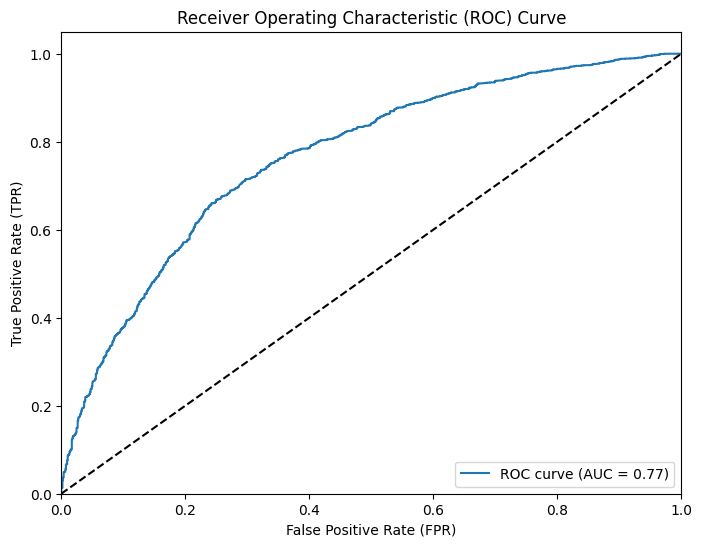

                            Feature  Coefficient  abs_coefficient
2                          ATXMDEYR    -1.580250         1.580250
23       WSPDSC2_FEATURES_Low Level     1.574725         1.574725
4                  ANYHLTI2_FEATURE    -0.758022         0.758022
8                 NEWRACE2_FEATURES    -0.728188         0.728188
0                        TXEVRRCVD2    -0.705307         0.705307
24  WSPDSC2_FEATURES_Moderate Level     0.668717         0.668717
1                             IRSEX     0.665982         0.665982
3                       Chronic_Dis    -0.536997         0.536997
5                    HEALTH_FEATURE     0.490792         0.490792
16                     EDUHIGHCAT_1     0.453743         0.453743
6                 SEXIDENT_FEATURES     0.366608         0.366608
15                AGE2_FEATURES_60+     0.352999         0.352999
14            AGE2_FEATURES_50s,60s    -0.332097         0.332097
18                     EDUHIGHCAT_4    -0.311789         0.311789
10        

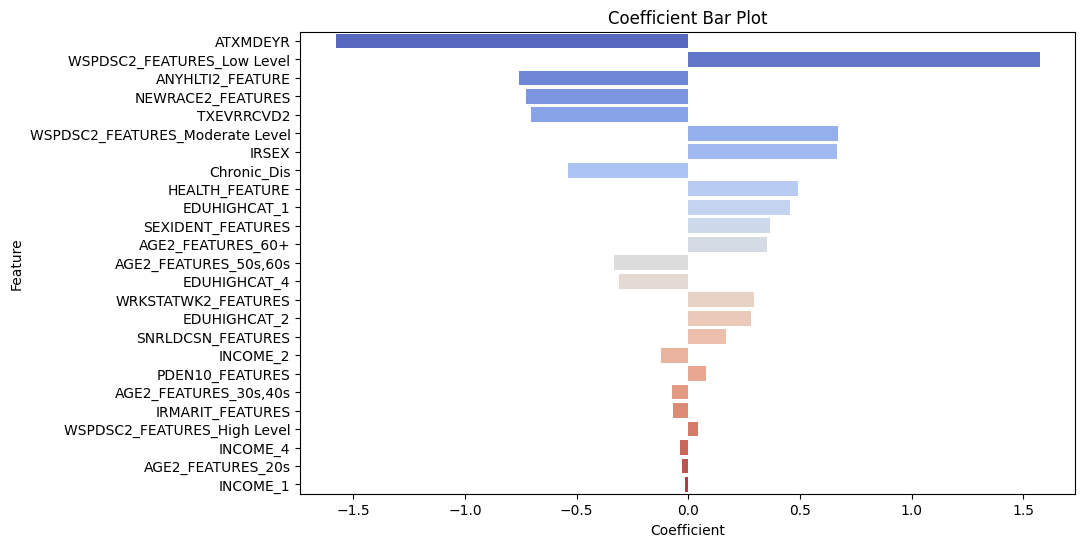

Interpreting the results:
Feature 'ATXMDEYR' has a negatively influence (coefficient: -1.58)
Feature 'WSPDSC2_FEATURES_Low Level' has a positively influence (coefficient: 1.57)
Feature 'ANYHLTI2_FEATURE' has a negatively influence (coefficient: -0.76)
Feature 'NEWRACE2_FEATURES' has a negatively influence (coefficient: -0.73)
Feature 'TXEVRRCVD2' has a negatively influence (coefficient: -0.71)
Feature 'WSPDSC2_FEATURES_Moderate Level' has a positively influence (coefficient: 0.67)
Feature 'IRSEX' has a positively influence (coefficient: 0.67)
Feature 'Chronic_Dis' has a negatively influence (coefficient: -0.54)
Feature 'HEALTH_FEATURE' has a positively influence (coefficient: 0.49)
Feature 'EDUHIGHCAT_1' has a positively influence (coefficient: 0.45)
Feature 'SEXIDENT_FEATURES' has a positively influence (coefficient: 0.37)
Feature 'AGE2_FEATURES_60+' has a positively influence (coefficient: 0.35)
Feature 'AGE2_FEATURES_50s,60s' has a negatively influence (coefficient: -0.33)
Feature '

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


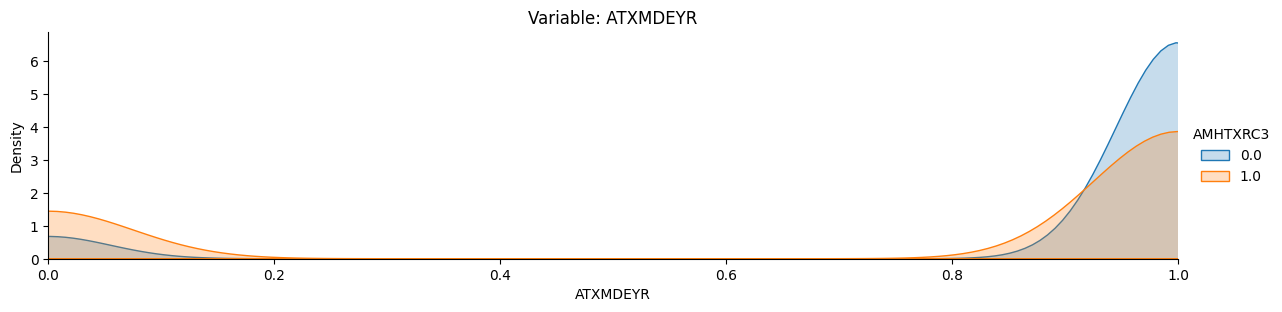

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


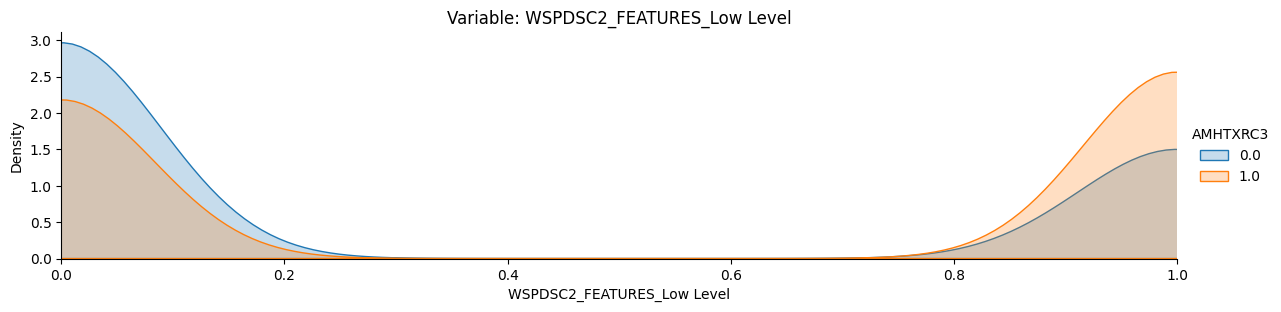

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


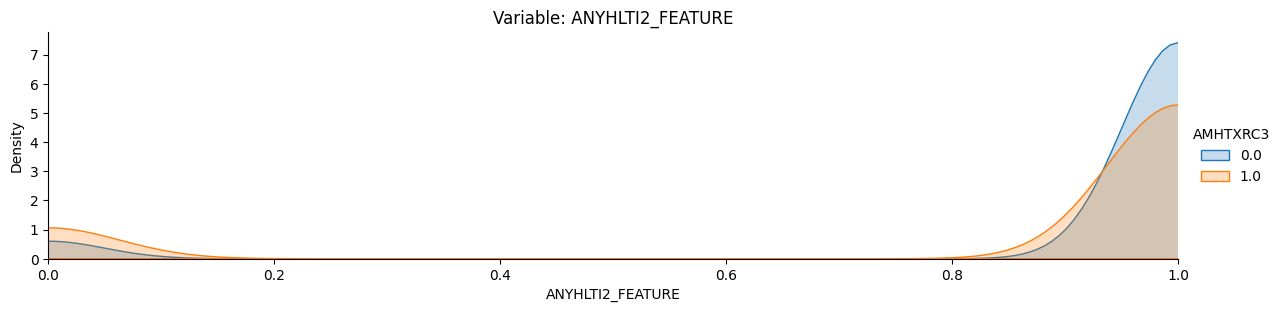

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


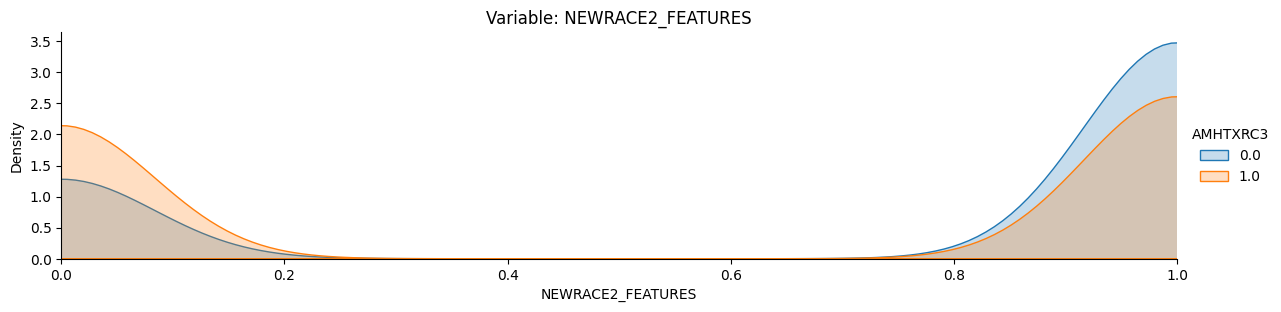

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


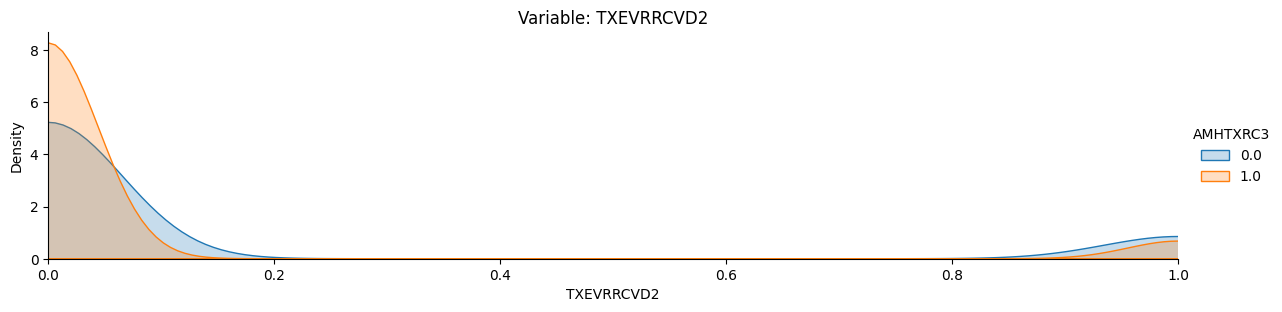

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

print(f"\nTarget variable: {'AMHTXRC3'}")

X = copy.deepcopy(X_or)
y = targets['AMHTXRC3'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the undersampling method
undersampler = RandomUnderSampler(replacement = False, sampling_strategy = 'not majority')

# Apply resampling to the training data only
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

model = LogisticRegression(solver='sag', warm_start=True, penalty='none',
                           max_iter=10, fit_intercept=True, class_weight=None, C=0.001)


# Then, train your model using the resampled training data
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba[:, 1])}")

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

# Calculate area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_proba[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Interpret the results
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to store the coefficients and feature names
summary_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of the coefficients
summary_df['abs_coefficient'] = summary_df['Coefficient'].abs()
summary_df = summary_df.sort_values('abs_coefficient', ascending=False)

# Print the sorted summary
print(summary_df)

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Coefficient Bar Plot")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

# Interpret the results
print("Interpreting the results:")
for index, row in summary_df.iterrows():
    feature_name = row['Feature']
    coefficient = row['Coefficient']
    
    if coefficient > 0:
        influence = "positively"
    else:
        influence = "negatively"
        
    print(f"Feature '{feature_name}' has a {influence} influence (coefficient: {coefficient:.2f})")

    
# Concatenate X_train_resampled and y_train_resampled
train_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name="AMHTXRC3")], axis=1)

# Select the top 5 significant variables
top_5_variables = summary_df['Feature'].head(5)

# Iterate over the top 5 variables and create individual plots
for variable in top_5_variables:
    # Filter the data for the current variable
    variable_data = X[variable]
    
    # Create a facet grid plot
    facet = sns.FacetGrid(data=train_data, hue="AMHTXRC3", aspect=4)
    facet.map(sns.kdeplot, variable, shade=True)
    facet.set(xlim=(variable_data.min(), variable_data.max()))
    facet.add_legend()
    sns.axes_style("darkgrid")
    
    plt.title(f"Variable: {variable}")
    plt.show()




### AMHINP2: Wheter respondent have received inpatient mental health treatment in the past year.


Target variable: AMHINP2
Accuracy: 0.9678995115143056
Precision: 0.9678995115143056
Recall: 1.0
F1 Score: 0.9836879432624114
ROC AUC Score: 0.7905786652456036


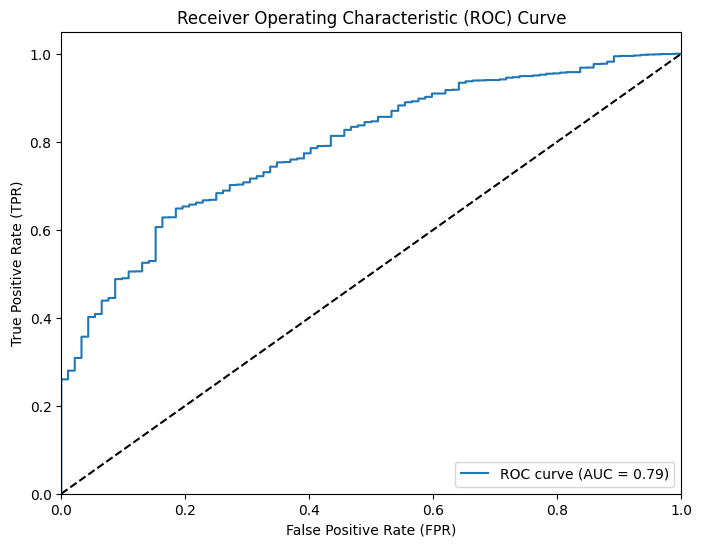

                            Feature  Coefficient  abs_coefficient
23       WSPDSC2_FEATURES_Low Level     0.091691         0.091691
10              WRKSTATWK2_FEATURES     0.060212         0.060212
19                         INCOME_1    -0.053519         0.053519
0                        TXEVRRCVD2    -0.048551         0.048551
5                    HEALTH_FEATURE     0.047707         0.047707
6                 SEXIDENT_FEATURES     0.044123         0.044123
18                     EDUHIGHCAT_4     0.042208         0.042208
3                       Chronic_Dis    -0.036339         0.036339
2                          ATXMDEYR    -0.035475         0.035475
16                     EDUHIGHCAT_1    -0.034143         0.034143
7                  IRMARIT_FEATURES     0.033737         0.033737
22      WSPDSC2_FEATURES_High Level    -0.033464         0.033464
21                         INCOME_4     0.032763         0.032763
20                         INCOME_2     0.019995         0.019995
11        

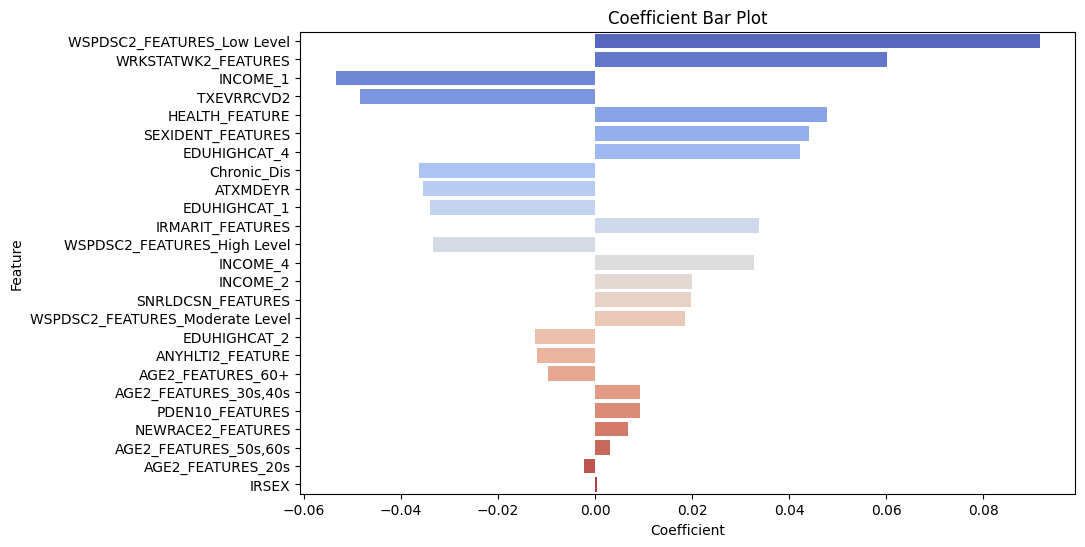

Interpreting the results:
Feature 'WSPDSC2_FEATURES_Low Level' has a positively influence (coefficient: 0.09)
Feature 'WRKSTATWK2_FEATURES' has a positively influence (coefficient: 0.06)
Feature 'INCOME_1' has a negatively influence (coefficient: -0.05)
Feature 'TXEVRRCVD2' has a negatively influence (coefficient: -0.05)
Feature 'HEALTH_FEATURE' has a positively influence (coefficient: 0.05)
Feature 'SEXIDENT_FEATURES' has a positively influence (coefficient: 0.04)
Feature 'EDUHIGHCAT_4' has a positively influence (coefficient: 0.04)
Feature 'Chronic_Dis' has a negatively influence (coefficient: -0.04)
Feature 'ATXMDEYR' has a negatively influence (coefficient: -0.04)
Feature 'EDUHIGHCAT_1' has a negatively influence (coefficient: -0.03)
Feature 'IRMARIT_FEATURES' has a positively influence (coefficient: 0.03)
Feature 'WSPDSC2_FEATURES_High Level' has a negatively influence (coefficient: -0.03)
Feature 'INCOME_4' has a positively influence (coefficient: 0.03)
Feature 'INCOME_2' has a p

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


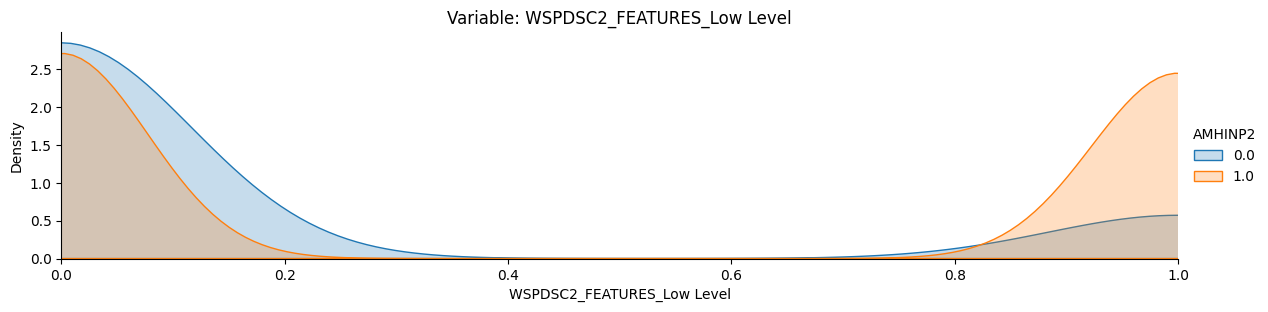

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


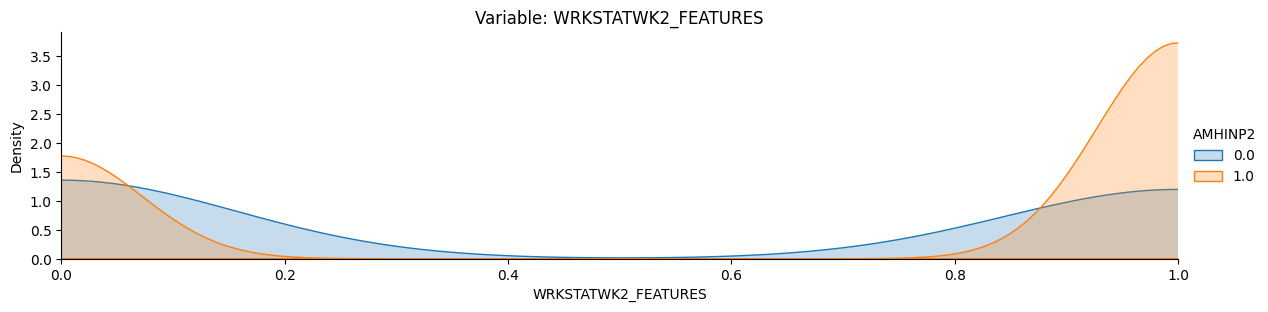

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


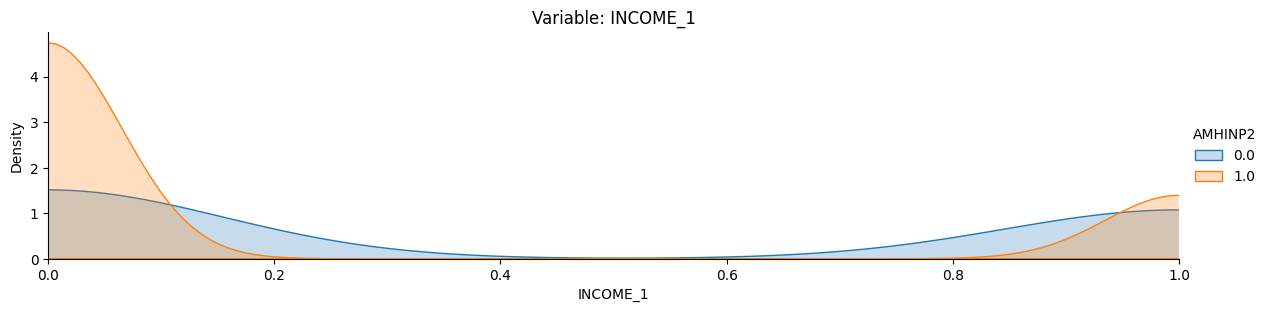

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


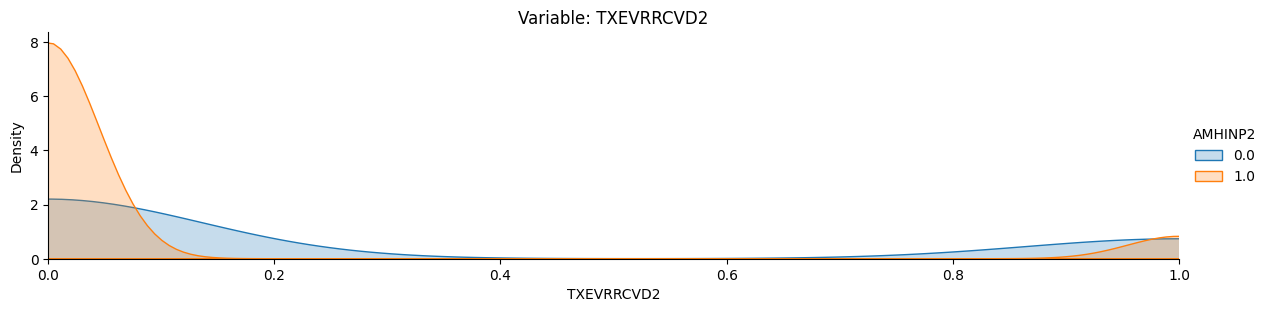

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


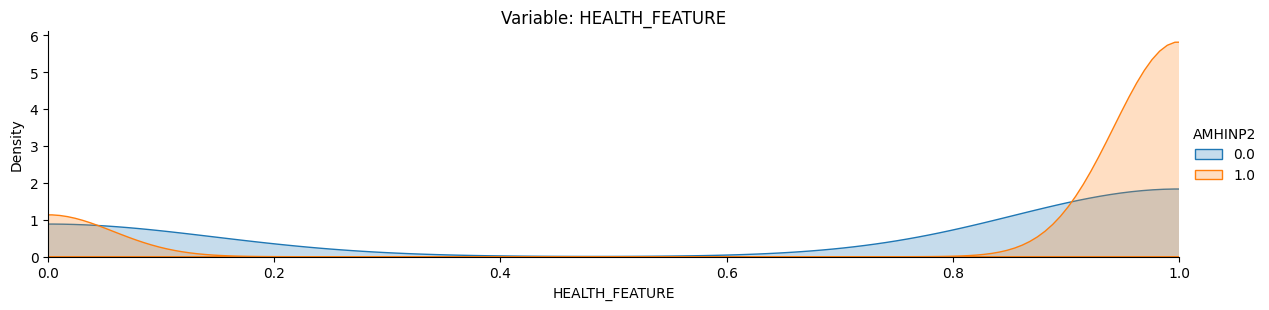

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import copy
import seaborn as sns
import matplotlib.pyplot as plt

print(f"\nTarget variable: {'AMHINP2'}")

X = copy.deepcopy(X_or)
y = targets['AMHINP2'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the undersampling method
undersampler = RandomUnderSampler(replacement = True, sampling_strategy = 'not majority')

# Apply resampling to the training data only
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

model = LogisticRegression(solver='newton-cg', warm_start=False, penalty='l2',
                           max_iter=630, fit_intercept=True, class_weight=None, C=0.001)

# Then, train your model using the resampled training data
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba[:, 1])}")

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

# Calculate area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_proba[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Interpret the results
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to store the coefficients and feature names
summary_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of the coefficients
summary_df['abs_coefficient'] = summary_df['Coefficient'].abs()
summary_df = summary_df.sort_values('abs_coefficient', ascending=False)

# Print the sorted summary
print(summary_df)

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Coefficient Bar Plot")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

# Interpret the results
print("Interpreting the results:")
for index, row in summary_df.iterrows():
    feature_name = row['Feature']
    coefficient = row['Coefficient']
    
    if coefficient > 0:
        influence = "positively"
    else:
        influence = "negatively"
        
    print(f"Feature '{feature_name}' has a {influence} influence (coefficient: {coefficient:.2f})")

# Concatenate X_train_resampled and y_train_resampled
train_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name="AMHINP2")], axis=1)

# Select the top 5 significant variables
top_5_variables = summary_df['Feature'].head(5)

# Iterate over the top 5 variables and create individual plots
for variable in top_5_variables:
    # Filter the data for the current variable
    variable_data = X[variable]
    
    # Create a facet grid plot
    facet = sns.FacetGrid(data=train_data, hue="AMHINP2", aspect=4)
    facet.map(sns.kdeplot, variable, shade=True)
    facet.set(xlim=(variable_data.min(), variable_data.max()))
    facet.add_legend()
    sns.axes_style("darkgrid")
    
    plt.title(f"Variable: {variable}")
    plt.show()

### AMHOUTP3: Wheter respondent have received outpatient mental health treatment in the past year


Target variable: AMHOUTP3
Accuracy: 0.7791346824842986
Precision: 0.7966355140186916
Recall: 0.9599099099099099
F1 Score: 0.8706843718079673
ROC AUC Score: 0.7715135414051821


C:\Users\BlownSugar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


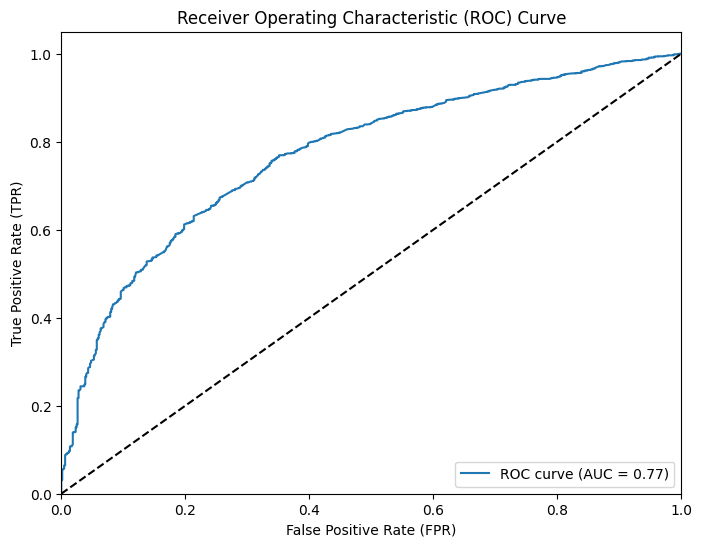

                            Feature  Coefficient  abs_coefficient
2                          ATXMDEYR    -1.972501         1.972501
23       WSPDSC2_FEATURES_Low Level     1.446767         1.446767
24  WSPDSC2_FEATURES_Moderate Level     0.601249         0.601249
4                  ANYHLTI2_FEATURE    -0.482732         0.482732
8                 NEWRACE2_FEATURES    -0.458315         0.458315
3                       Chronic_Dis    -0.447754         0.447754
0                        TXEVRRCVD2    -0.425035         0.425035
16                     EDUHIGHCAT_1     0.416324         0.416324
6                 SEXIDENT_FEATURES     0.368256         0.368256
1                             IRSEX     0.358434         0.358434
17                     EDUHIGHCAT_2     0.352207         0.352207
18                     EDUHIGHCAT_4    -0.344853         0.344853
5                    HEALTH_FEATURE     0.211104         0.211104
10              WRKSTATWK2_FEATURES     0.129537         0.129537
21        

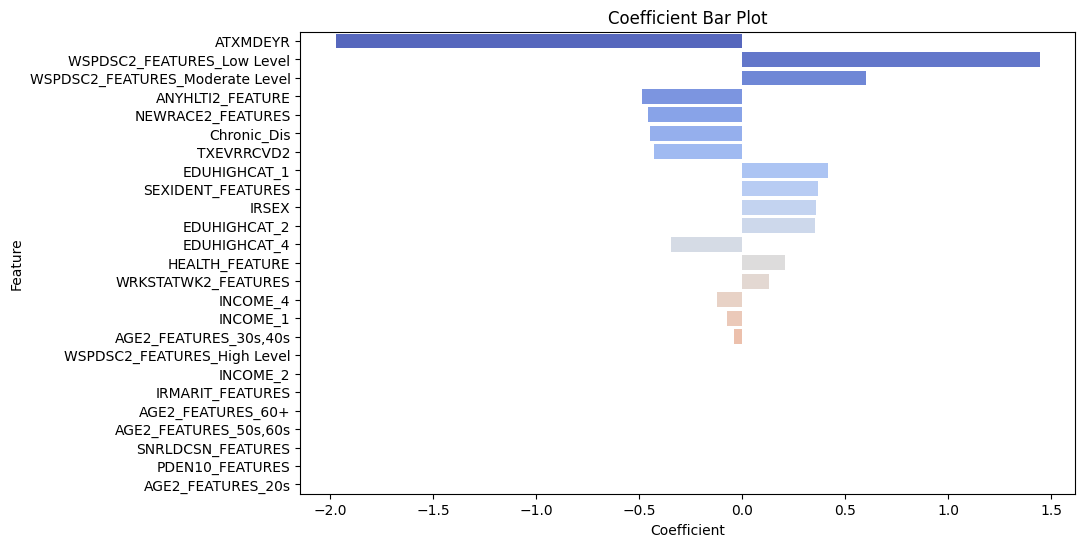

Interpreting the results:
Feature 'ATXMDEYR' has a negatively influence (coefficient: -1.97)
Feature 'WSPDSC2_FEATURES_Low Level' has a positively influence (coefficient: 1.45)
Feature 'WSPDSC2_FEATURES_Moderate Level' has a positively influence (coefficient: 0.60)
Feature 'ANYHLTI2_FEATURE' has a negatively influence (coefficient: -0.48)
Feature 'NEWRACE2_FEATURES' has a negatively influence (coefficient: -0.46)
Feature 'Chronic_Dis' has a negatively influence (coefficient: -0.45)
Feature 'TXEVRRCVD2' has a negatively influence (coefficient: -0.43)
Feature 'EDUHIGHCAT_1' has a positively influence (coefficient: 0.42)
Feature 'SEXIDENT_FEATURES' has a positively influence (coefficient: 0.37)
Feature 'IRSEX' has a positively influence (coefficient: 0.36)
Feature 'EDUHIGHCAT_2' has a positively influence (coefficient: 0.35)
Feature 'EDUHIGHCAT_4' has a negatively influence (coefficient: -0.34)
Feature 'HEALTH_FEATURE' has a positively influence (coefficient: 0.21)
Feature 'WRKSTATWK2_FEA

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


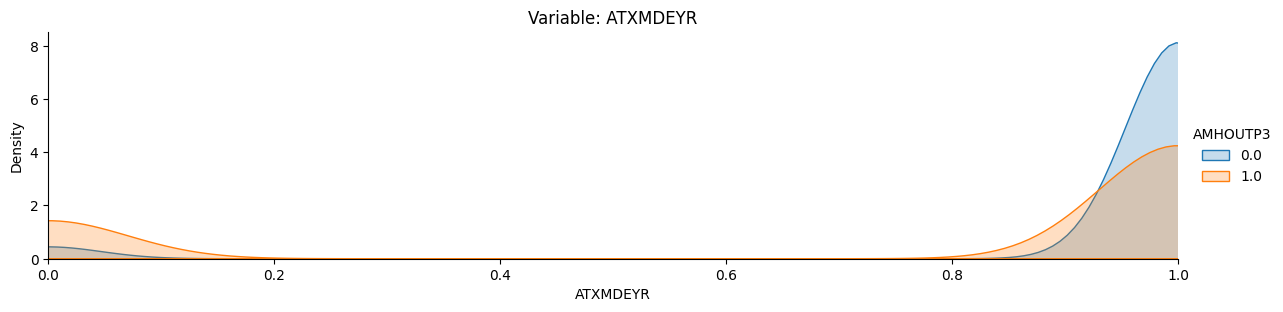

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


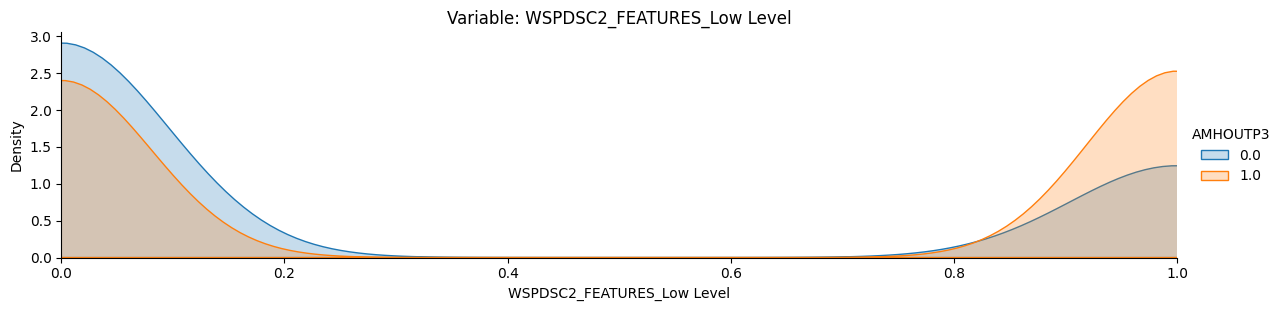

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


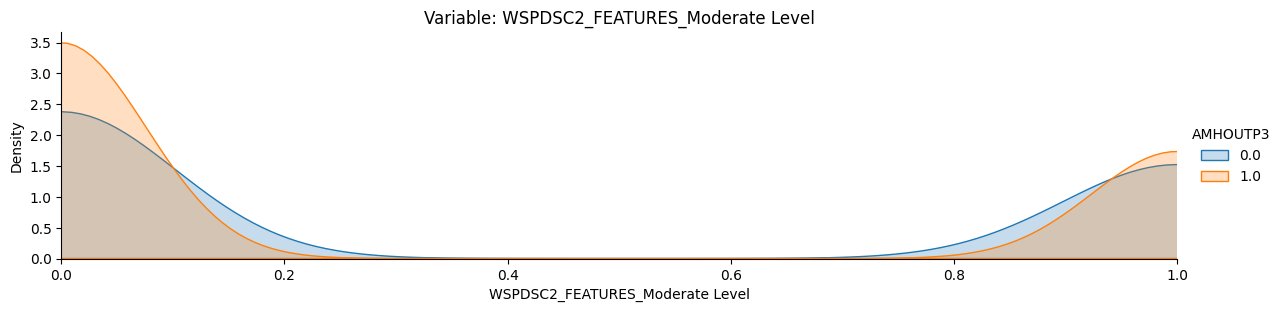

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


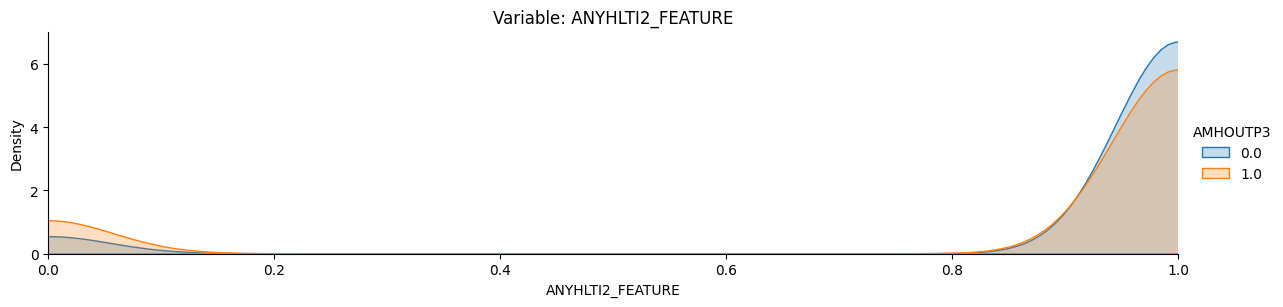

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


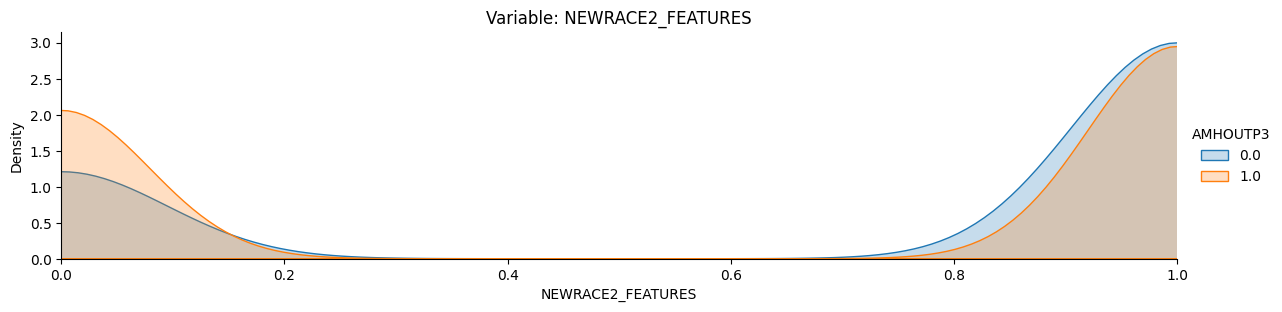

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import copy
import seaborn as sns
import matplotlib.pyplot as plt

print(f"\nTarget variable: {'AMHOUTP3'}")

X = copy.deepcopy(X_or)
y = targets['AMHOUTP3'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the undersampling method
undersampler = RandomUnderSampler(replacement = True, sampling_strategy = 'not majority')

# Apply resampling to the training data only
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

model = LogisticRegression(solver='saga', warm_start=True, penalty='l1',
                           max_iter=860, l1_ratio=0.2, fit_intercept=True, class_weight=None, C=0.1)

# Then, train your model using the resampled training data
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba[:, 1])}")

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

# Calculate area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_proba[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Interpret the results
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to store the coefficients and feature names
summary_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of the coefficients
summary_df['abs_coefficient'] = summary_df['Coefficient'].abs()
summary_df = summary_df.sort_values('abs_coefficient', ascending=False)

# Print the sorted summary
print(summary_df)

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Coefficient Bar Plot")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

# Interpret the results
print("Interpreting the results:")
for index, row in summary_df.iterrows():
    feature_name = row['Feature']
    coefficient = row['Coefficient']
    
    if coefficient > 0:
        influence = "positively"
    else:
        influence = "negatively"
        
    print(f"Feature '{feature_name}' has a {influence} influence (coefficient: {coefficient:.2f})")

# Concatenate X_train_resampled and y_train_resampled
train_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name="AMHOUTP3")], axis=1)

# Select the top 5 significant variables
top_5_variables = summary_df['Feature'].head(5)

# Iterate over the top 5 variables and create individual plots
for variable in top_5_variables:
    # Filter the data for the current variable
    variable_data = X[variable]
    
    # Create a facet grid plot
    facet = sns.FacetGrid(data=train_data, hue="AMHOUTP3", aspect=4)
    facet.map(sns.kdeplot, variable, shade=True)
    facet.set(xlim=(variable_data.min(), variable_data.max()))
    facet.add_legend()
    sns.axes_style("darkgrid")
    
    plt.title(f"Variable: {variable}")
    plt.show()

### AMHRX2: Whether respondent  have received prescribed medication for mental health treatment in the past year.


Target variable: AMHRX2
Accuracy: 0.7452896022330775
Precision: 0.757551981169086
Recall: 0.9451786588350465
F1 Score: 0.8410278745644599
ROC AUC Score: 0.748823442998616


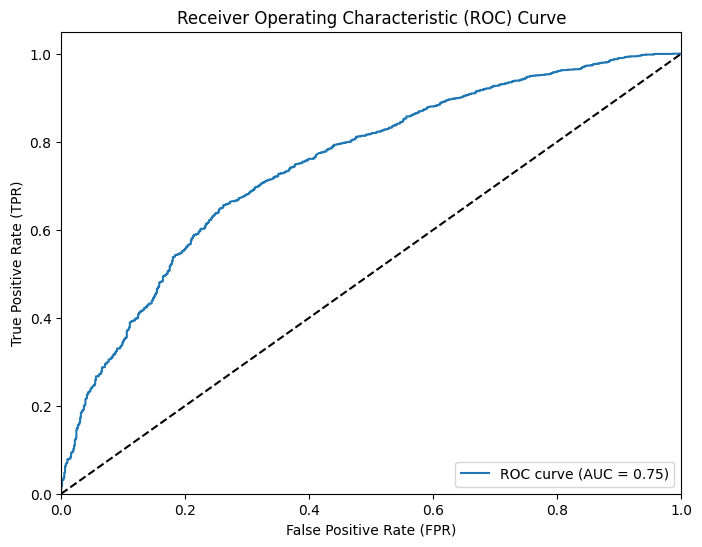

                            Feature  Coefficient  abs_coefficient
2                          ATXMDEYR    -0.911129         0.911129
23       WSPDSC2_FEATURES_Low Level     0.827836         0.827836
8                 NEWRACE2_FEATURES    -0.696857         0.696857
1                             IRSEX     0.519670         0.519670
4                  ANYHLTI2_FEATURE    -0.469444         0.469444
0                        TXEVRRCVD2    -0.415734         0.415734
5                    HEALTH_FEATURE     0.373911         0.373911
3                       Chronic_Dis    -0.326095         0.326095
6                 SEXIDENT_FEATURES     0.272063         0.272063
10              WRKSTATWK2_FEATURES     0.248641         0.248641
22      WSPDSC2_FEATURES_High Level    -0.245402         0.245402
16                     EDUHIGHCAT_1     0.244304         0.244304
18                     EDUHIGHCAT_4    -0.193155         0.193155
12                AGE2_FEATURES_20s     0.176305         0.176305
14        

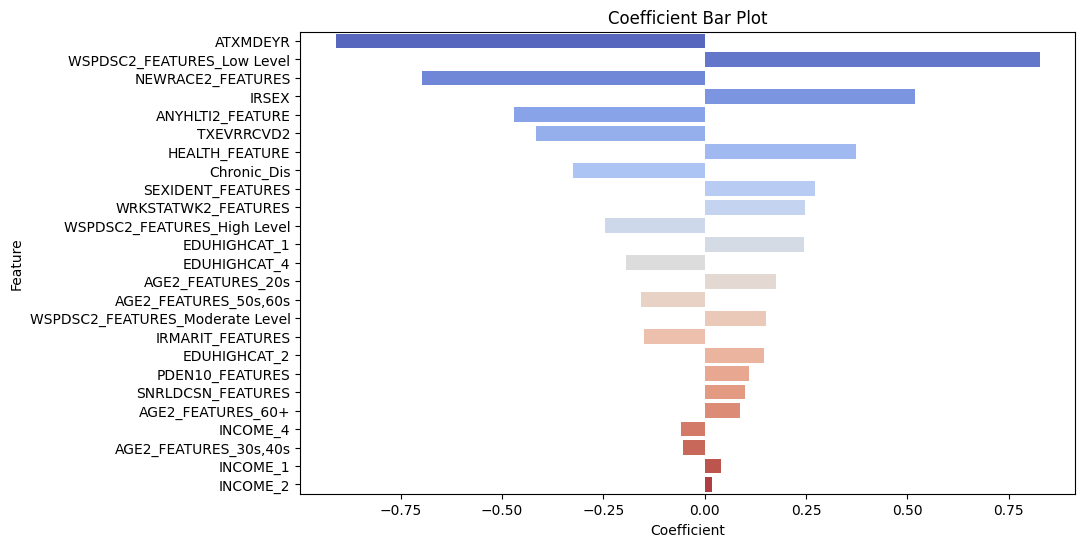

Interpreting the results:
Feature 'ATXMDEYR' has a negatively influence (coefficient: -0.91)
Feature 'WSPDSC2_FEATURES_Low Level' has a positively influence (coefficient: 0.83)
Feature 'NEWRACE2_FEATURES' has a negatively influence (coefficient: -0.70)
Feature 'IRSEX' has a positively influence (coefficient: 0.52)
Feature 'ANYHLTI2_FEATURE' has a negatively influence (coefficient: -0.47)
Feature 'TXEVRRCVD2' has a negatively influence (coefficient: -0.42)
Feature 'HEALTH_FEATURE' has a positively influence (coefficient: 0.37)
Feature 'Chronic_Dis' has a negatively influence (coefficient: -0.33)
Feature 'SEXIDENT_FEATURES' has a positively influence (coefficient: 0.27)
Feature 'WRKSTATWK2_FEATURES' has a positively influence (coefficient: 0.25)
Feature 'WSPDSC2_FEATURES_High Level' has a negatively influence (coefficient: -0.25)
Feature 'EDUHIGHCAT_1' has a positively influence (coefficient: 0.24)
Feature 'EDUHIGHCAT_4' has a negatively influence (coefficient: -0.19)
Feature 'AGE2_FEATU

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


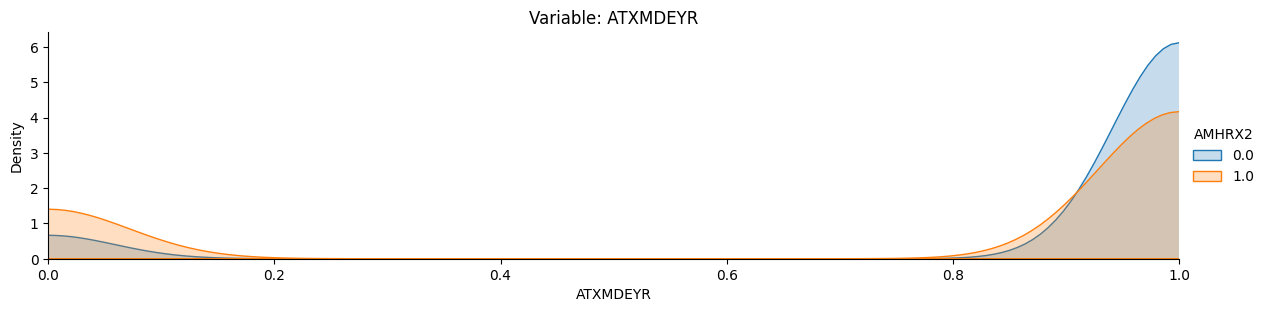

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


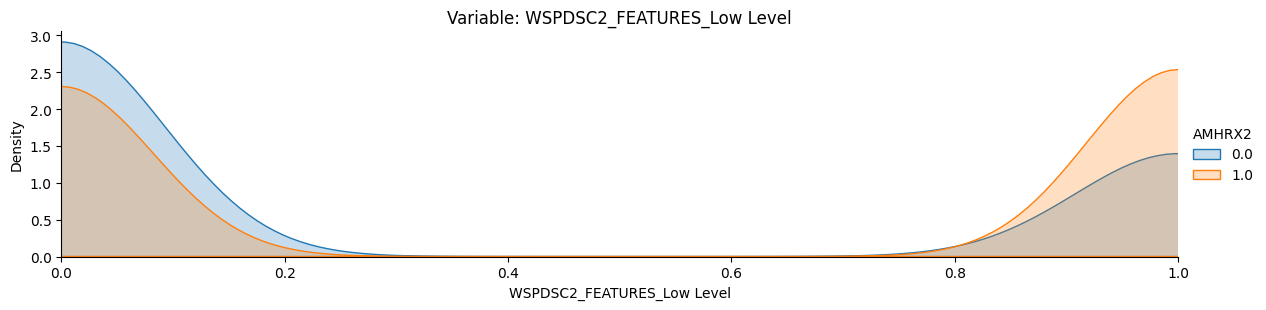

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


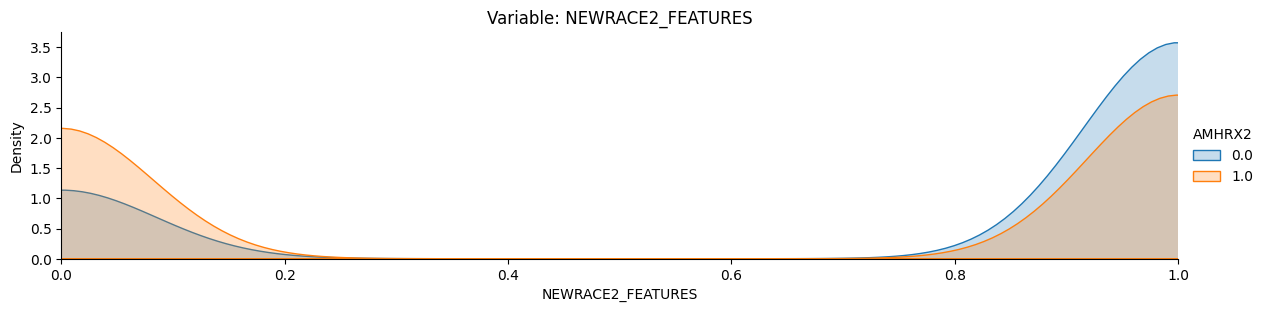

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


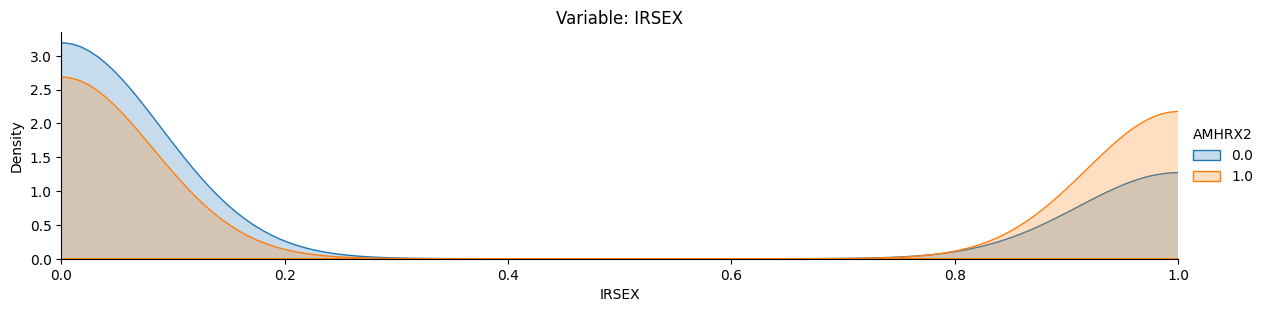

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


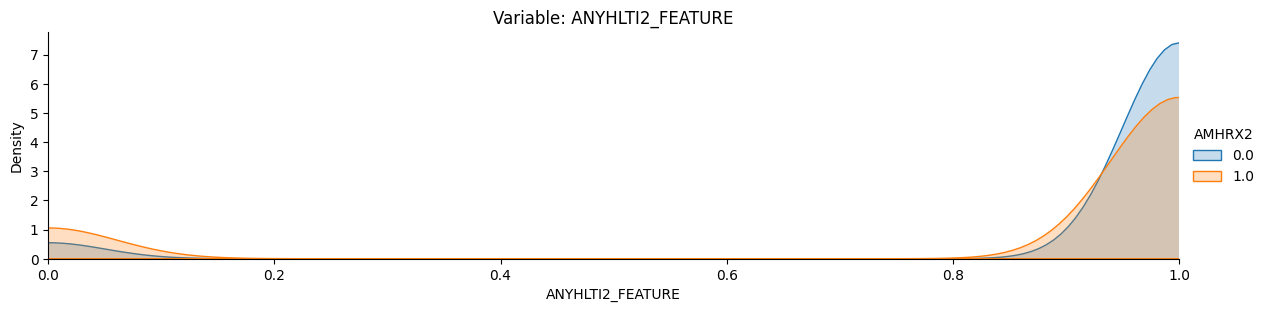

In [41]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import copy
import seaborn as sns
import matplotlib.pyplot as plt

print(f"\nTarget variable: {'AMHRX2'}")

X = copy.deepcopy(X_or)
y = targets['AMHRX2'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the undersampling method
undersampler = RandomUnderSampler(replacement = False, sampling_strategy = 'not majority')

# Apply resampling to the training data only
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

model = LogisticRegression(solver='sag', warm_start=True, penalty='l2',
                           max_iter=890, fit_intercept=True, class_weight=None, C=0.01)



# Then, train your model using the resampled training data
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba[:, 1])}")

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

# Calculate area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_proba[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Interpret the results
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to store the coefficients and feature names
summary_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of the coefficients
summary_df['abs_coefficient'] = summary_df['Coefficient'].abs()
summary_df = summary_df.sort_values('abs_coefficient', ascending=False)

# Print the sorted summary
print(summary_df)

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Coefficient Bar Plot")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

# Interpret the results
print("Interpreting the results:")
for index, row in summary_df.iterrows():
    feature_name = row['Feature']
    coefficient = row['Coefficient']
    
    if coefficient > 0:
        influence = "positively"
    else:
        influence = "negatively"
        
    print(f"Feature '{feature_name}' has a {influence} influence (coefficient: {coefficient:.2f})")

# Concatenate X_train_resampled and y_train_resampled
train_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name="AMHRX2")], axis=1)

# Select the top 5 significant variables
top_5_variables = summary_df['Feature'].head(5)

# Iterate over the top 5 variables and create individual plots
for variable in top_5_variables:
    # Filter the data for the current variable
    variable_data = X[variable]
    
    # Create a facet grid plot
    facet = sns.FacetGrid(data=train_data, hue="AMHRX2", aspect=4)
    facet.map(sns.kdeplot, variable, shade=True)
    facet.set(xlim=(variable_data.min(), variable_data.max()))
    facet.add_legend()
    sns.axes_style("darkgrid")
    
    plt.title(f"Variable: {variable}")
    plt.show()

### AMHTXND2: Whether respondent rerceives an unmet need for mental health treatment and did not receive any mental health treatment in the past year. 


Target variable: AMHTXND2
Accuracy: 0.7568039078855547
Precision: 0.7755966127790608
Recall: 0.9464537341474871
F1 Score: 0.8525491855299345
ROC AUC Score: 0.7362053900615204


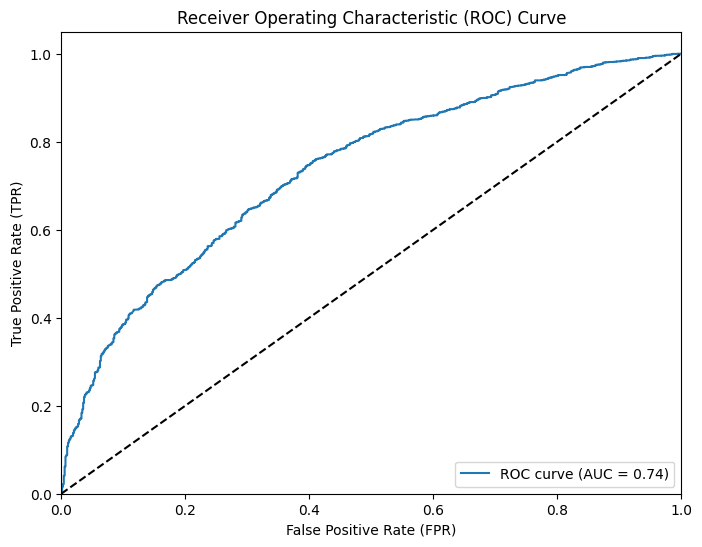

                            Feature  Coefficient  abs_coefficient
23       WSPDSC2_FEATURES_Low Level     1.376711         1.376711
15                AGE2_FEATURES_60+     0.922957         0.922957
1                             IRSEX     0.512233         0.512233
16                     EDUHIGHCAT_1     0.509211         0.509211
6                 SEXIDENT_FEATURES     0.494646         0.494646
2                          ATXMDEYR     0.456561         0.456561
24  WSPDSC2_FEATURES_Moderate Level     0.436779         0.436779
17                     EDUHIGHCAT_2     0.352081         0.352081
18                     EDUHIGHCAT_4    -0.334348         0.334348
14            AGE2_FEATURES_50s,60s     0.285731         0.285731
0                        TXEVRRCVD2    -0.246977         0.246977
7                  IRMARIT_FEATURES     0.244743         0.244743
8                 NEWRACE2_FEATURES    -0.232828         0.232828
22      WSPDSC2_FEATURES_High Level    -0.207501         0.207501
5         

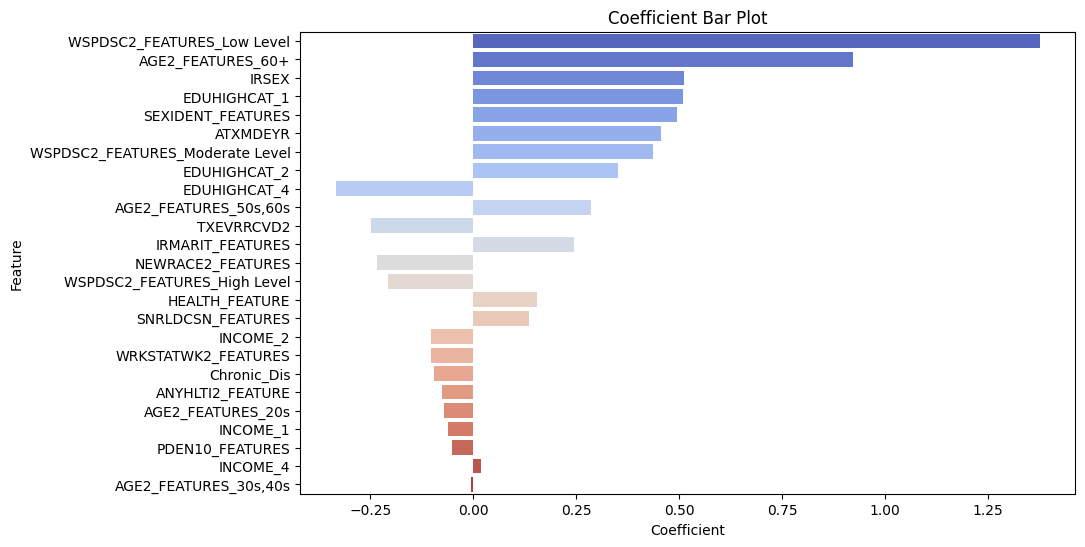

Interpreting the results:
Feature 'WSPDSC2_FEATURES_Low Level' has a positively influence (coefficient: 1.38)
Feature 'AGE2_FEATURES_60+' has a positively influence (coefficient: 0.92)
Feature 'IRSEX' has a positively influence (coefficient: 0.51)
Feature 'EDUHIGHCAT_1' has a positively influence (coefficient: 0.51)
Feature 'SEXIDENT_FEATURES' has a positively influence (coefficient: 0.49)
Feature 'ATXMDEYR' has a positively influence (coefficient: 0.46)
Feature 'WSPDSC2_FEATURES_Moderate Level' has a positively influence (coefficient: 0.44)
Feature 'EDUHIGHCAT_2' has a positively influence (coefficient: 0.35)
Feature 'EDUHIGHCAT_4' has a negatively influence (coefficient: -0.33)
Feature 'AGE2_FEATURES_50s,60s' has a positively influence (coefficient: 0.29)
Feature 'TXEVRRCVD2' has a negatively influence (coefficient: -0.25)
Feature 'IRMARIT_FEATURES' has a positively influence (coefficient: 0.24)
Feature 'NEWRACE2_FEATURES' has a negatively influence (coefficient: -0.23)
Feature 'WSPD

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


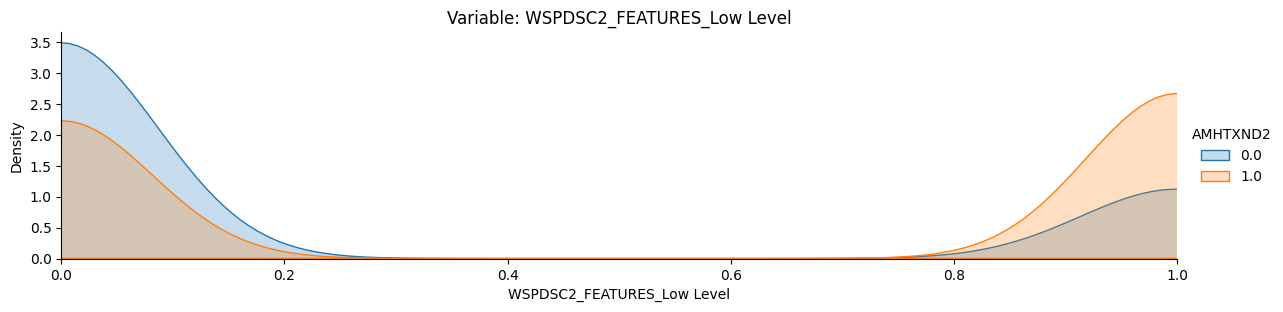

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


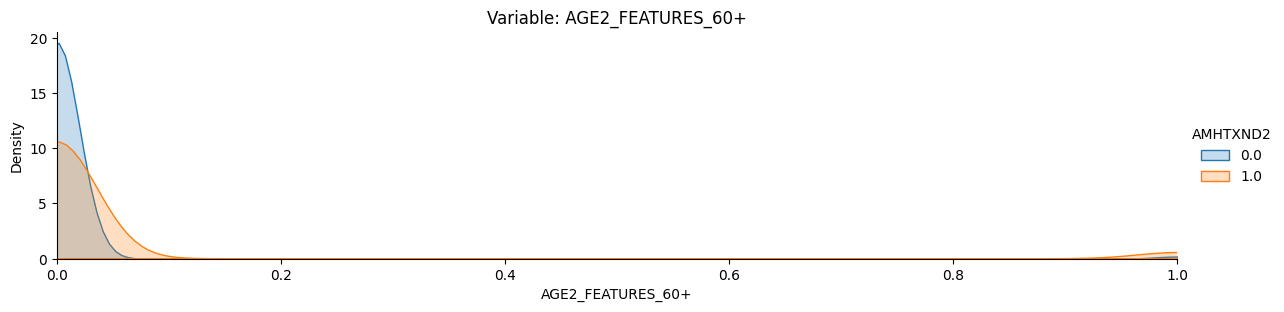

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


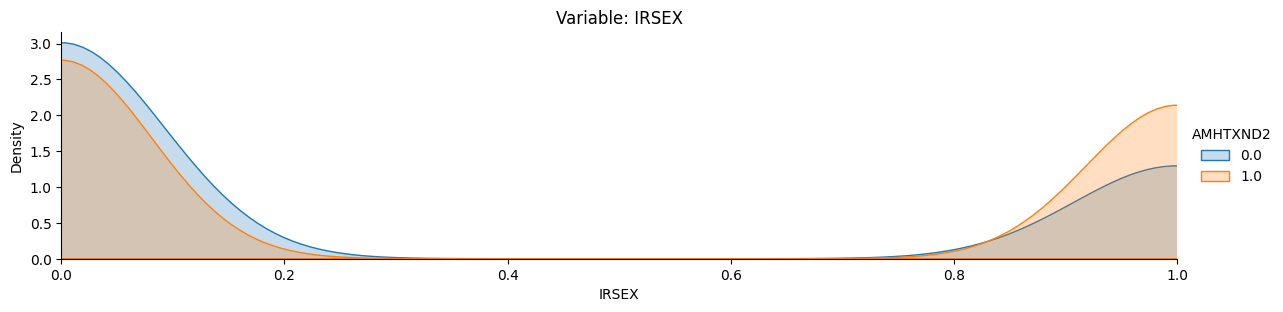

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


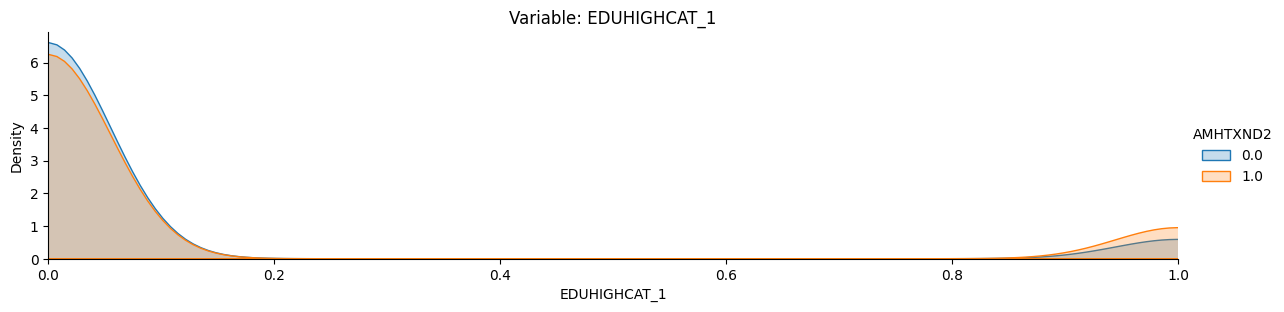

C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\BlownSugar\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


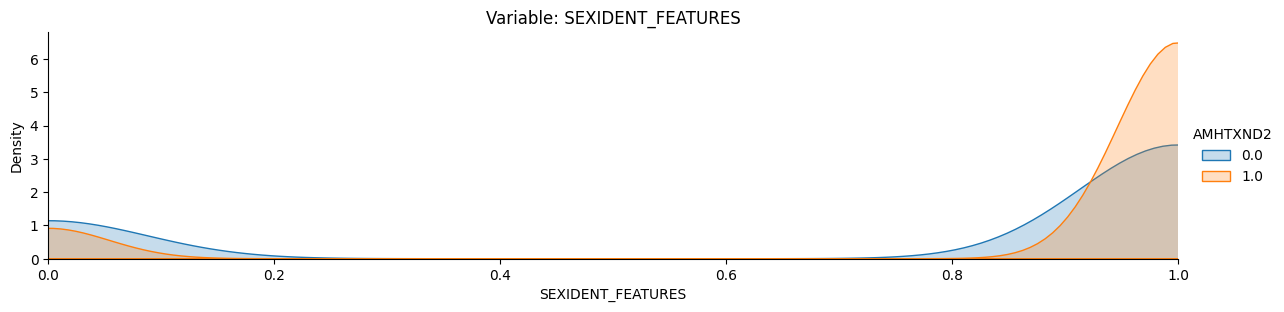

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import copy
import seaborn as sns
import matplotlib.pyplot as plt

print(f"\nTarget variable: {'AMHTXND2'}")

X = copy.deepcopy(X_or)
y = targets['AMHTXND2'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the undersampling method
undersampler = RandomUnderSampler(replacement = False, sampling_strategy = 'not majority')

# Apply resampling to the training data only
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

model = LogisticRegression(solver='liblinear', warm_start=True, penalty='l2',
                           max_iter=470, fit_intercept=True, class_weight=None, C=0.1)



# Then, train your model using the resampled training data
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba[:, 1])}")

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

# Calculate area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_proba[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Interpret the results
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to store the coefficients and feature names
summary_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of the coefficients
summary_df['abs_coefficient'] = summary_df['Coefficient'].abs()
summary_df = summary_df.sort_values('abs_coefficient', ascending=False)

# Print the sorted summary
print(summary_df)

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Coefficient Bar Plot")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

# Interpret the results
print("Interpreting the results:")
for index, row in summary_df.iterrows():
    feature_name = row['Feature']
    coefficient = row['Coefficient']
    
    if coefficient > 0:
        influence = "positively"
    else:
        influence = "negatively"
        
    print(f"Feature '{feature_name}' has a {influence} influence (coefficient: {coefficient:.2f})")

# Concatenate X_train_resampled and y_train_resampled
train_data = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name="AMHTXND2")], axis=1)

# Select the top 5 significant variables
top_5_variables = summary_df['Feature'].head(5)

# Iterate over the top 5 variables and create individual plots
for variable in top_5_variables:
    # Filter the data for the current variable
    variable_data = X[variable]
    
    # Create a facet grid plot
    facet = sns.FacetGrid(data=train_data, hue="AMHTXND2", aspect=4)
    facet.map(sns.kdeplot, variable, shade=True)
    facet.set(xlim=(variable_data.min(), variable_data.max()))
    facet.add_legend()
    sns.axes_style("darkgrid")
    
    plt.title(f"Variable: {variable}")
    plt.show()